In [1]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.collections import LineCollection
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import seaborn as sns
from matplotlib.colors import ListedColormap

import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)

from functions.read_g4bl_data import readTraceData
from functions.set_plot_settings import setPlotSettings

setPlotSettings(font=True)

# Location of G4bl output:
file = 'g4bl-output/AllTracks.txt'

# Define RF period:
f = 325*10**6 # MHz
T = 1/f*10**9 # ns

# Length of period:
len_period = 4200 # mm

# First solenoid z placement:
zstart = 500 # mm

# Figure directory:
fig_dir = 'figures/'

In [2]:
# Read in data:
data = readTraceData(file)
z_vals = data['z'].values # mm

# Find indices for first value in each period:
next_z = 0
period_start_z_vals = []
period_start_indices = []
for i in range(len(z_vals)):
    if z_vals[i] > next_z:
        period_start_z_vals.append(z_vals[i])
        period_start_indices.append(i)
        next_z += len_period

# Remove last two periods (for reducing edge fields):
if len(period_start_indices) > 1:
    final_index = period_start_indices[-2]
else:
    final_index = len(z_vals)
data = data.iloc[:final_index-1].copy()
x_vals = data['x'].values; y_vals = data['y'].values; z_vals = data['z'].values # mm
px_vals = data['px'].values; py_vals = data['py'].values; pz_vals = data['pz'].values; ptotal_vals = data['ptotal'].values # MeV/c
t_vals = data['t'].values # ns
Bx_vals = data['Bx'].values; By_vals = data['By'].values; Bz_vals = data['Bz'].values # T
xp_vals = data['xp'].values; yp_vals = data['yp'].values # radians
r_vals = data['r'].values # mm
theta_vals = data['theta'].values # radians
rp_vals = data['rp'].values # radians
thetap_vals = data['thetap'].values # radians
Lz_vals = data['Lz'].values # mm*MeV/c

In [3]:
data = data[period_start_indices[0]:period_start_indices[1]]

In [5]:
# Find peak on-axis B field:
peak_Bz = np.max(Bz_vals)
print(f'Bz0 = {peak_Bz}')

Bz0 = 3.28247


In [6]:
# Calculate phase advance:
p = 200e-3 # GeV
m = 105.7e-3 # GeV
e = 0.303
gamma = np.sqrt(1+(p/m)**2)
beta = p/m/gamma
phi = e*peak_Bz/(2*m*gamma*beta) # rad
phi = phi*180/np.pi # --> deg
print(f'phi = {phi}')

phi = 142.4642956140678


In [4]:
# Number of solenoids:
n = 6

# Distance between solenoids:
d = 700 # mm

# Solenoid length:
L = 300 # mm

### Define function to plot lines indicating solenoid placement:
def plot_solenoids(ax, zshift=0, legend=True):
    cnt1 = 0; cnt2 = 0
    for i in range(n):
        center = 500 + i*d + zshift
        if np.mod(i,2) == 0: # positive polarity
            if cnt1 == 0 and legend:
                ax.axvspan(xmin=center-L/2, xmax=center+L/2, color='gray', alpha=0.2, label='$+$')
                cnt1 += 1
            else:
                ax.axvspan(xmin=center-L/2, xmax=center+L/2, color='gray', alpha=0.2)
        else: # negative polarity
            if cnt2 == 0 and legend:
                ax.axvspan(xmin=center-L/2, xmax=center+L/2, color='black', alpha=0.2, label='$-$')
                cnt2 += 1
            else:
                ax.axvspan(xmin=center-L/2, xmax=center+L/2, color='black', alpha=0.2)

### Full channel plots

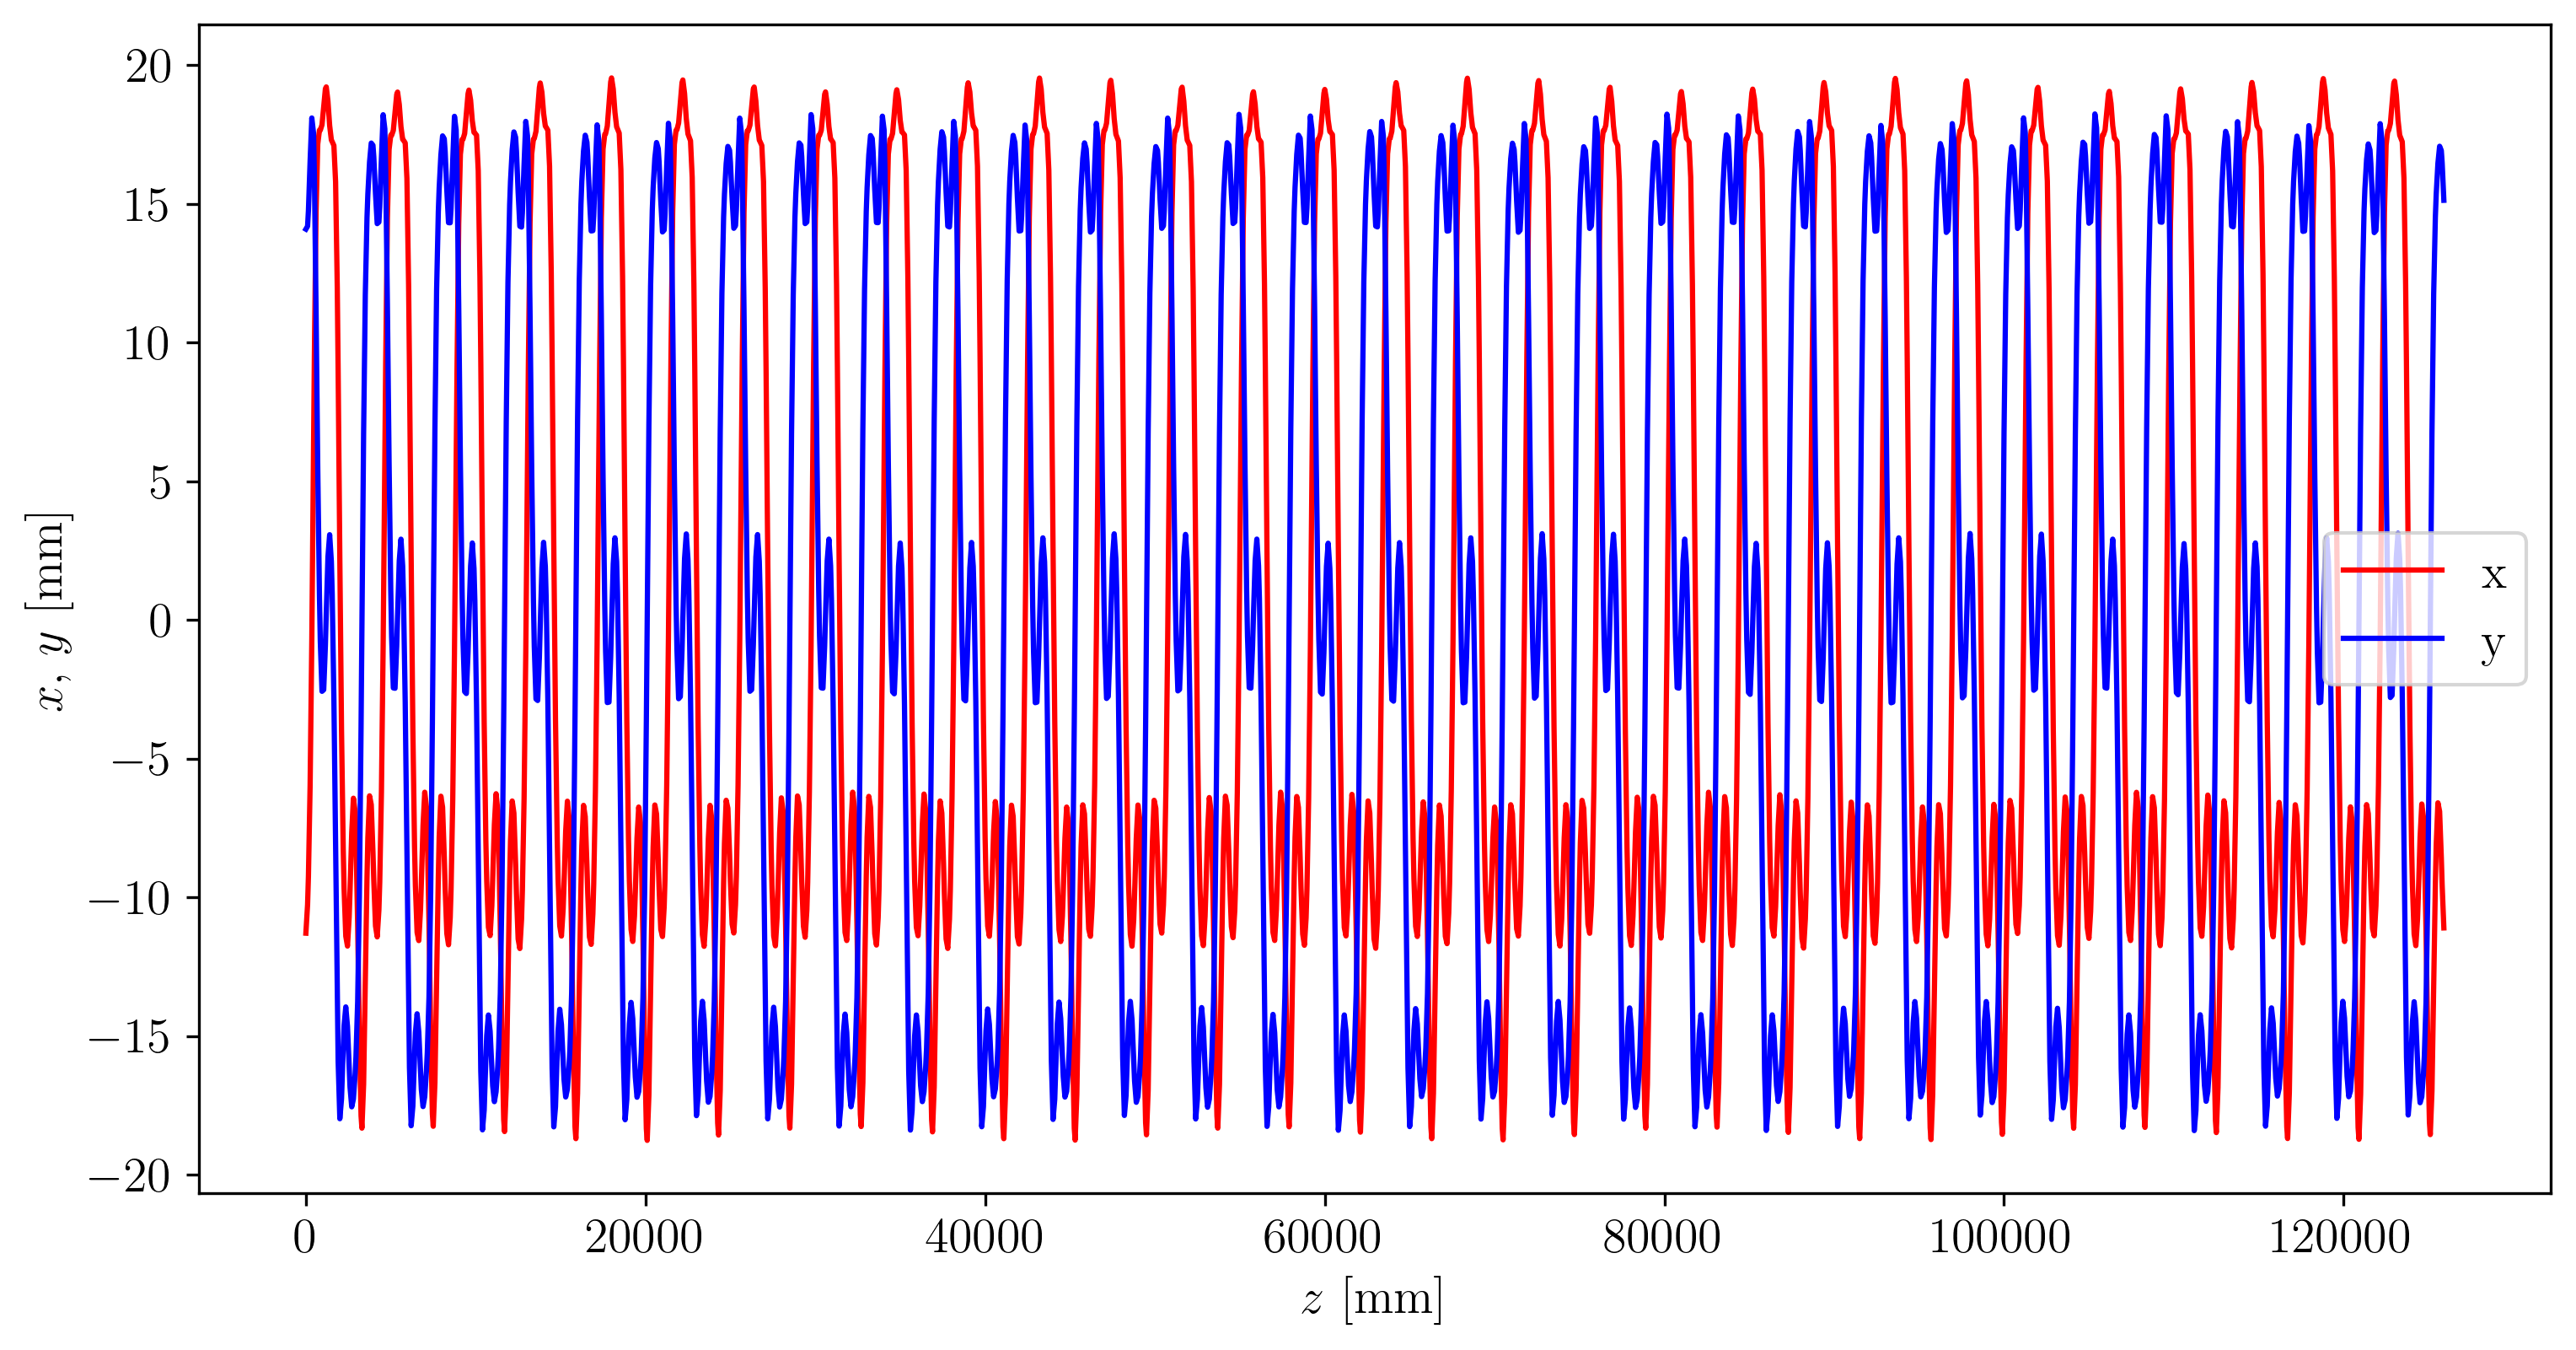

In [7]:
# Plot x, y vs. z:
plt.figure(figsize = (12,6))
plt.plot(z_vals,x_vals,color='red',label='x')
plt.plot(z_vals,y_vals,color='blue',label='y')
plt.xlabel('$z$ [mm]')
plt.ylabel('$x$, $y$ [mm]')
plt.legend()
plt.show()

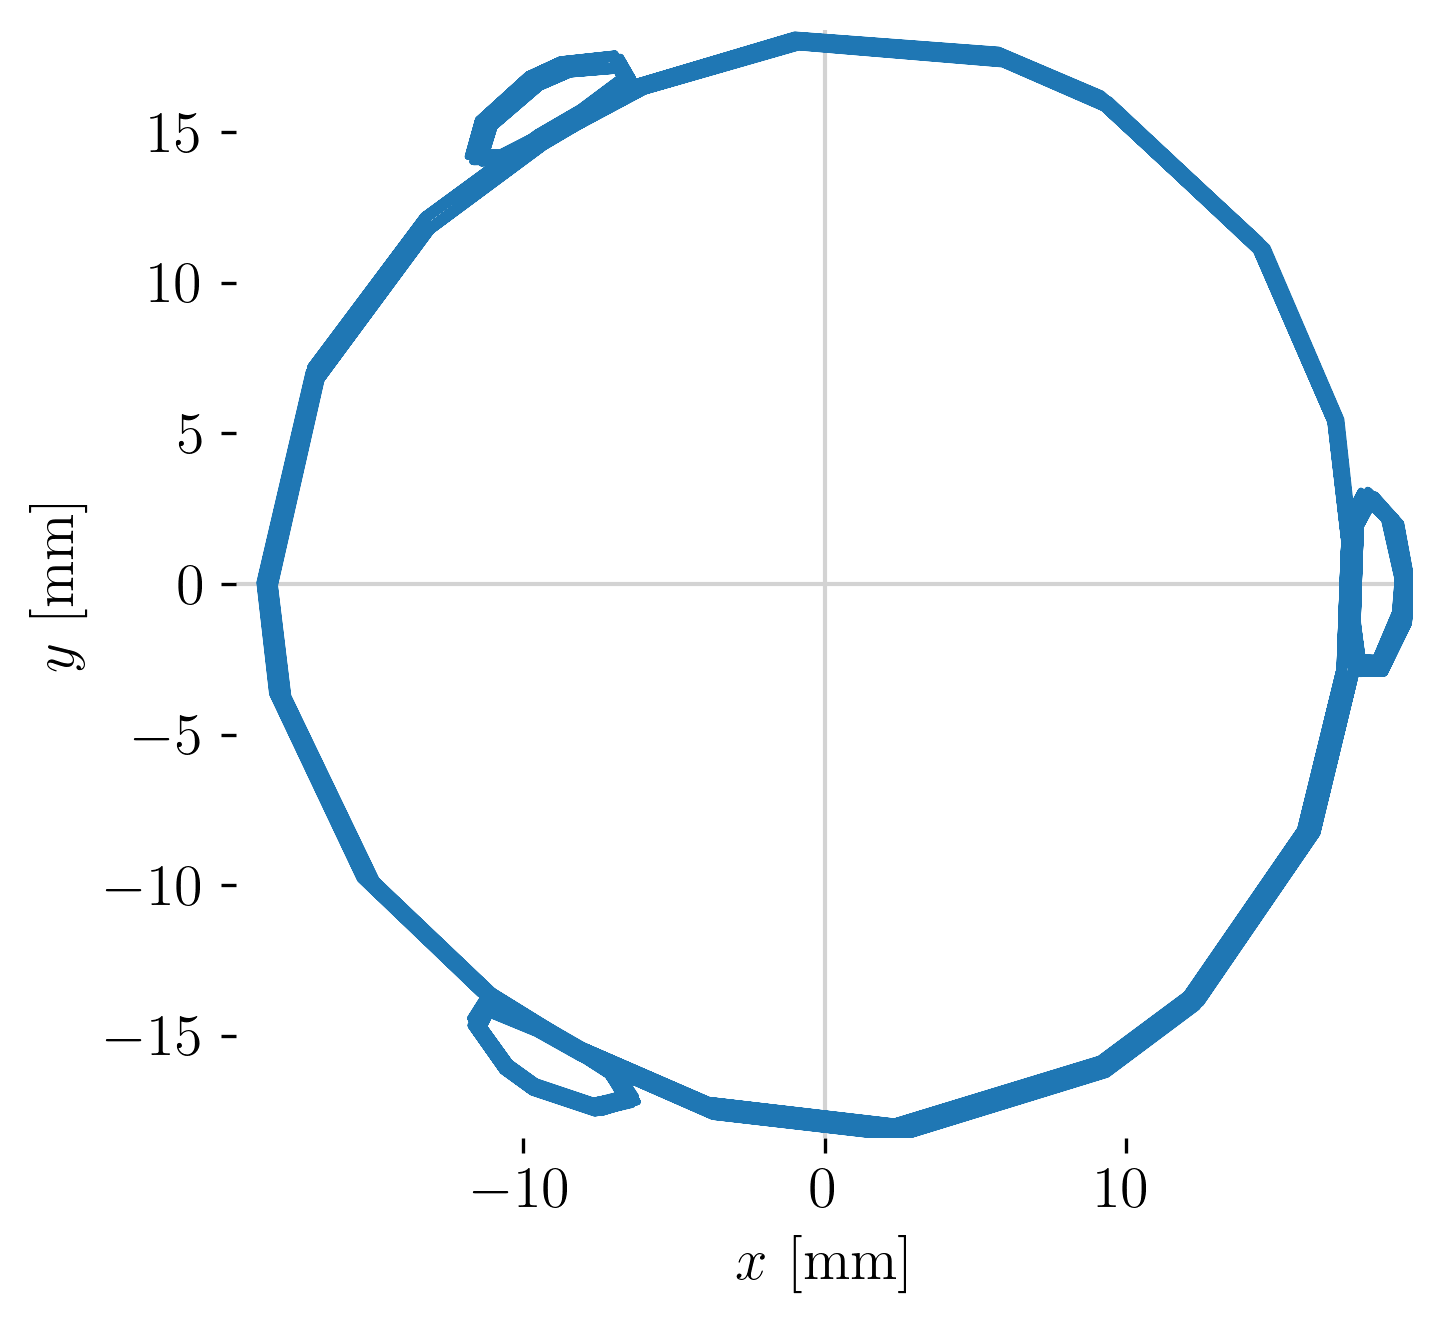

In [8]:
# Plot orbit in transverse plane:
fig, ax = plt.subplots()
plt.plot(x_vals, y_vals)
# plt.plot(data['x'], data['y'], color='black')
xlim = max(abs(min(x_vals)), abs(max(x_vals)))
ylim = max(abs(min(y_vals)), abs(max(y_vals)))
plt.xlim(-xlim, xlim)
plt.ylim(-ylim, ylim)
for spine in ['top', 'right', 'bottom', 'left']:
    plt.gca().spines[spine].set_visible(False)
plt.axhline(0, color='lightgray', linewidth=1, zorder=-10)
plt.axvline(0, color='lightgray', linewidth=1, zorder=-10)
plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
ax.set_aspect('equal')
plt.show()

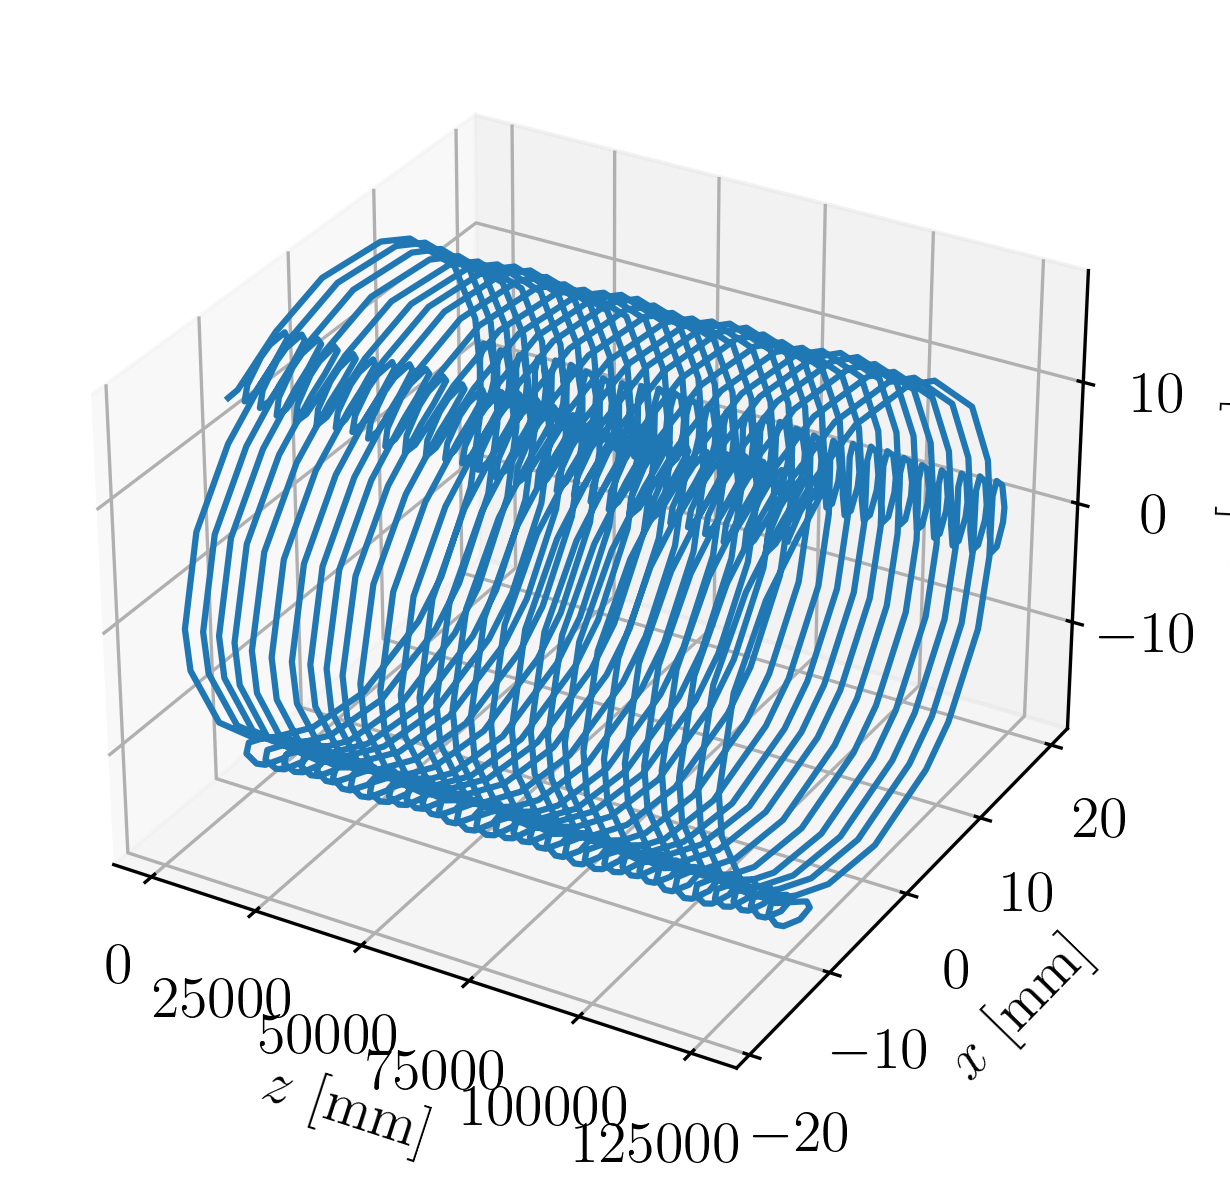

In [9]:
# 3D plot of trajectory:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(z_vals,x_vals,y_vals)
ax.set_xlabel('$z$ [mm]')
ax.set_ylabel('$x$ [mm]')
ax.set_zlabel('$y$ [mm]')
plt.show()

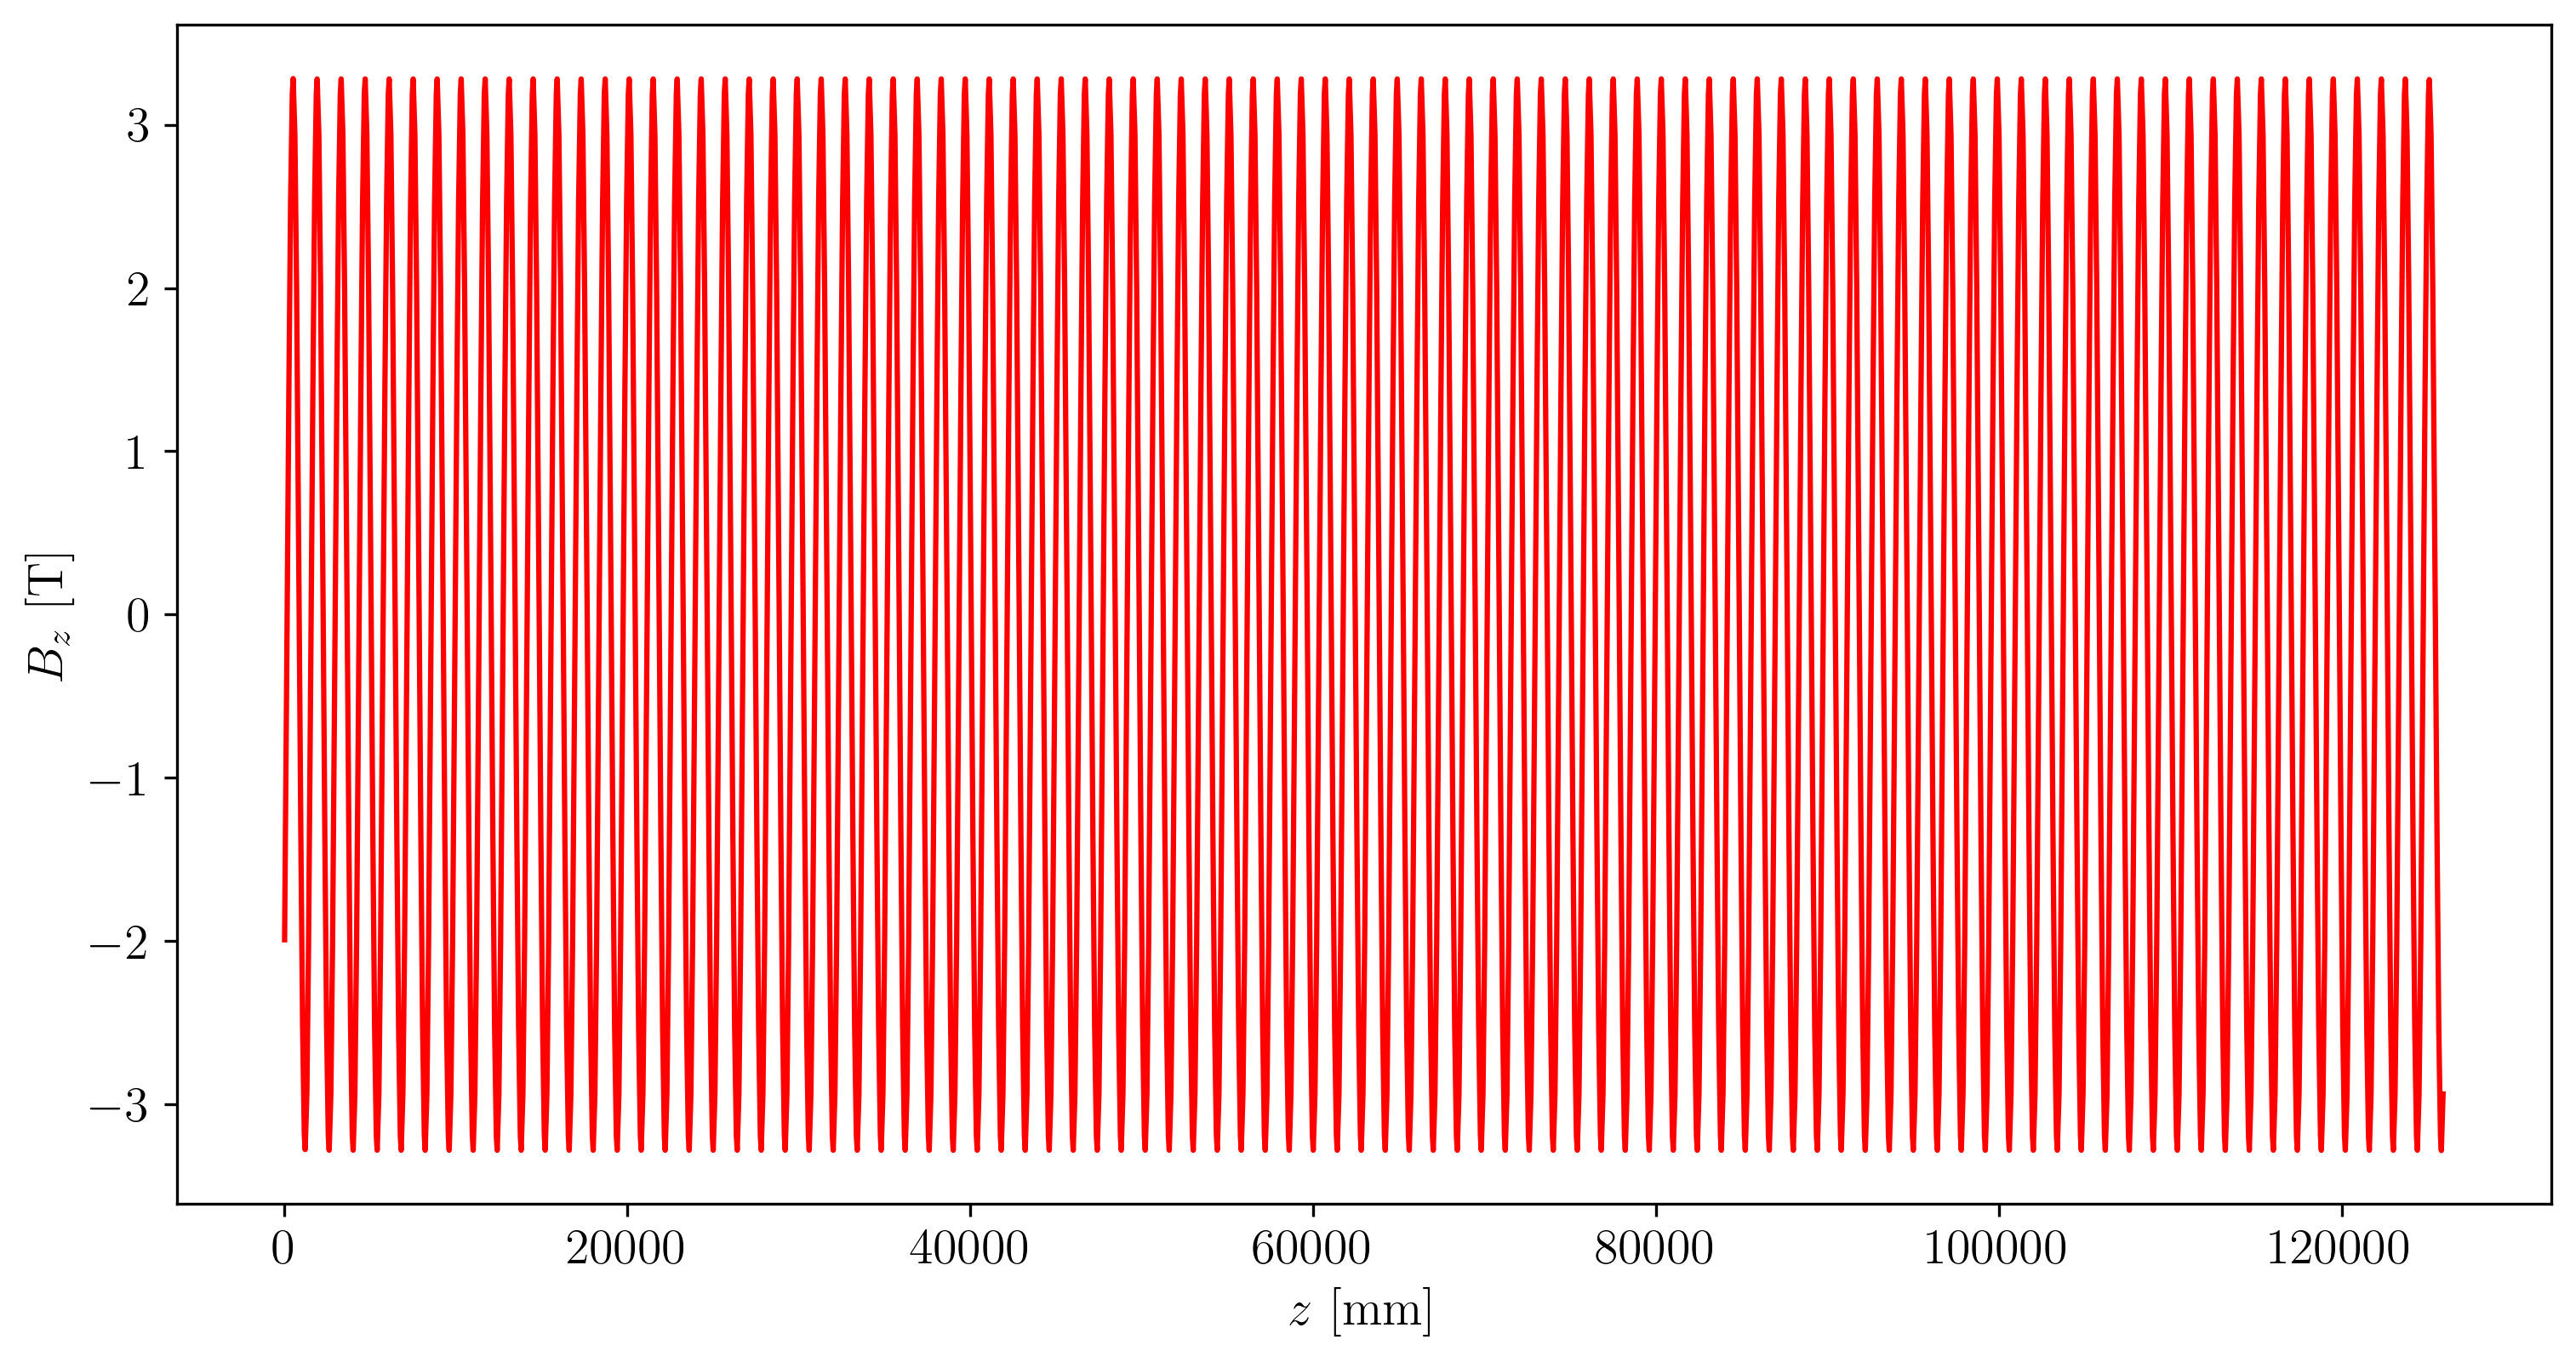

In [10]:
# Plot B_z vs. z:
plt.figure(figsize = (12,6))
plt.plot(z_vals,Bz_vals,color='red')
plt.xlabel('$z$ [mm]')
plt.ylabel('$B_z$ [T]')
plt.show()

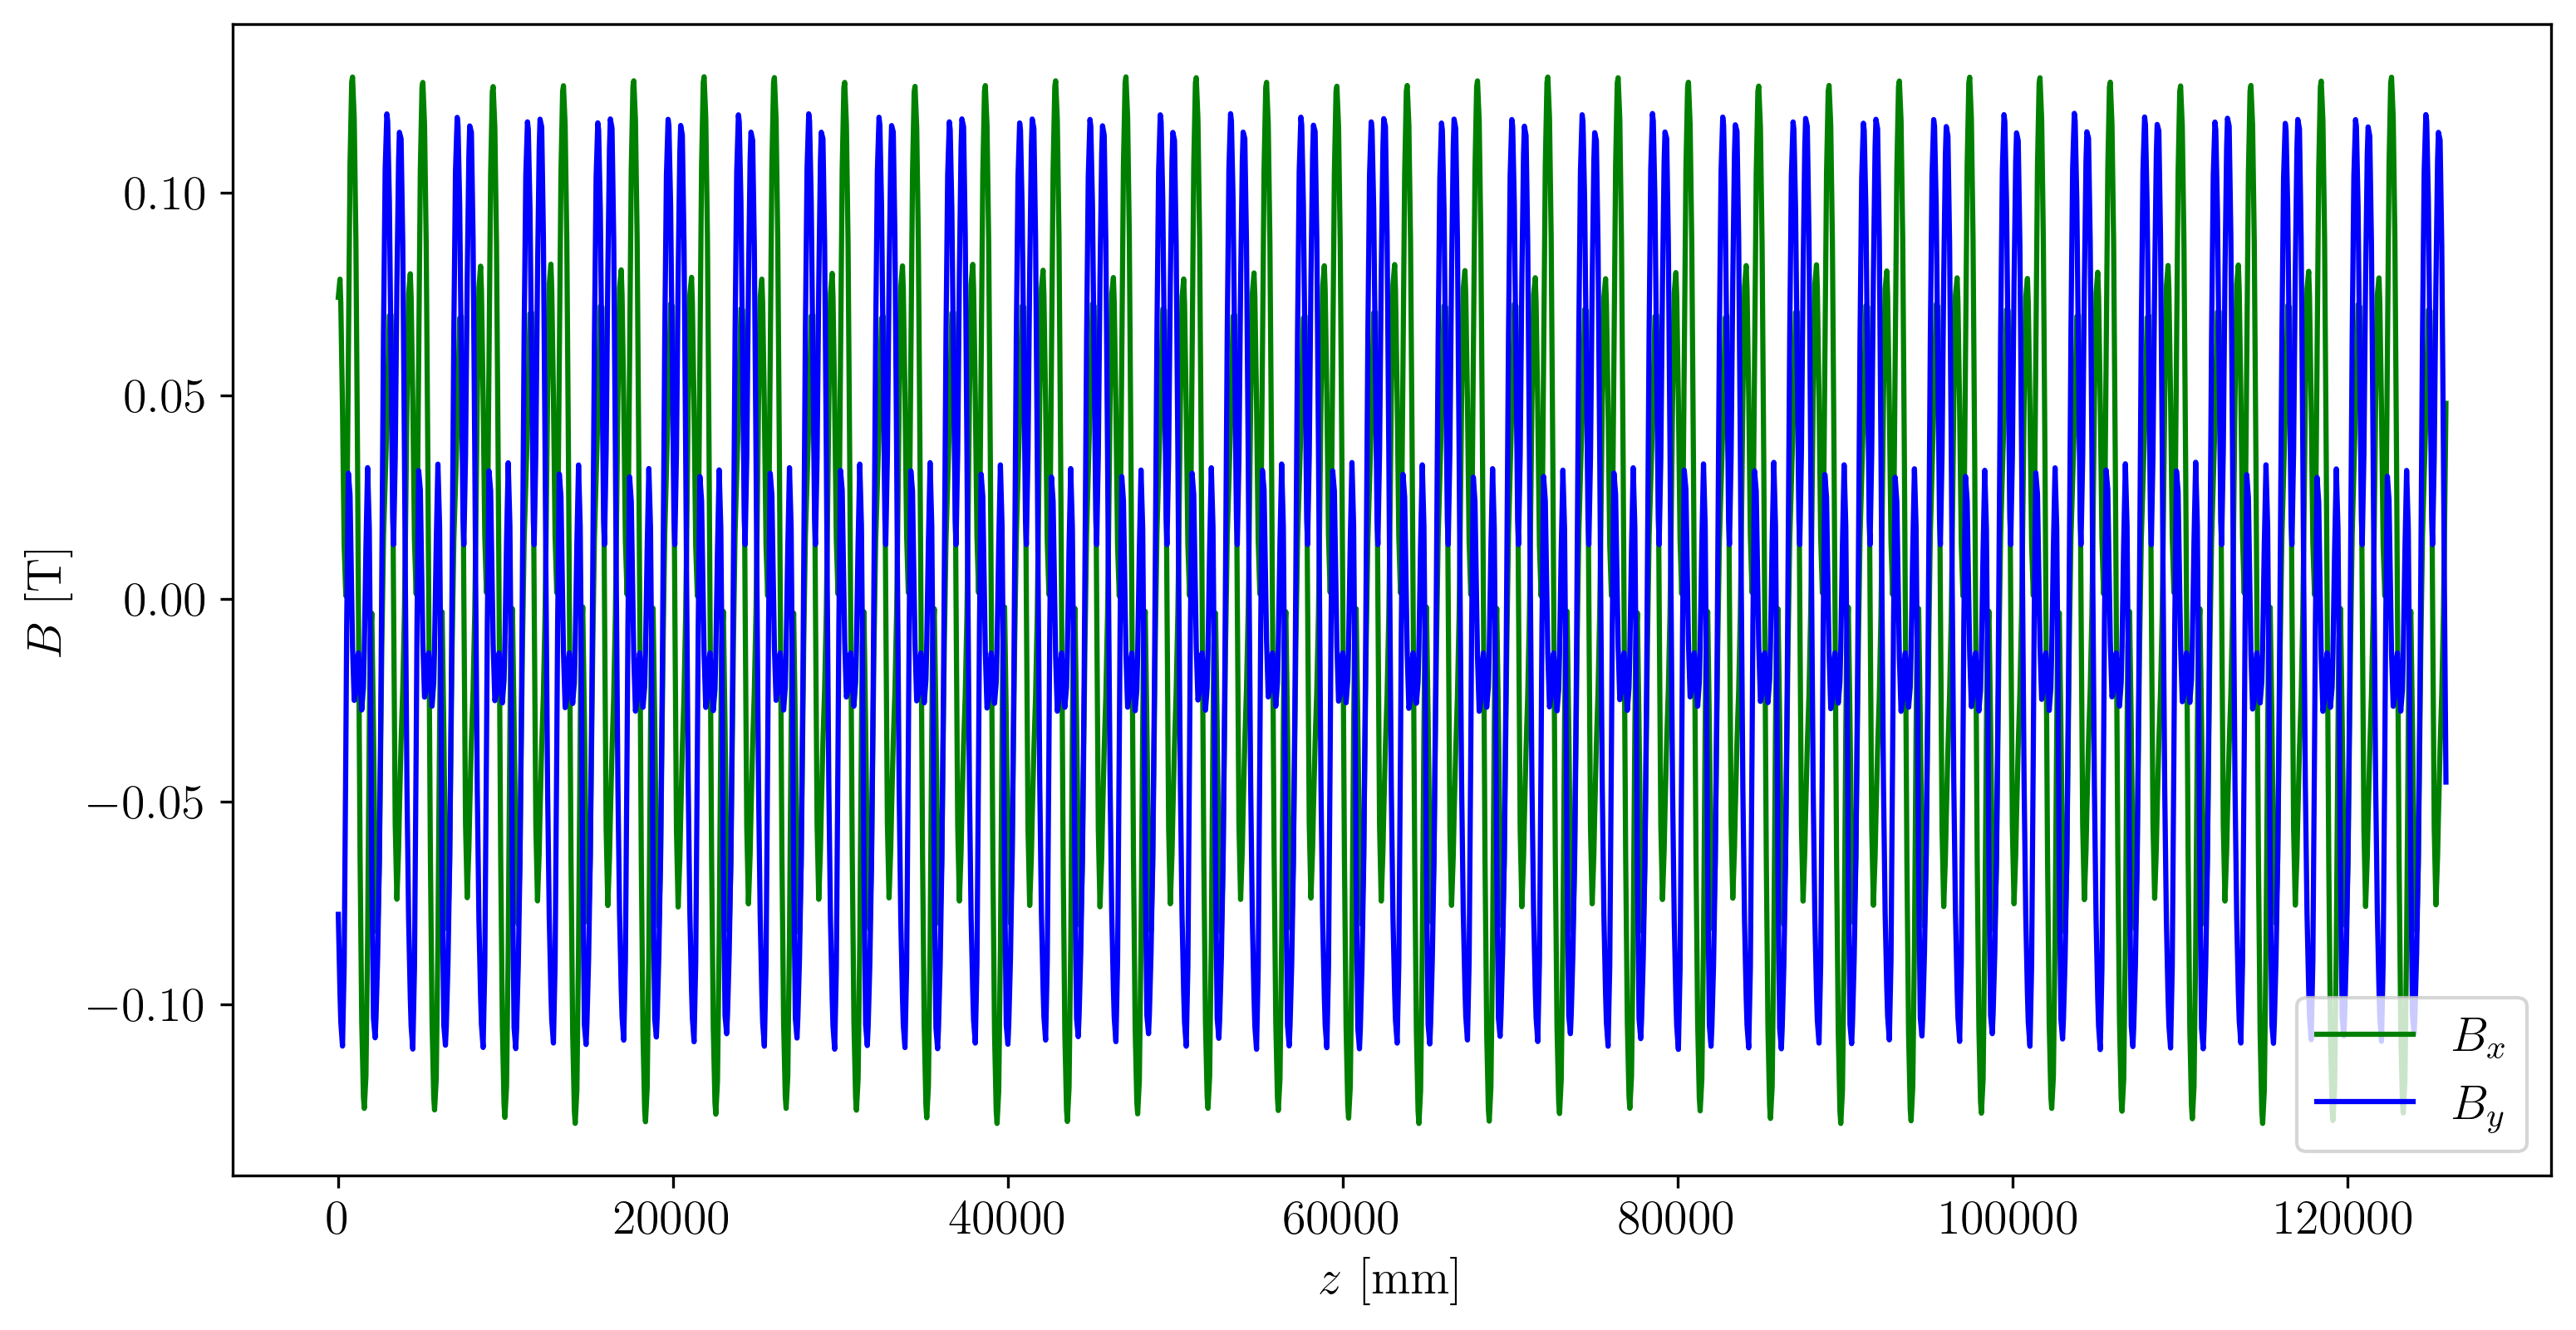

In [11]:
# Plot B_x, B_y vs. z:
plt.figure(figsize = (12,6))
plt.plot(z_vals,Bx_vals,color='green',label='$B_x$')
plt.plot(z_vals,By_vals,color='blue',label='$B_y$')
plt.xlabel('$z$ [mm]')
plt.ylabel('$B$ [T]')
plt.legend()
plt.show()

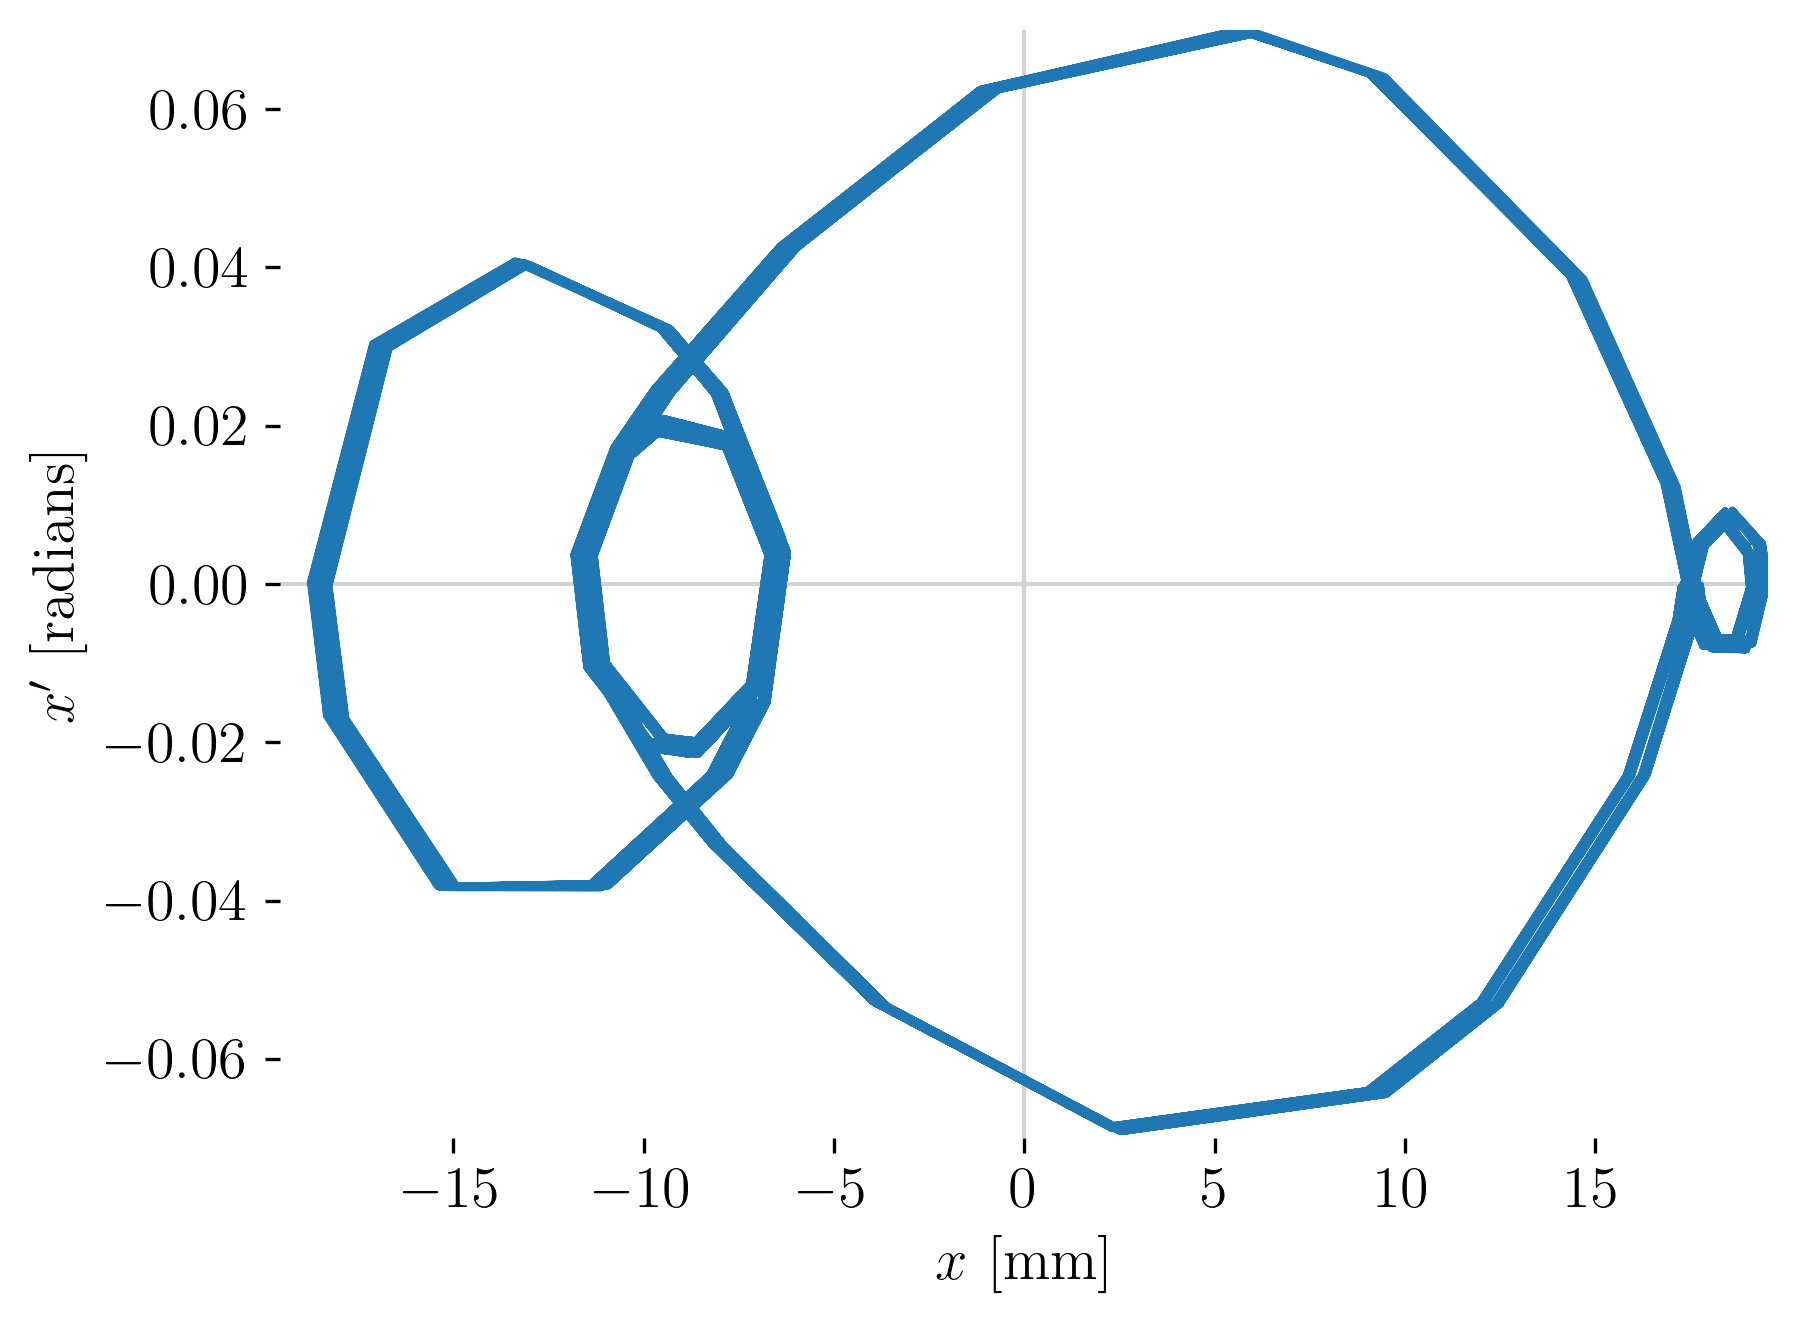

In [12]:
# Plot phase space trajectory (x):
plt.figure()
plt.plot(x_vals, xp_vals,color='tab:blue')
xlim = max(abs(min(x_vals)), abs(max(x_vals)))
ylim = max(abs(min(xp_vals)), abs(max(xp_vals)))
plt.xlim(-xlim, xlim)
plt.ylim(-ylim, ylim)
for spine in ['top', 'right', 'bottom', 'left']:
    plt.gca().spines[spine].set_visible(False)
plt.axhline(0, color='lightgray', linewidth=1, zorder=-10)
plt.axvline(0, color='lightgray', linewidth=1, zorder=-10)
plt.xlabel('$x$ [mm]')
plt.ylabel('$x^{\prime}$ [radians]')
plt.show()

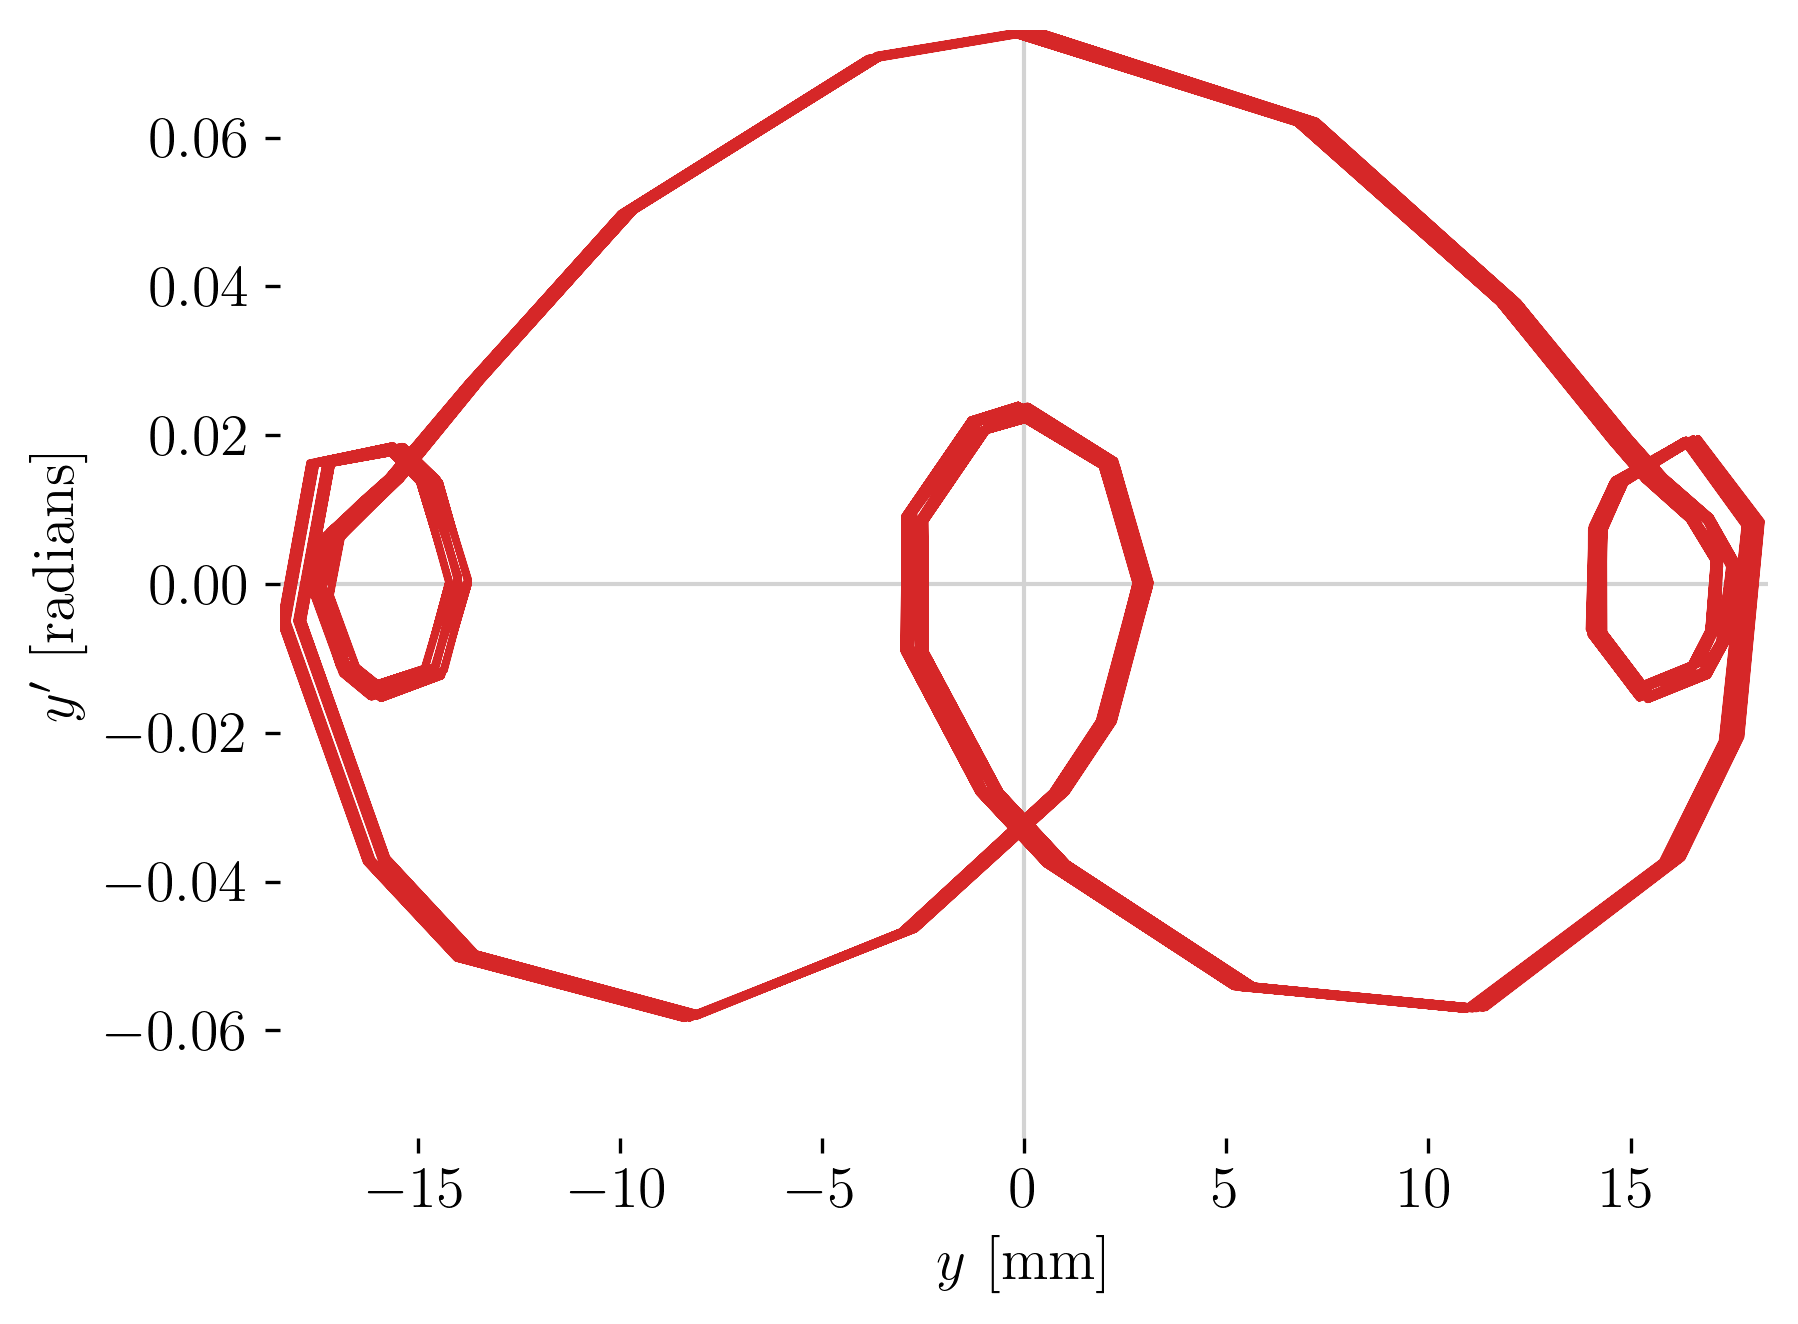

In [13]:
# Plot phase space trajectory (y):
plt.figure()
plt.plot(y_vals, yp_vals,color='tab:red')
xlim = max(abs(min(y_vals)), abs(max(y_vals)))
ylim = max(abs(min(yp_vals)), abs(max(yp_vals)))
plt.xlim(-xlim, xlim)
plt.ylim(-ylim, ylim)
for spine in ['top', 'right', 'bottom', 'left']:
    plt.gca().spines[spine].set_visible(False)
plt.axhline(0, color='lightgray', linewidth=1, zorder=-10)
plt.axvline(0, color='lightgray', linewidth=1, zorder=-10)
plt.xlabel('$y$ [mm]')
plt.ylabel('$y^{\prime}$ [radians]')
plt.show()

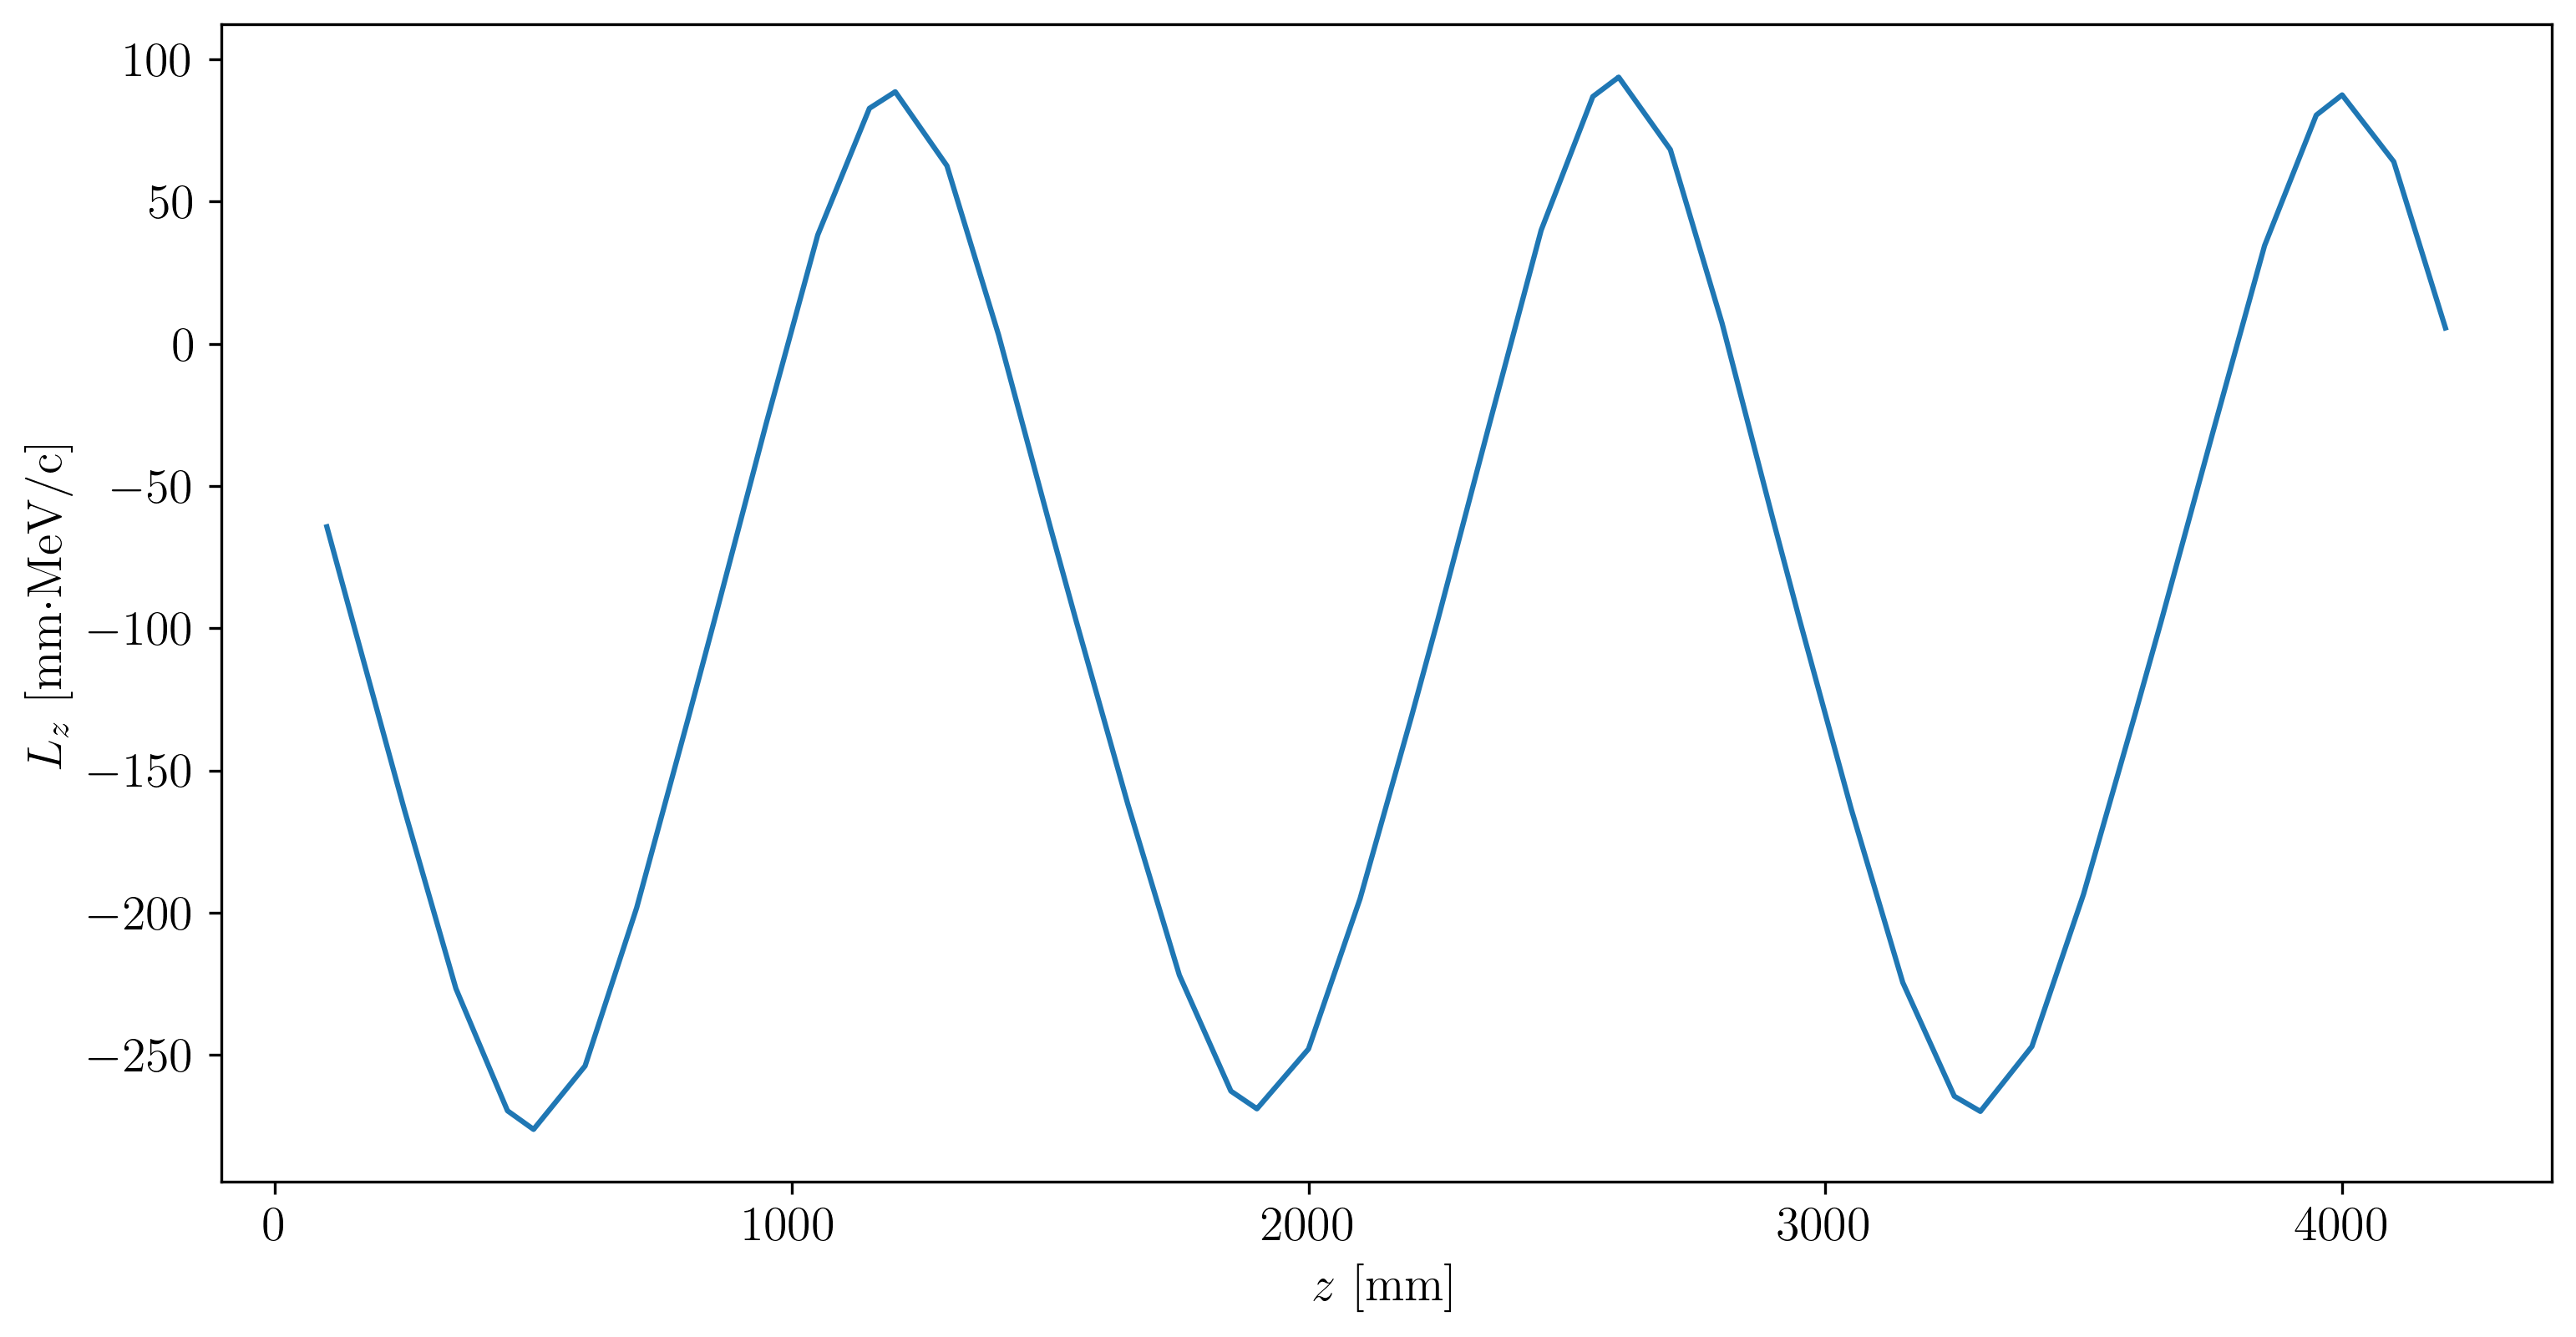

In [14]:
# Plot L_z vs. z:
plt.figure(figsize = (12,6))
# plt.plot(z_vals,Lz_vals)
plt.plot(data['z'], data['Lz'])
plt.xlabel('$z$ [mm]')
plt.ylabel(r'$L_z$ [mm$\cdot$MeV/c]')
plt.show()

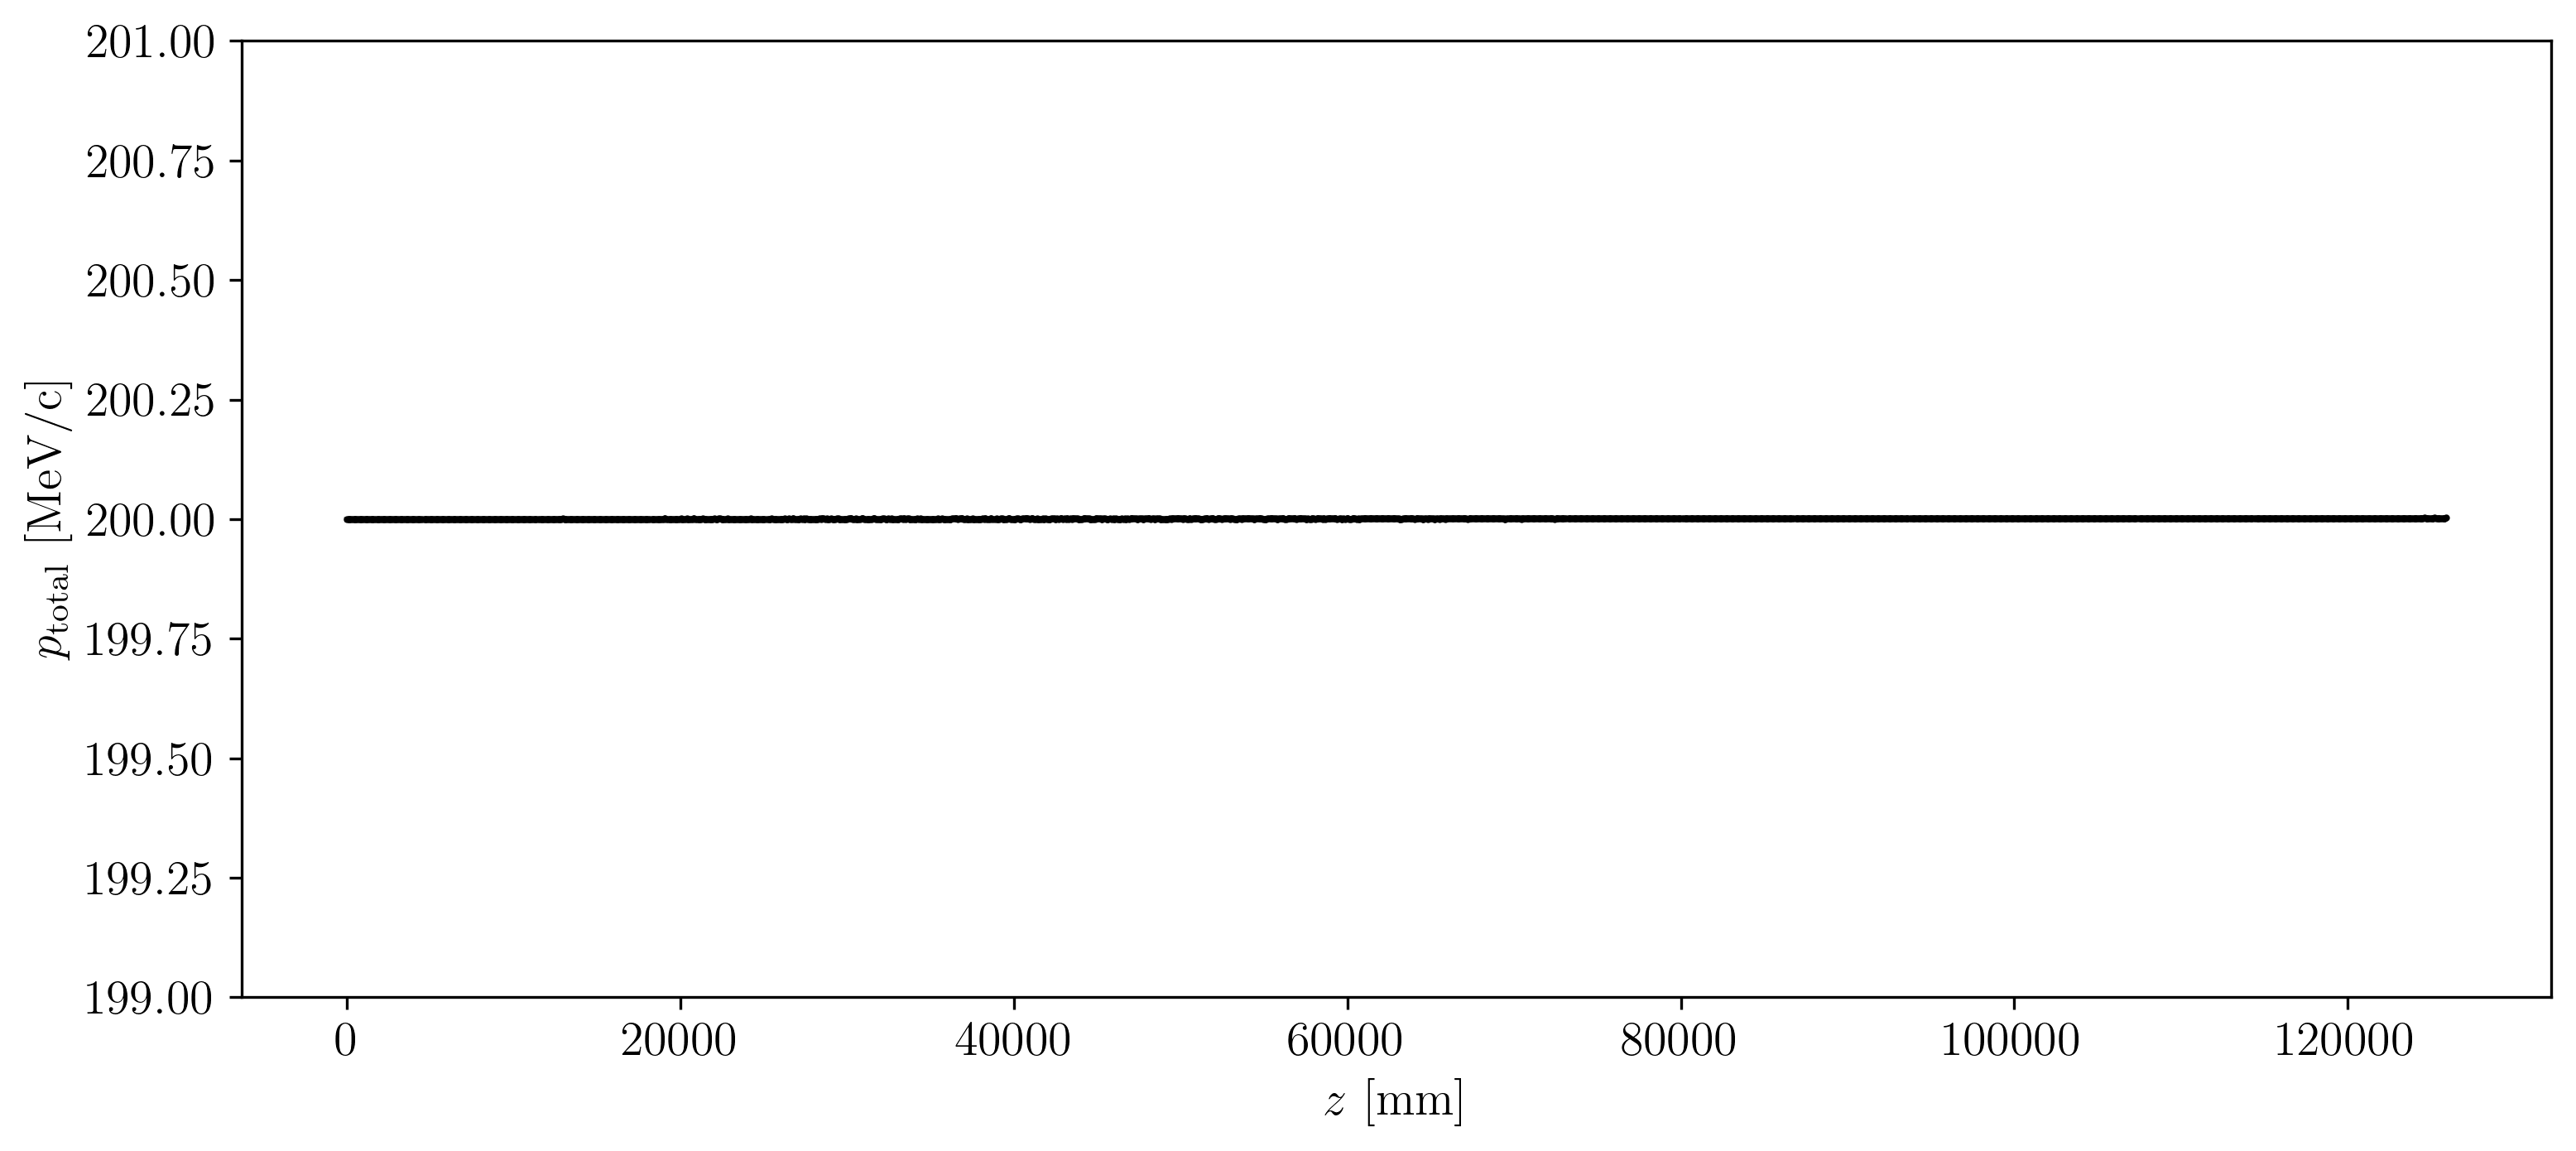

In [15]:
# Plot p_total vs. z:
plt.figure(figsize=(12,5))
plt.scatter(z_vals,ptotal_vals,color='black',s=1)
plt.plot(z_vals,ptotal_vals,color='black',alpha=0.5)
plt.ylim(199,201)
plt.xlabel('$z$ [mm]')
plt.ylabel(r'$p_{\text{total}}$ [MeV/c]')
plt.show()

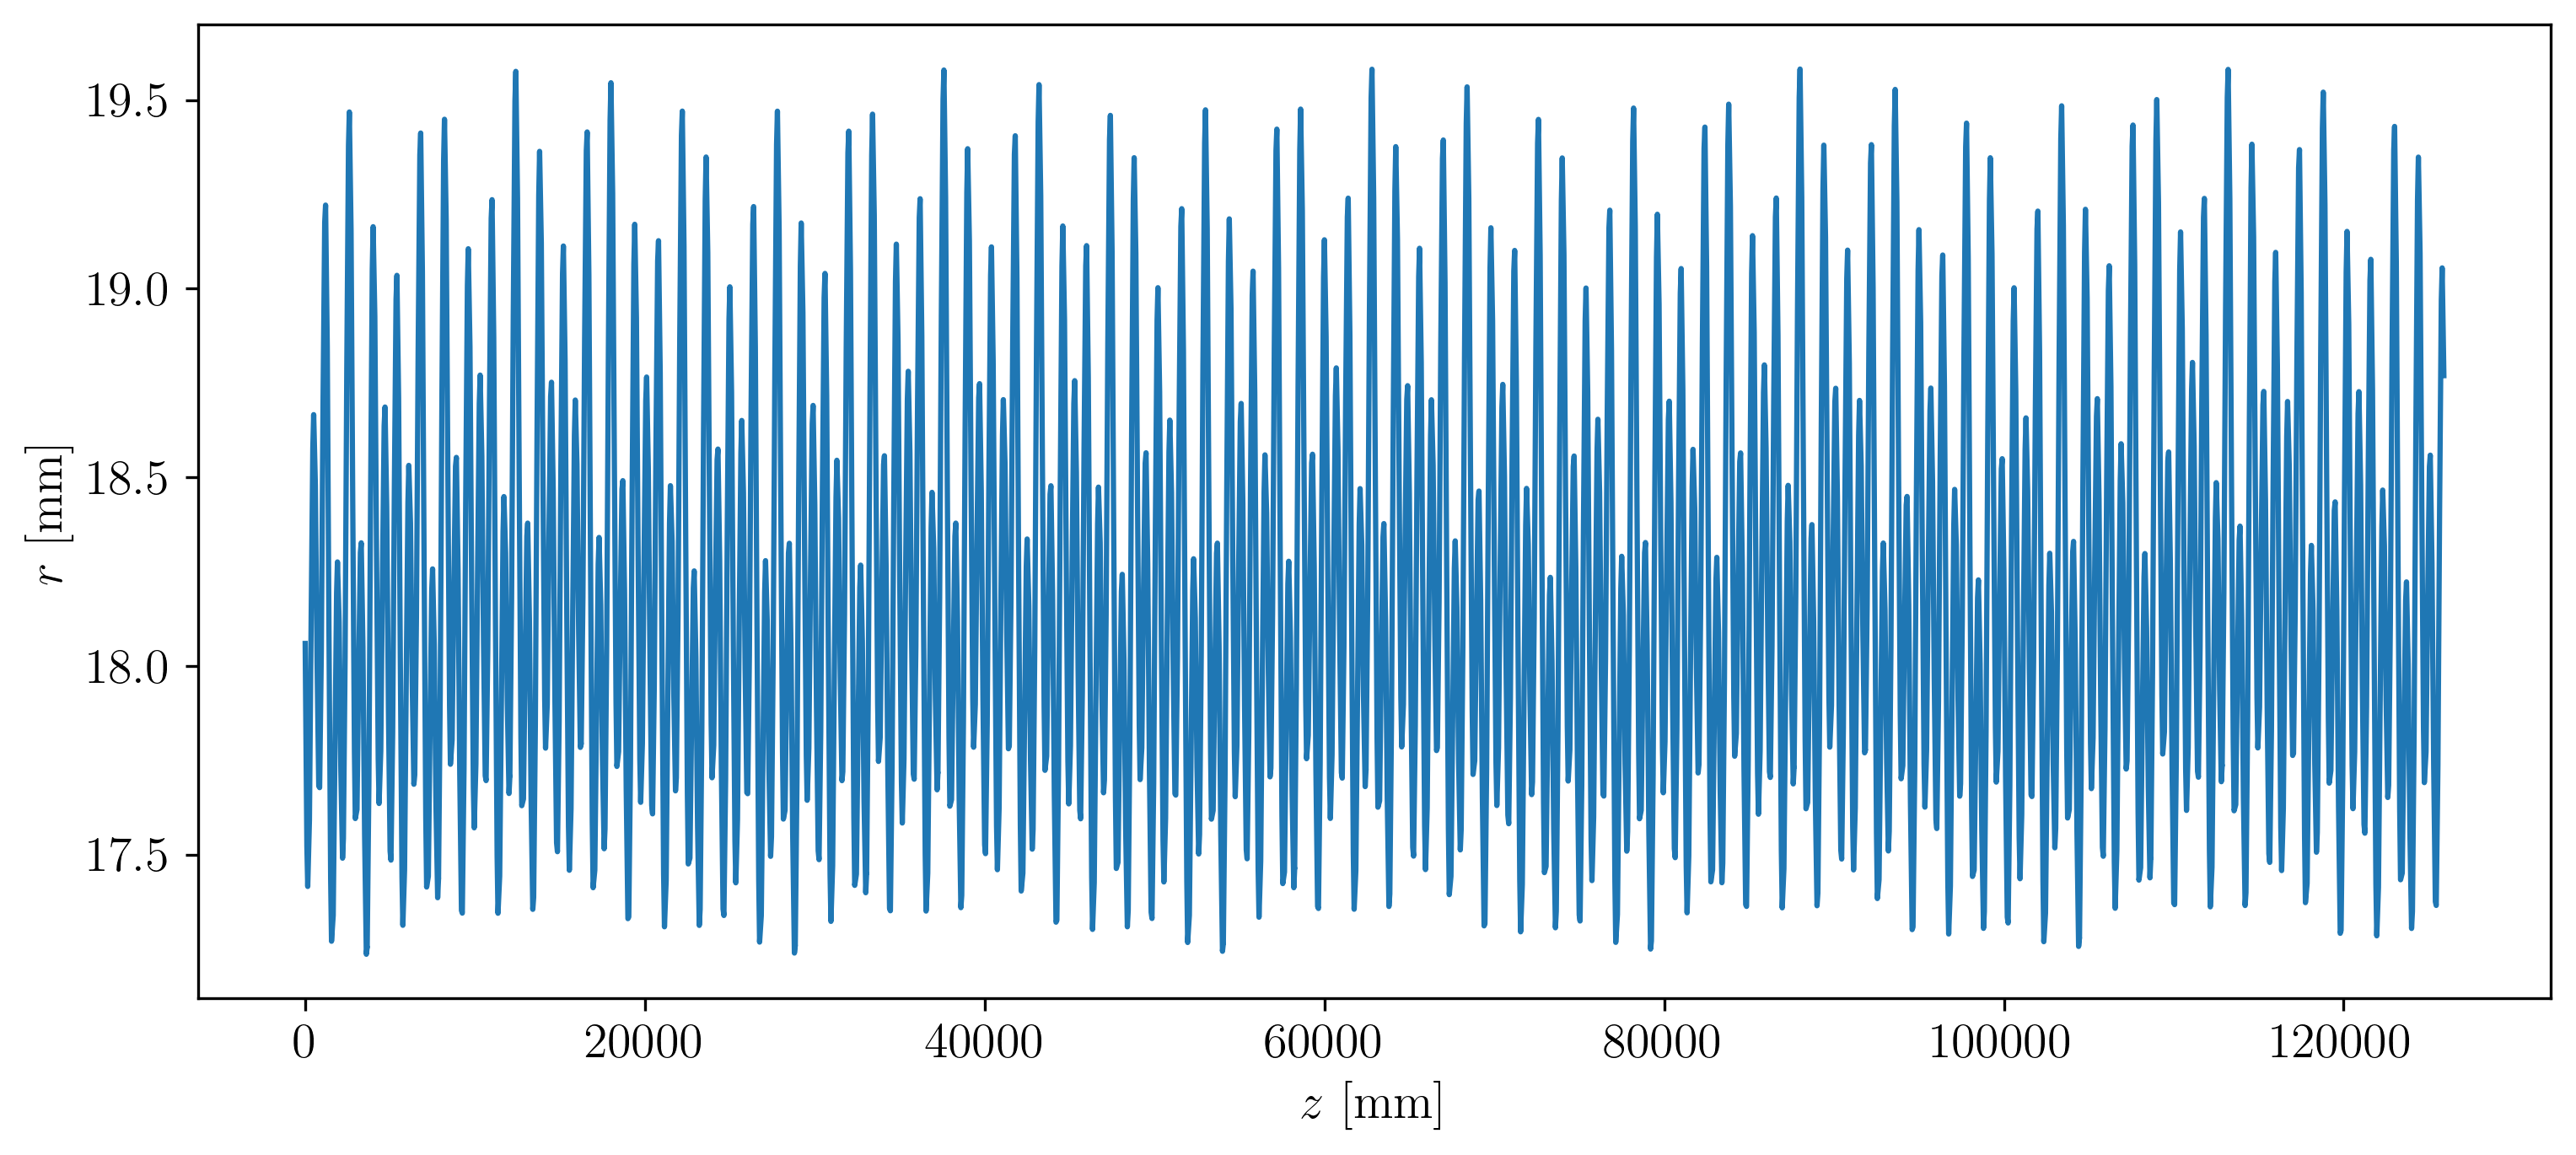

In [16]:
# Plot r vs. z:
plt.figure(figsize=(12,5))
plt.plot(z_vals,r_vals)
plt.xlabel('$z$ [mm]')
plt.ylabel('$r$ [mm]')
plt.show()

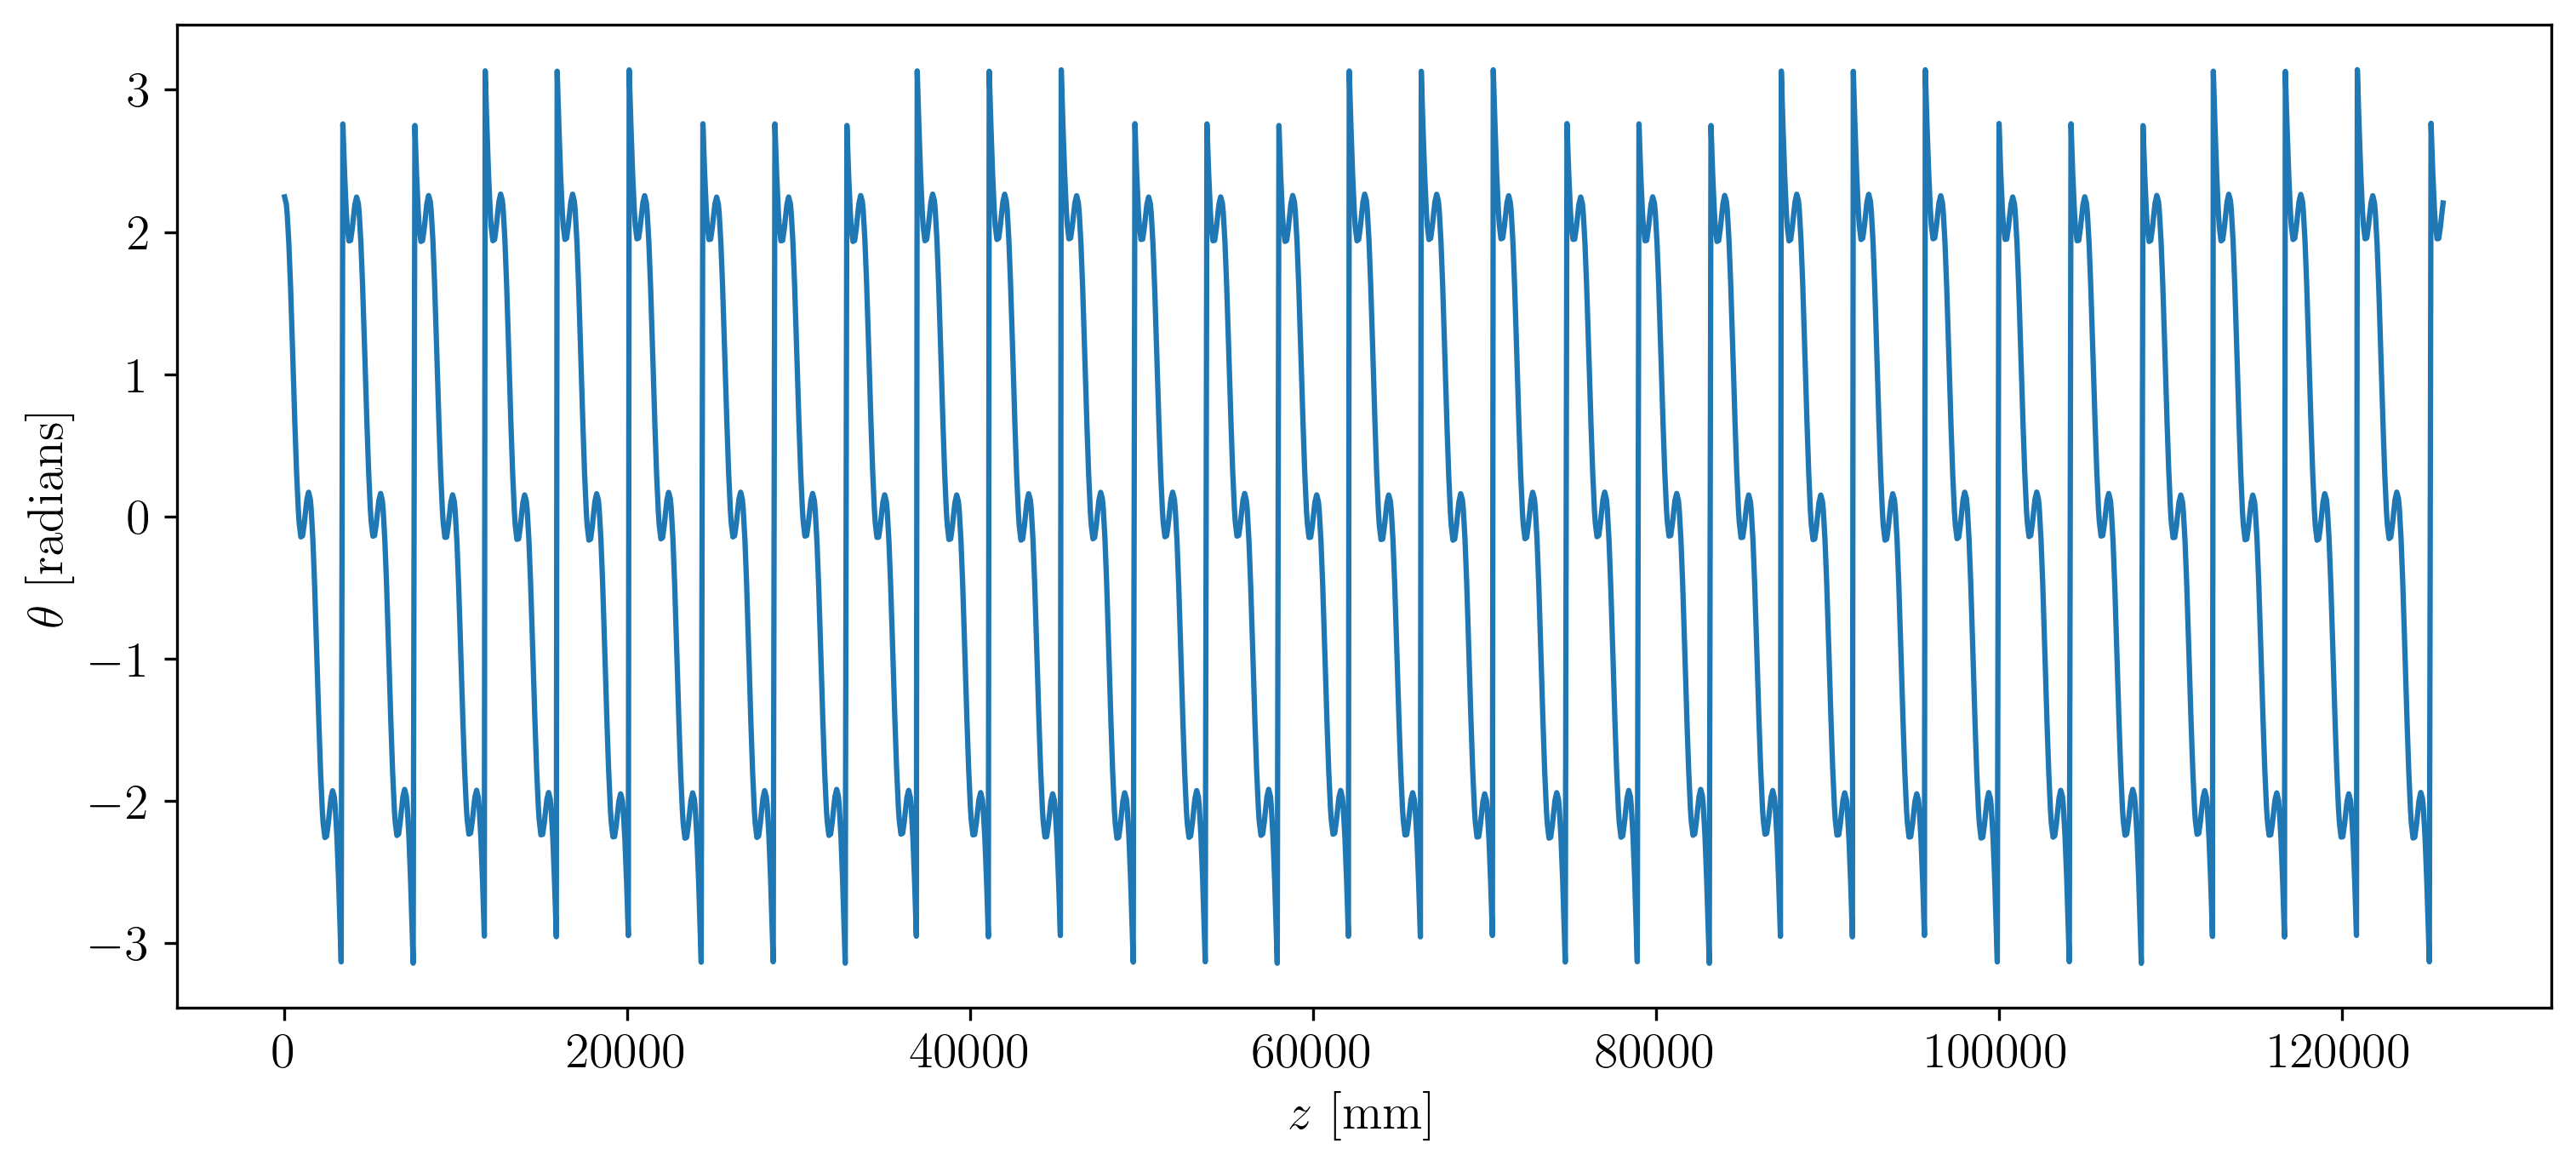

In [17]:
# Plot theta vs. z:
plt.figure(figsize=(12,5))
plt.plot(z_vals,theta_vals)
plt.xlabel('$z$ [mm]')
plt.ylabel(r'$\theta$ [radians]')
plt.show()

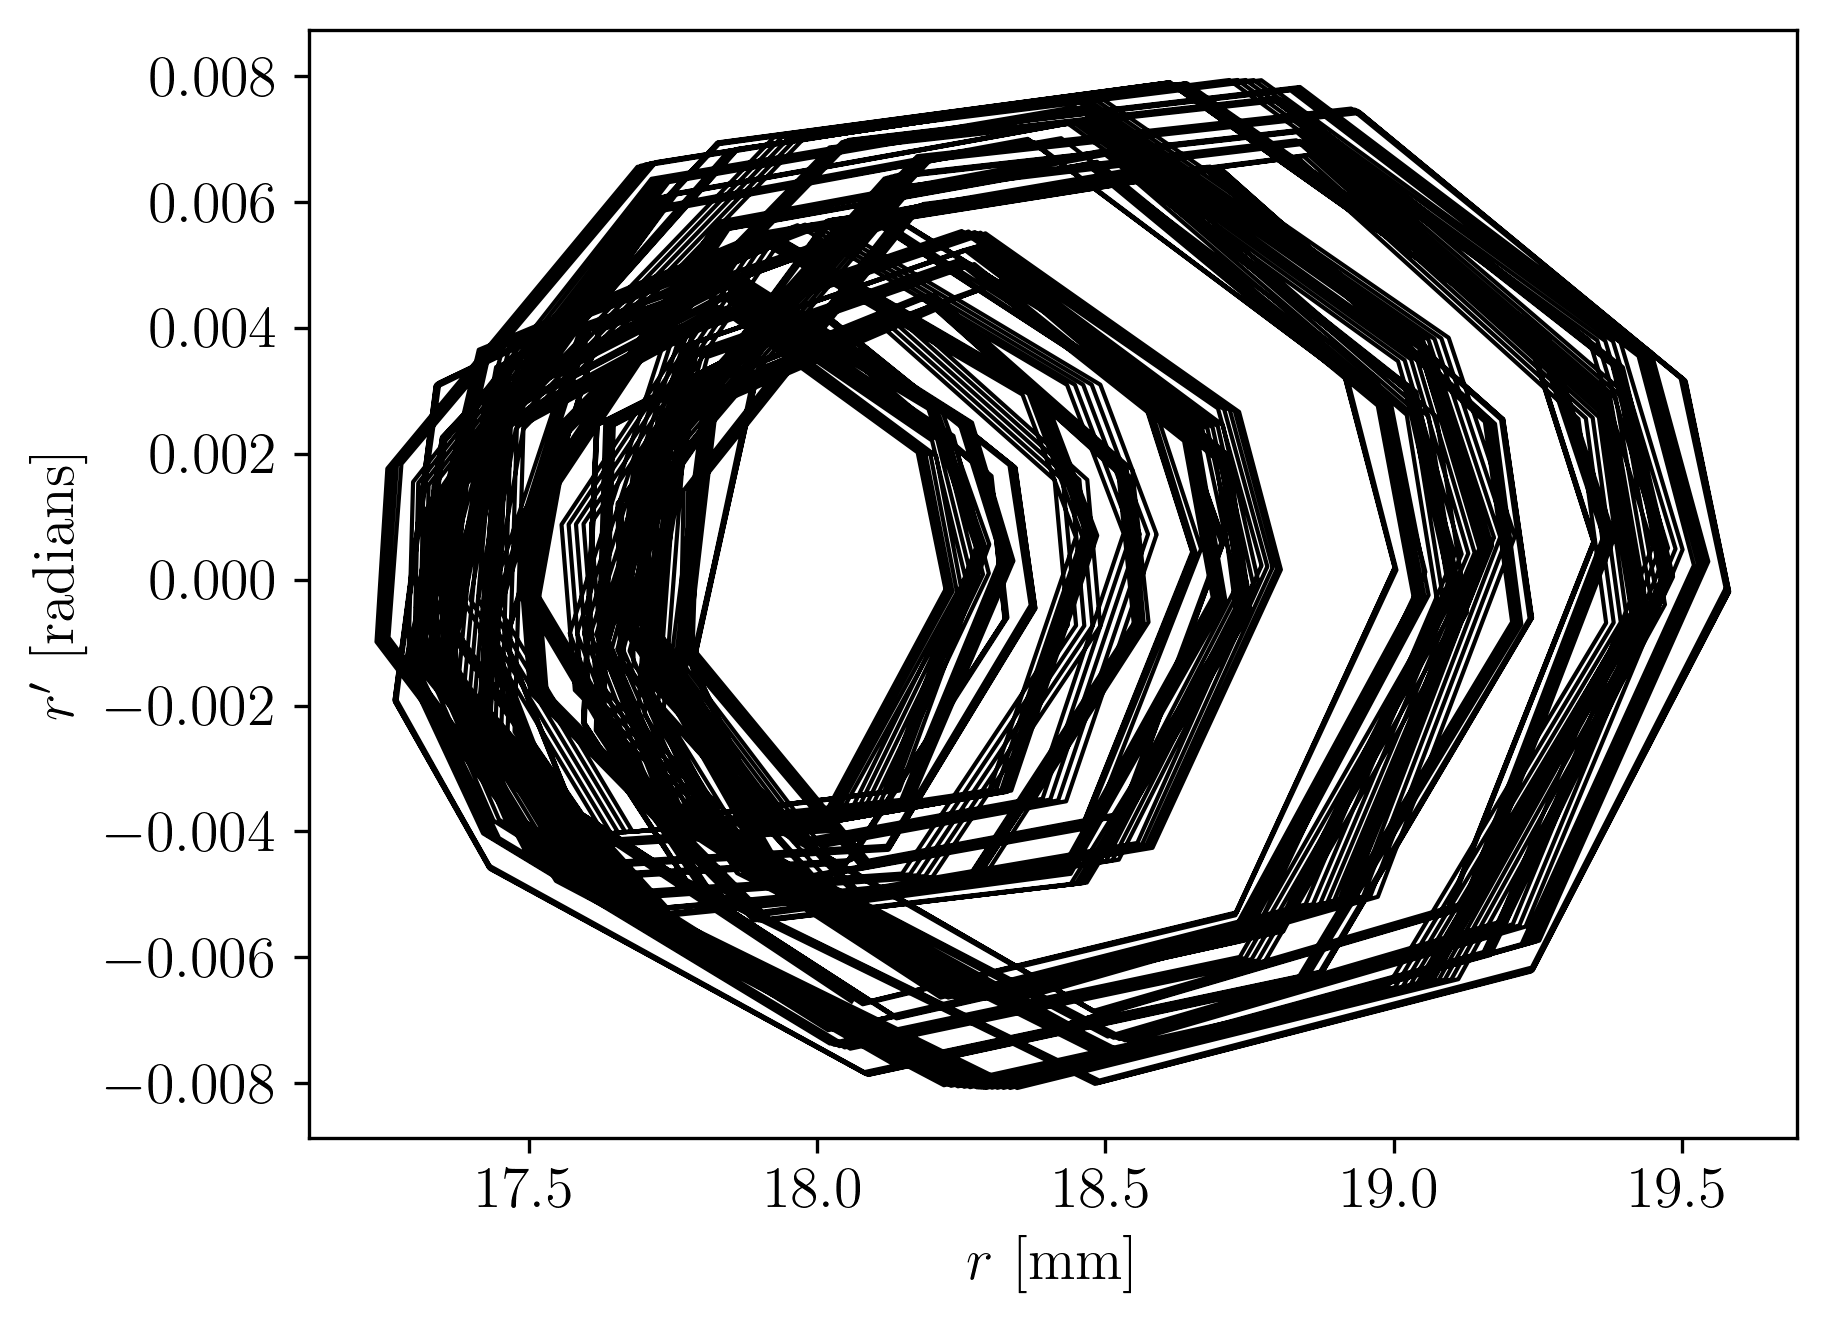

In [18]:
# Plot polar (r) phase space:
plt.plot(r_vals, rp_vals, color='black', linewidth=1)
plt.xlabel('$r$ [mm]')
plt.ylabel('$r^{\prime}$ [radians]')
plt.show()

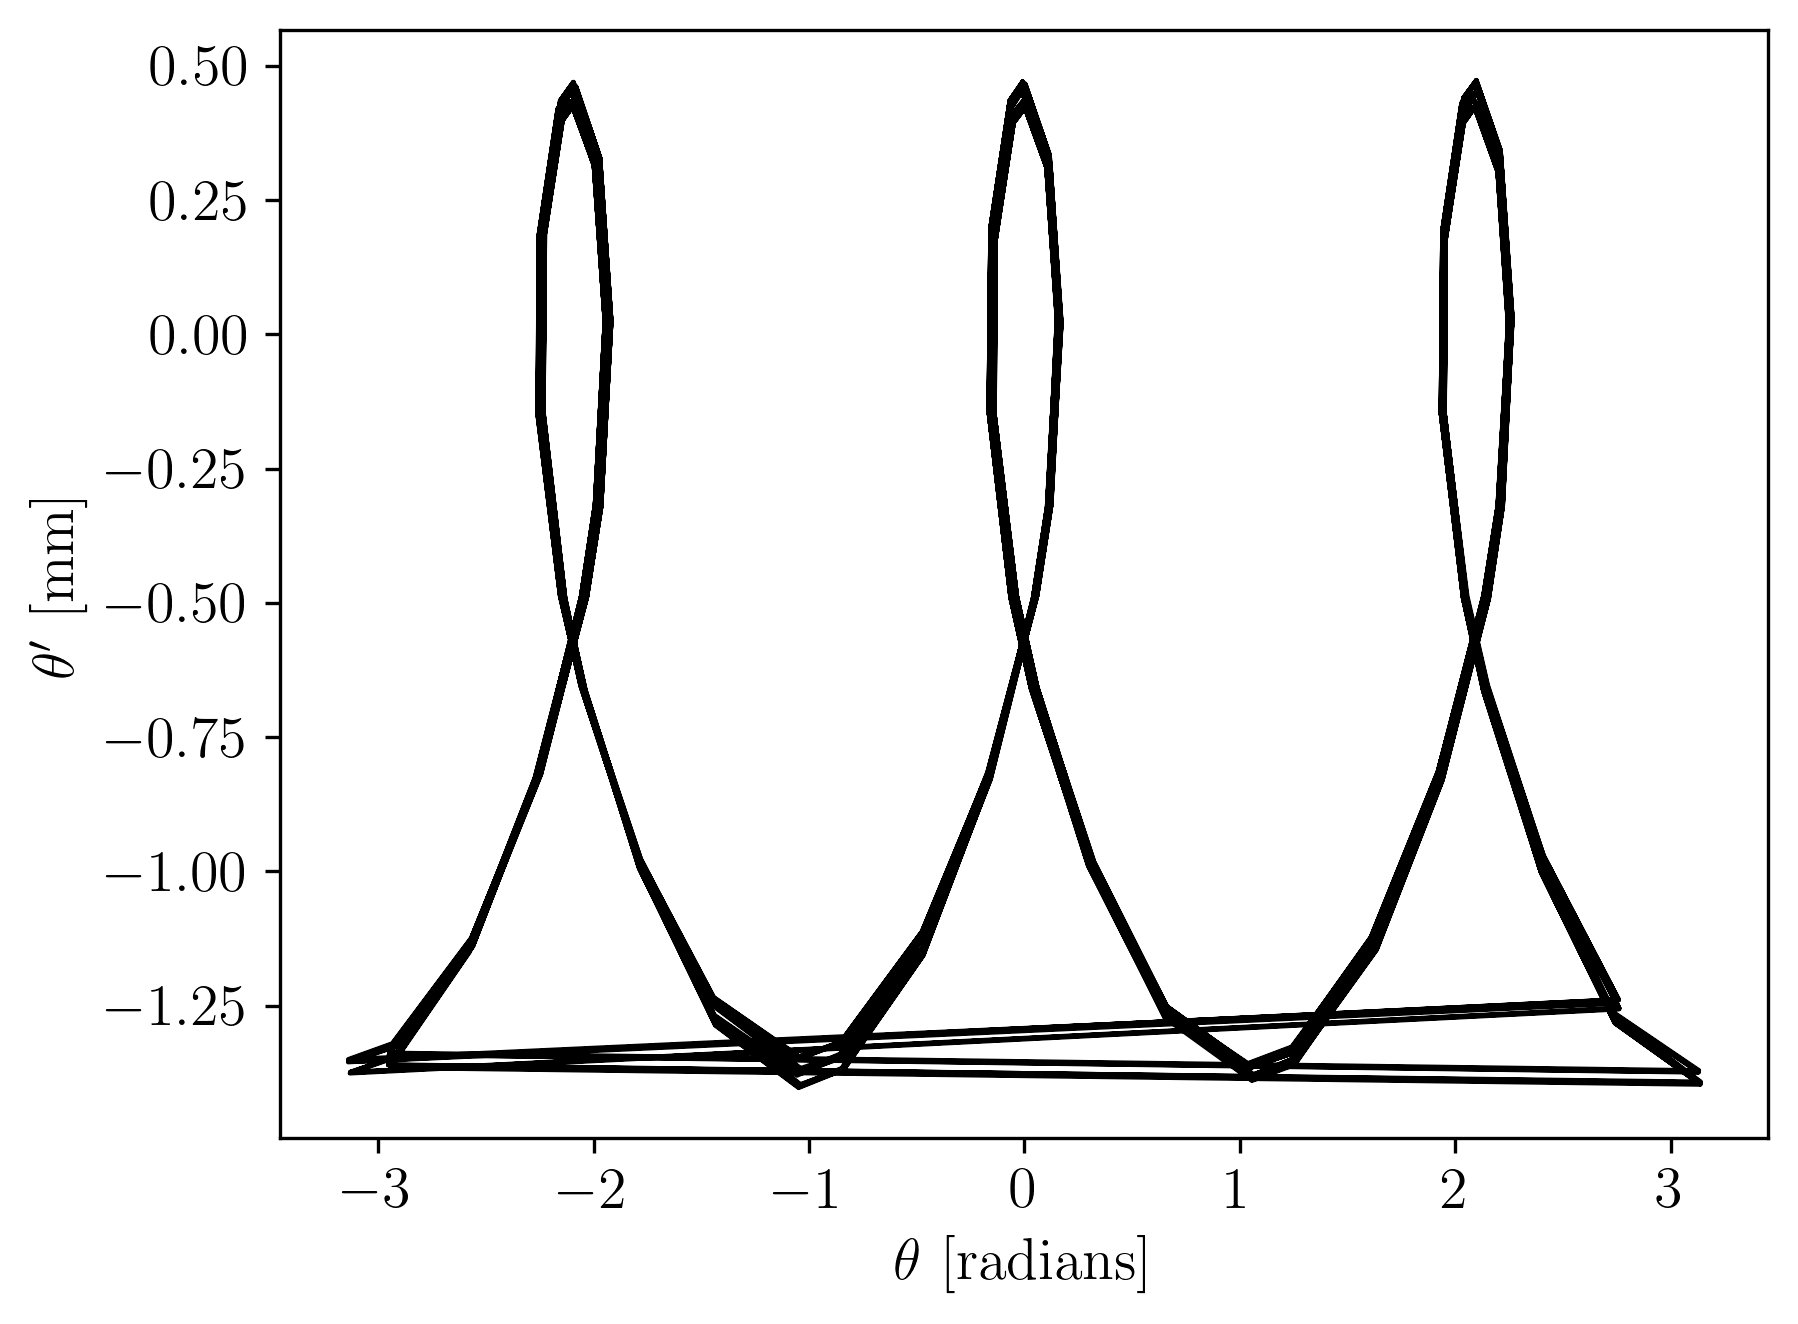

In [19]:
# Plot polar (theta) phase space:
plt.plot(theta_vals,thetap_vals,color='black',linewidth=1)
plt.xlabel(r'$\theta$ [radians]')
plt.ylabel(r'$\theta^{\prime}$ [mm]')
plt.show()

### Single period plots

In [5]:
# Set start and end indices for single period to consider:
start = period_start_indices[1]-1
end = period_start_indices[2]

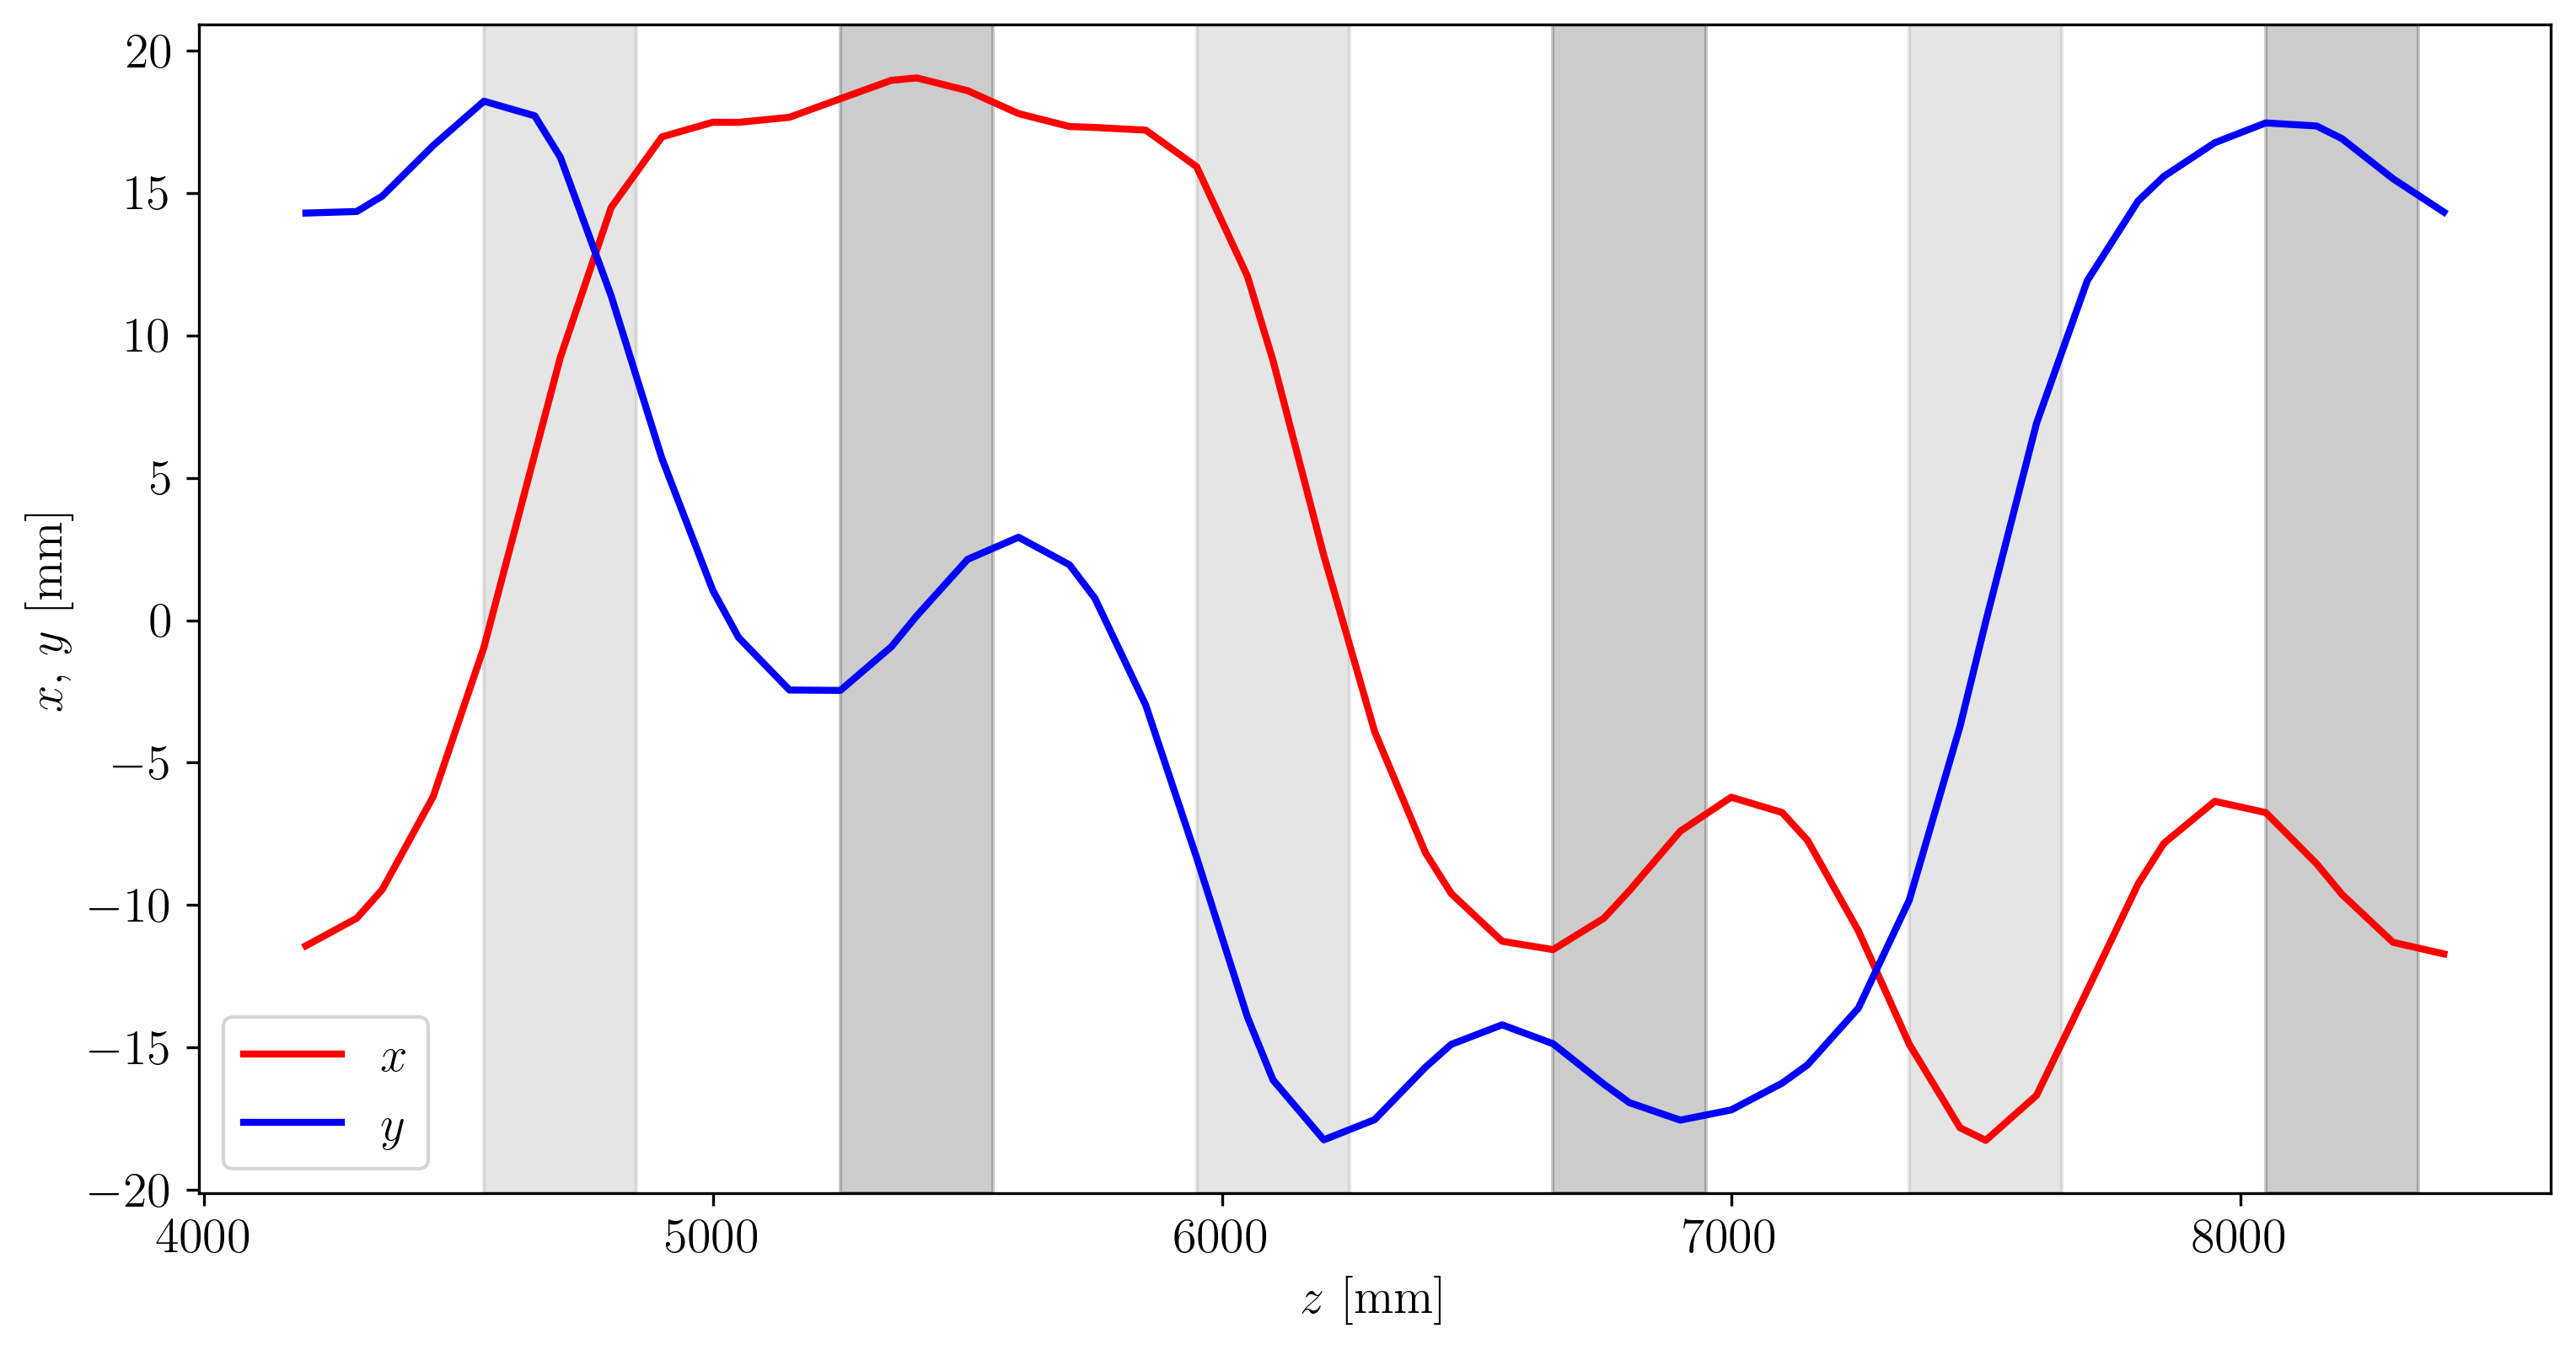

In [21]:
# Plot x, y vs. z for second period only:
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(z_vals[start:end],x_vals[start:end],color='red',label='$x$',linewidth=2)
ax.plot(z_vals[start:end],y_vals[start:end],color='blue',label='$y$',linewidth=2)
ax.set_xlabel('$z$ [mm]')
ax.set_ylabel('$x$, $y$ [mm]')
plot_solenoids(ax, zshift=z_vals[start], legend=False)
ax.legend()
plt.show()

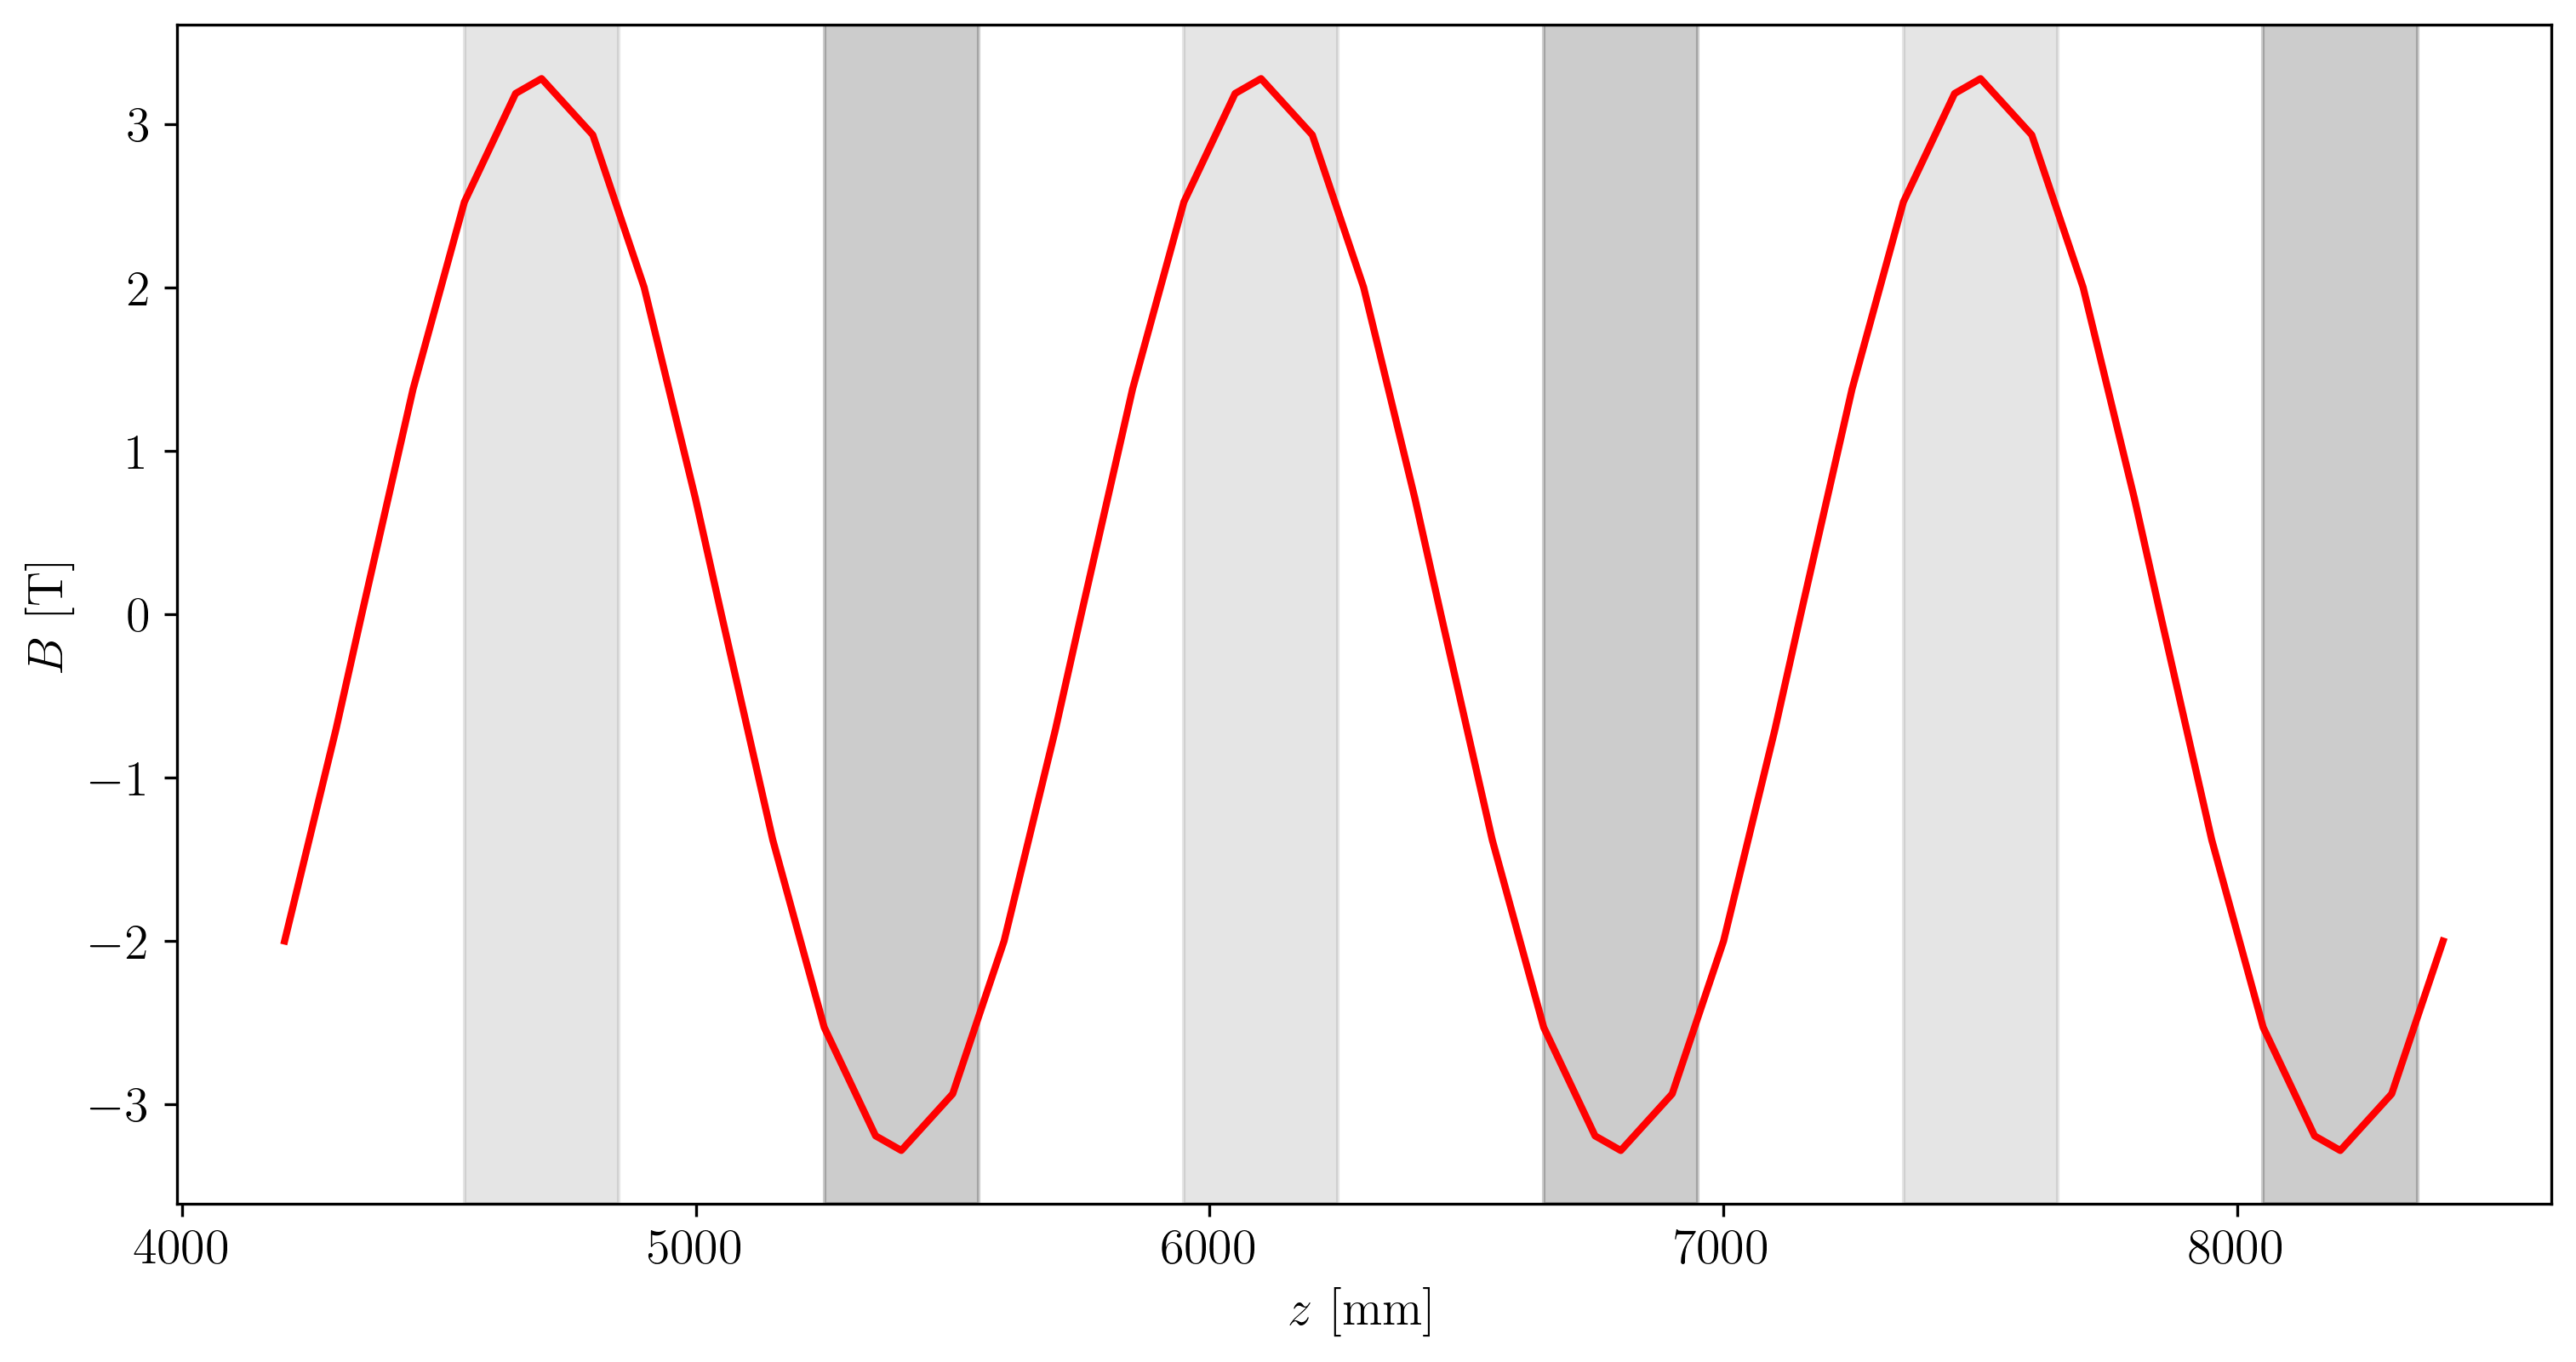

In [22]:
# Plot B_z vs. z:
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(z_vals[start:end],Bz_vals[start:end],color='red',linewidth=2)
ax.set_xlabel('$z$ [mm]')
ax.set_ylabel('$B$ [T]')
plot_solenoids(ax, zshift=z_vals[start], legend=False)
plt.show()

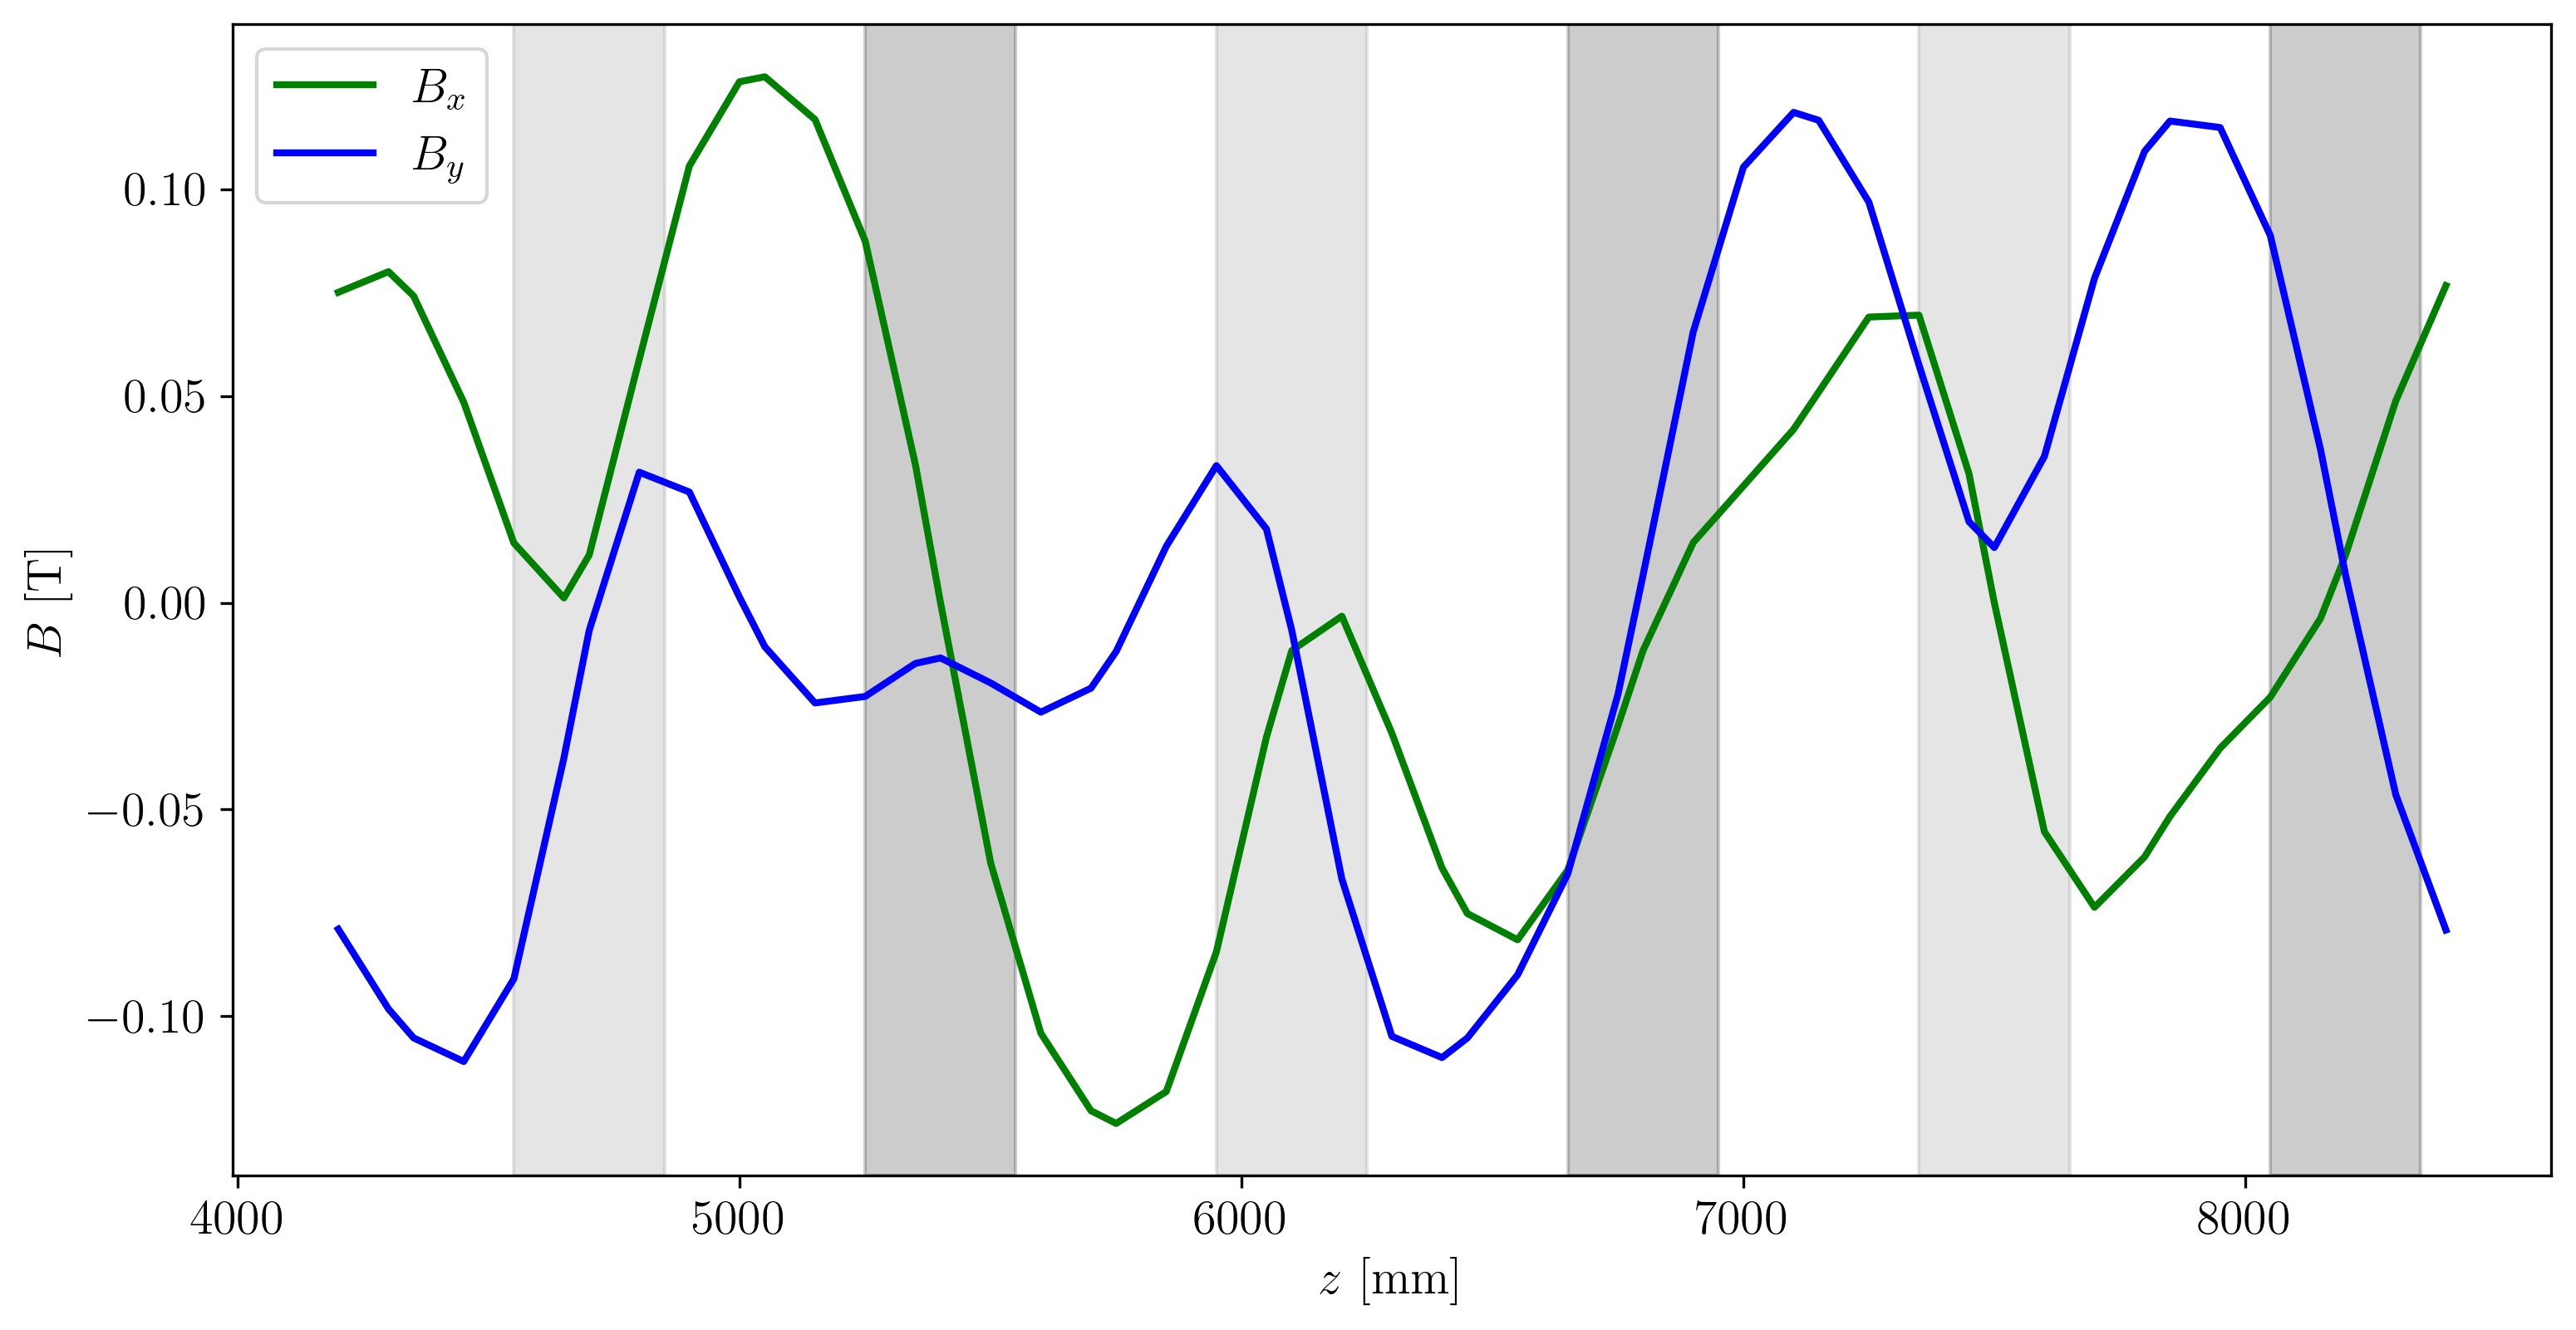

In [23]:
# Plot B_x, B_y vs. z:
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(z_vals[start:end],Bx_vals[start:end],color='green',label='$B_x$',linewidth=2)
ax.plot(z_vals[start:end],By_vals[start:end],color='blue',label='$B_y$',linewidth=2)
ax.set_xlabel('$z$ [mm]')
ax.set_ylabel('$B$ [T]')
plot_solenoids(ax, zshift=z_vals[start], legend=False)
ax.legend()
plt.show()

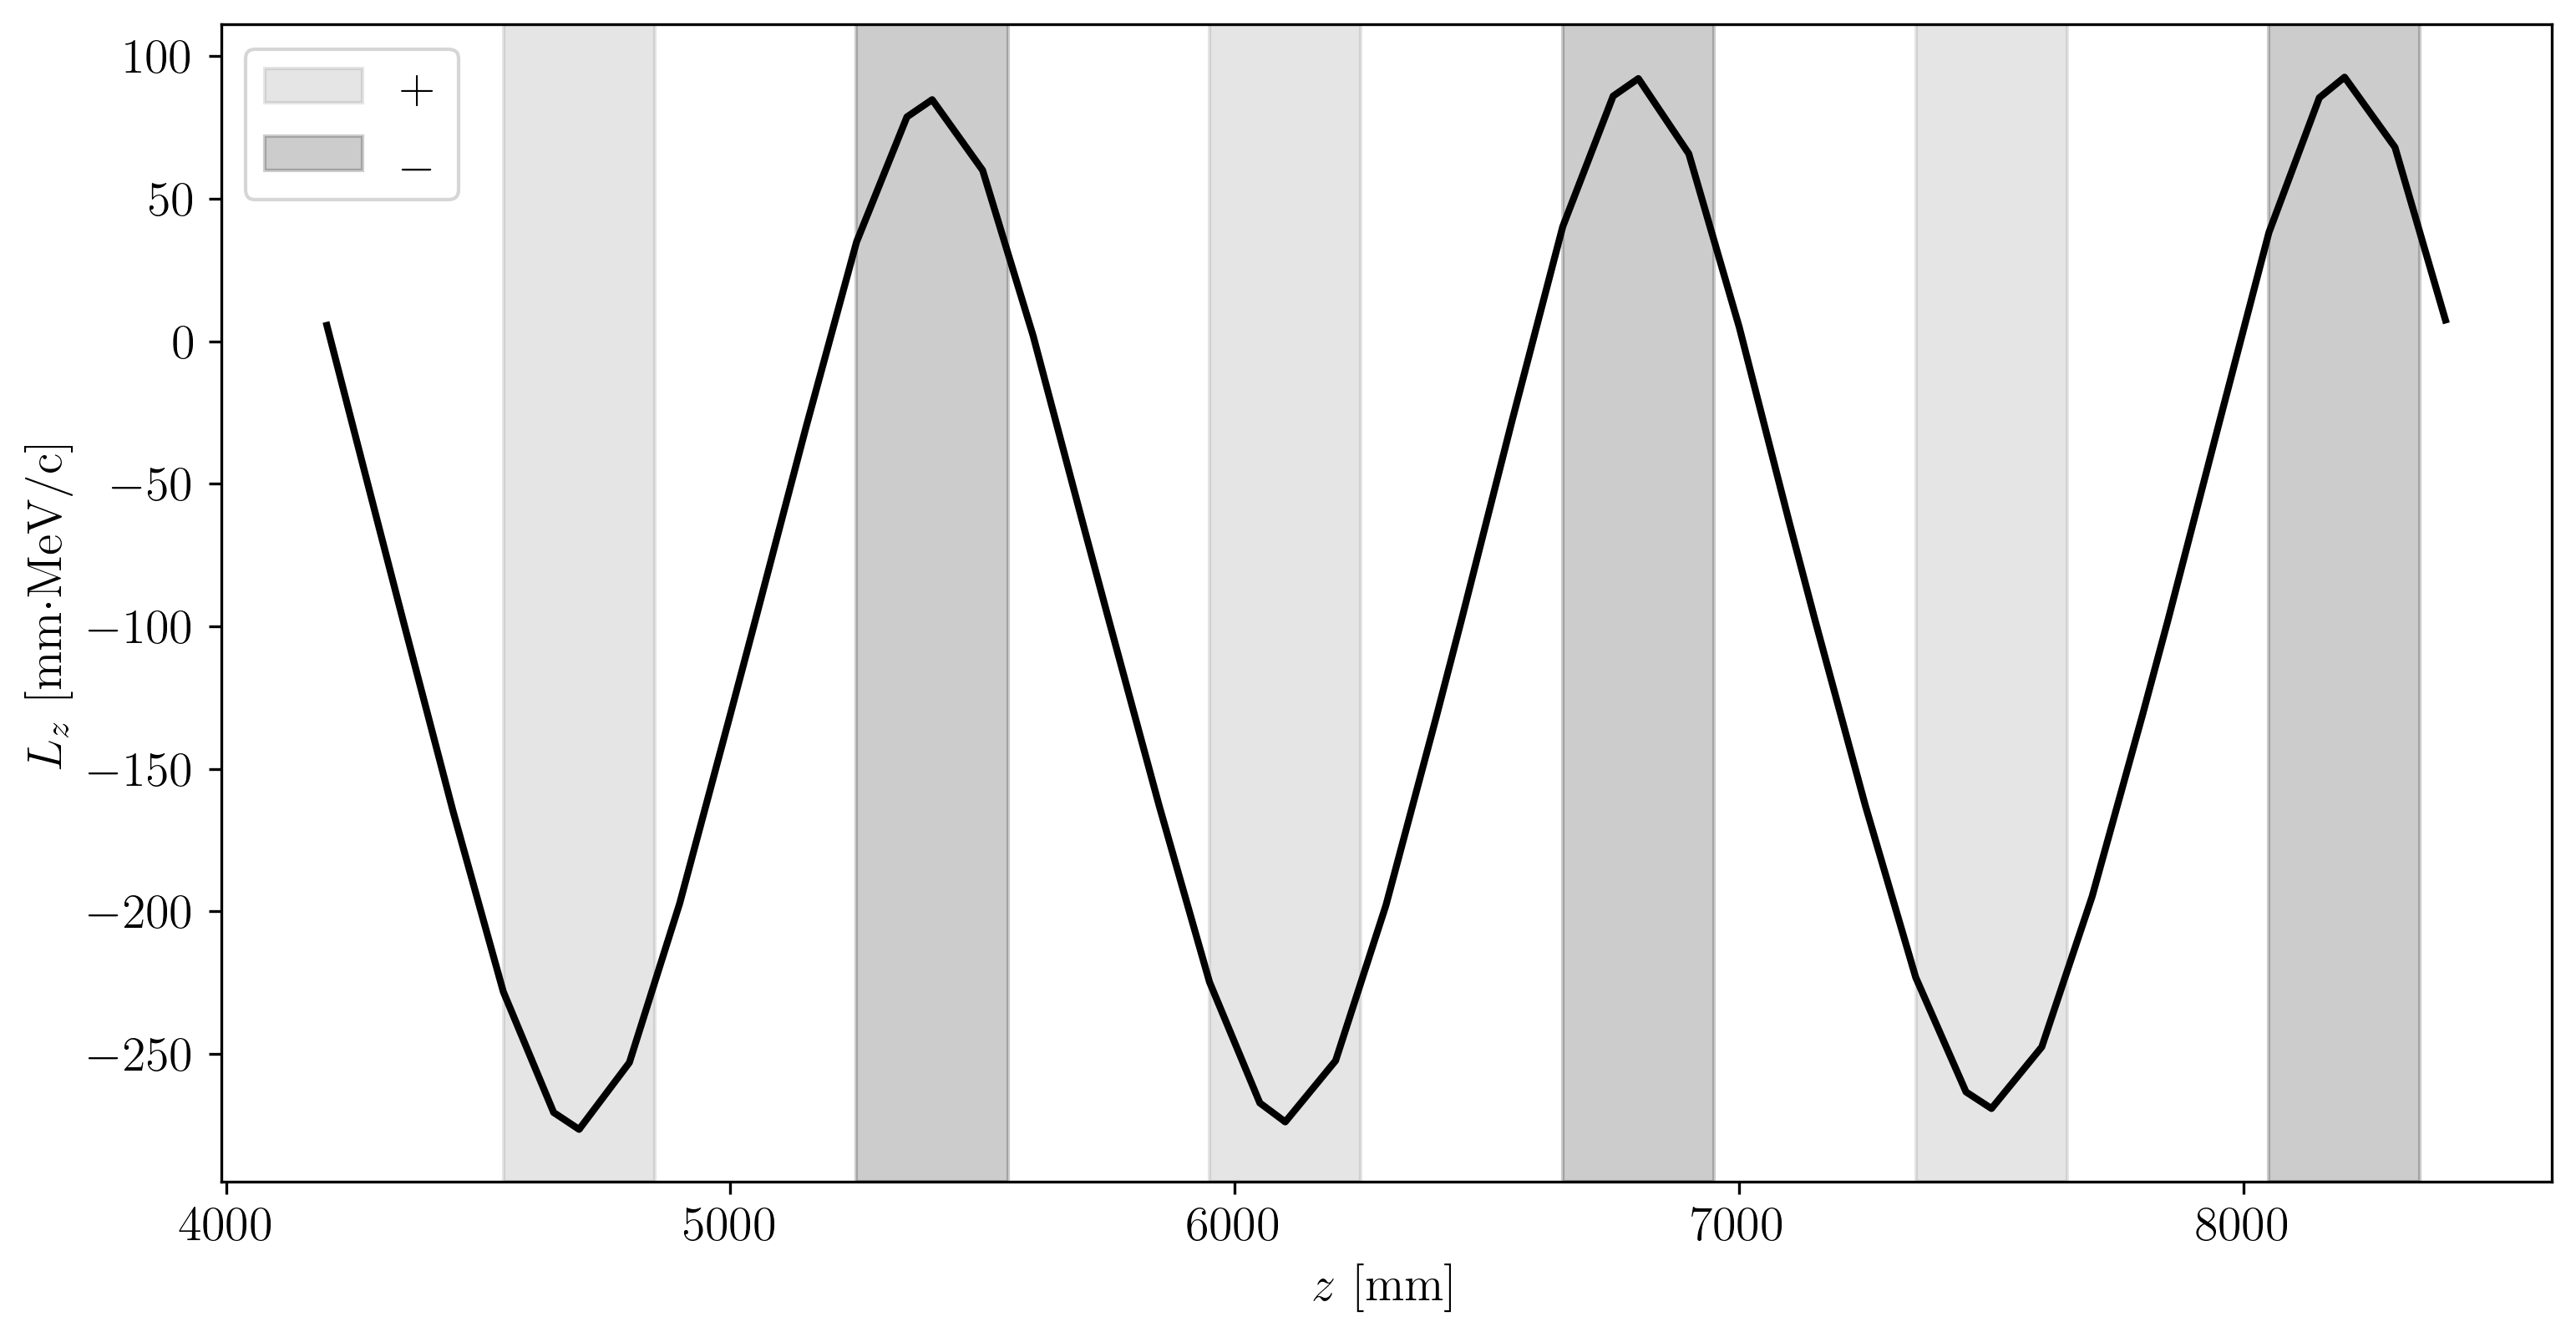

In [24]:
# Plot L_z vs. z:
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(z_vals[start:end],Lz_vals[start:end],color='black',linewidth=2)
ax.set_xlabel('$z$ [mm]')
ax.set_ylabel(r'$L_z$ [mm$\cdot$MeV/c]')
plot_solenoids(ax, zshift=z_vals[start])
ax.legend()
plt.show()

### Color Plots

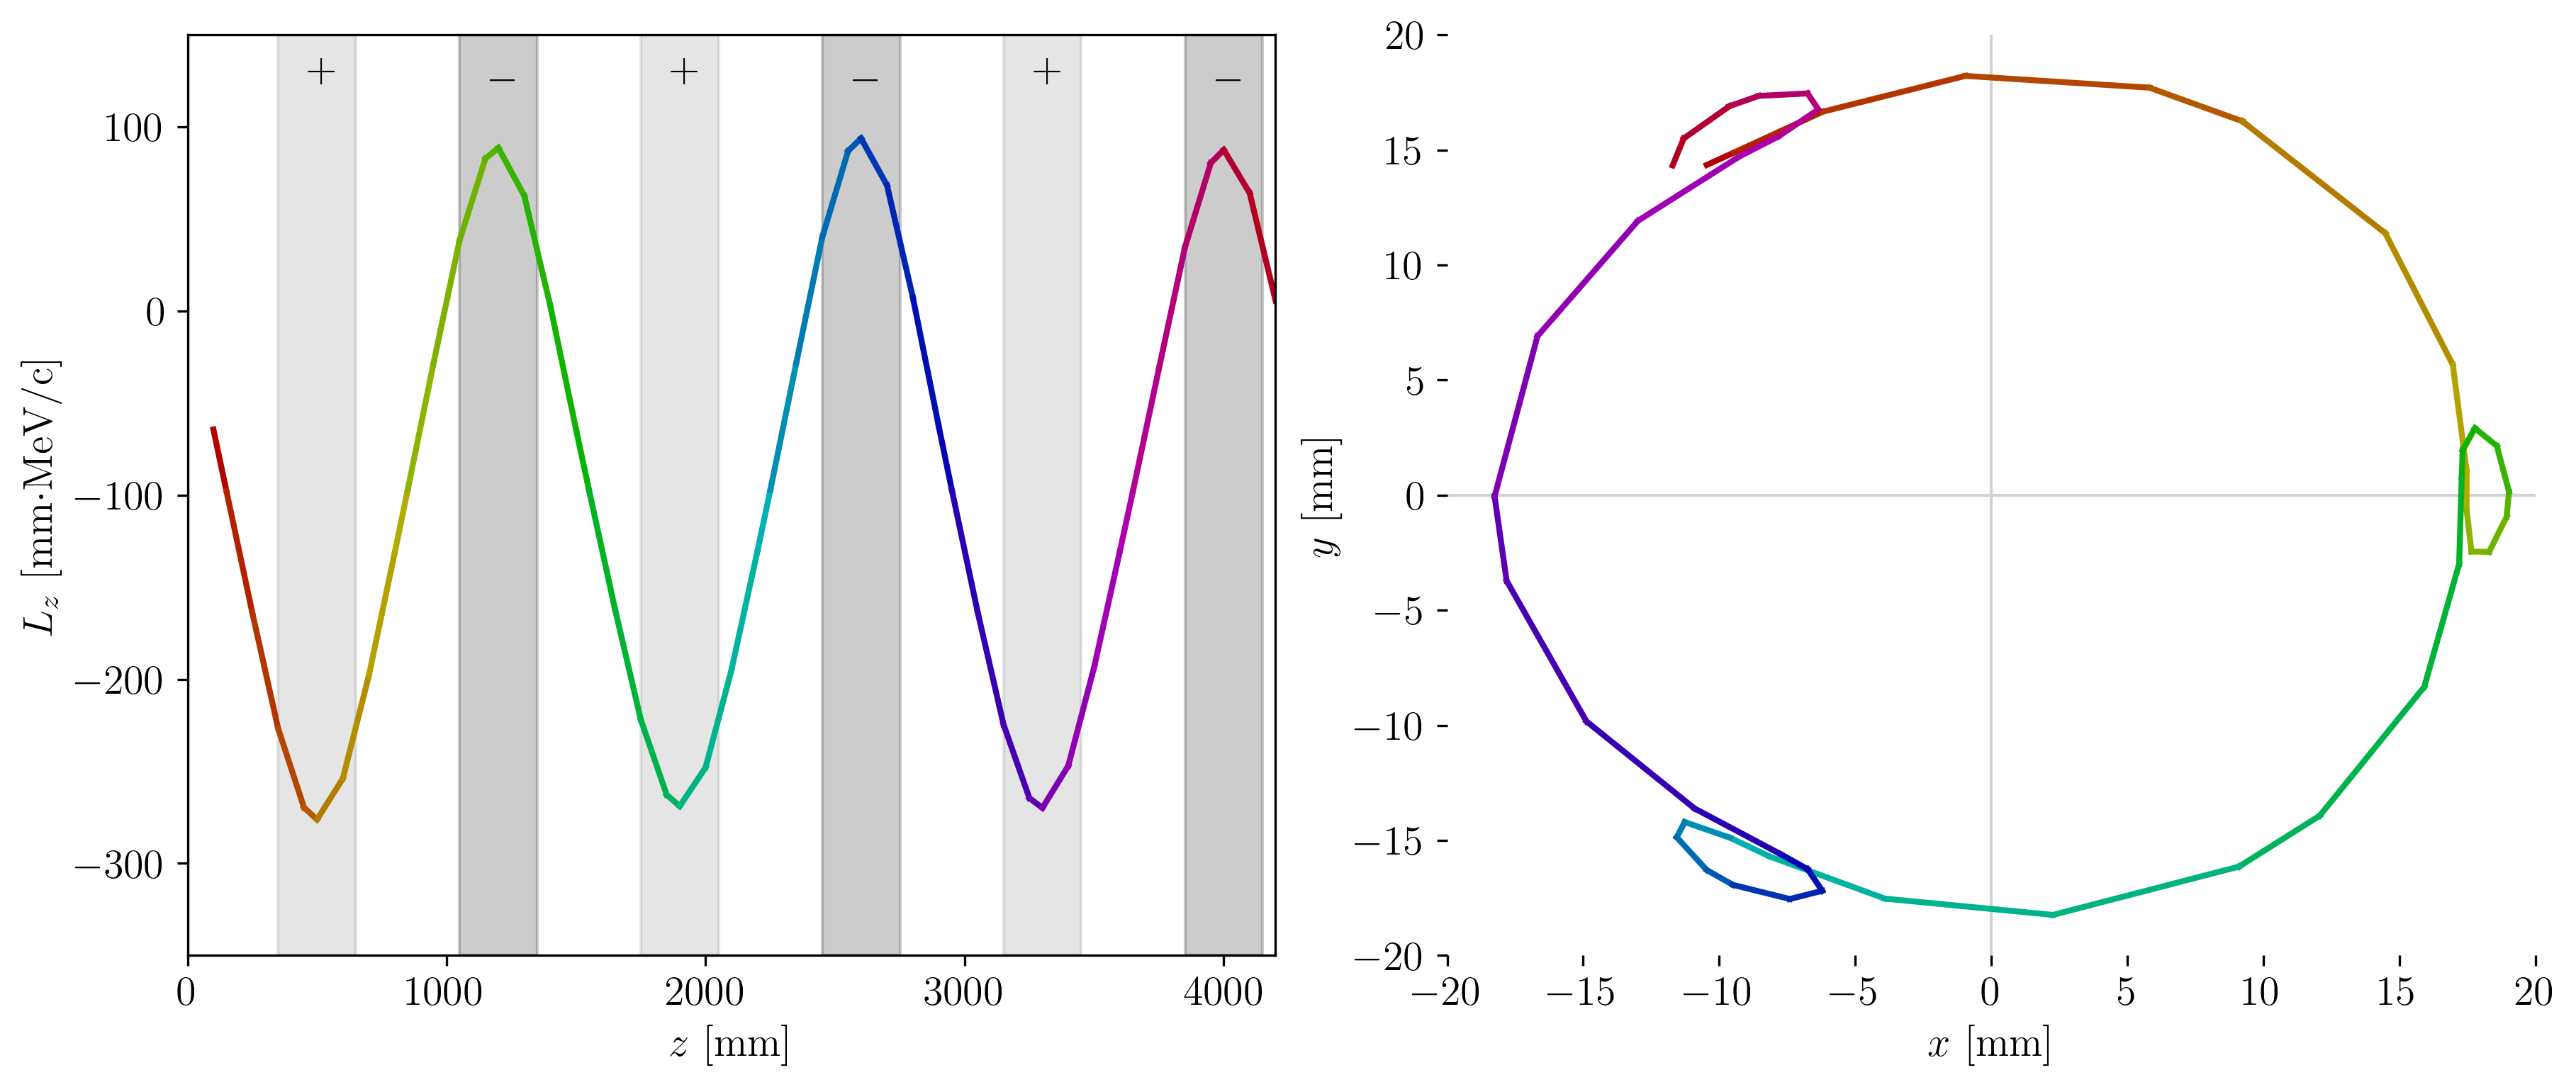

In [10]:
# Subplot L_z vs. z and orbit with color indicating timing:

start1, end1 = period_start_indices[0], period_start_indices[1]
start2, end2 = period_start_indices[1], period_start_indices[2]

z_slice = z_vals[start1:end1]
Lz_slice = Lz_vals[start1:end1]
x_slice = x_vals[start2:end2]
y_slice = y_vals[start2:end2]

min_len = min(len(z_slice), len(Lz_slice), len(x_slice), len(y_slice))
z_slice = z_slice[:min_len]
Lz_slice = Lz_slice[:min_len]
x_slice = x_slice[:min_len]
y_slice = y_slice[:min_len]

t_vals_copy = t_vals.copy()
t_vals_copy = np.arange(min_len)
norm = Normalize(vmin=t_vals_copy.min(), vmax=t_vals_copy.max())
cmap = plt.colormaps['hsv']
base = plt.get_cmap(cmap, 256)
colors = base(np.linspace(0, 1, 256))
colors[:, :3] *= 0.7
cmap = ListedColormap(colors)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)
plot_solenoids(ax1)

for i in range(n):
    center = 500 + i*d - 35
    if np.mod(i,2) == 0: # positive polarity
        ax1.text(center, 125, s='$+$')
    else: # negative polarity
        ax1.text(center, 125, s='$-$')

for i in range(min_len - 1):
    color = cmap(norm(t_vals_copy[i]))
    ax1.plot(z_slice[i:i+2], Lz_slice[i:i+2], color=color, linewidth=2)
    ax2.plot(x_slice[i:i+2], y_slice[i:i+2], color=color, linewidth=2)

ax1.set_xlim((0, 4200))
ax1.set_ylim((-350, 150))
ax1.set_xlabel('$z$ [mm]')
ax1.set_ylabel(r'$L_z$ [mm$\cdot$MeV/c]')

ax2.set_xlim((-20, 20))
ax2.set_ylim((-20, 20))
ax2.set_xlabel('$x$ [mm]')
ax2.set_ylabel('$y$ [mm]')

for spine in ['top', 'right', 'bottom', 'left']:
    plt.gca().spines[spine].set_visible(False)
ax2.axhline(0, color='lightgray', linewidth=1, zorder=-10)
ax2.axvline(0, color='lightgray', linewidth=1, zorder=-10)

plt.show()

/var/folders/c9/q_ds728s44z0_fjv35nz68ym0000gn/T/ipykernel_22922/4044565827.py:65: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


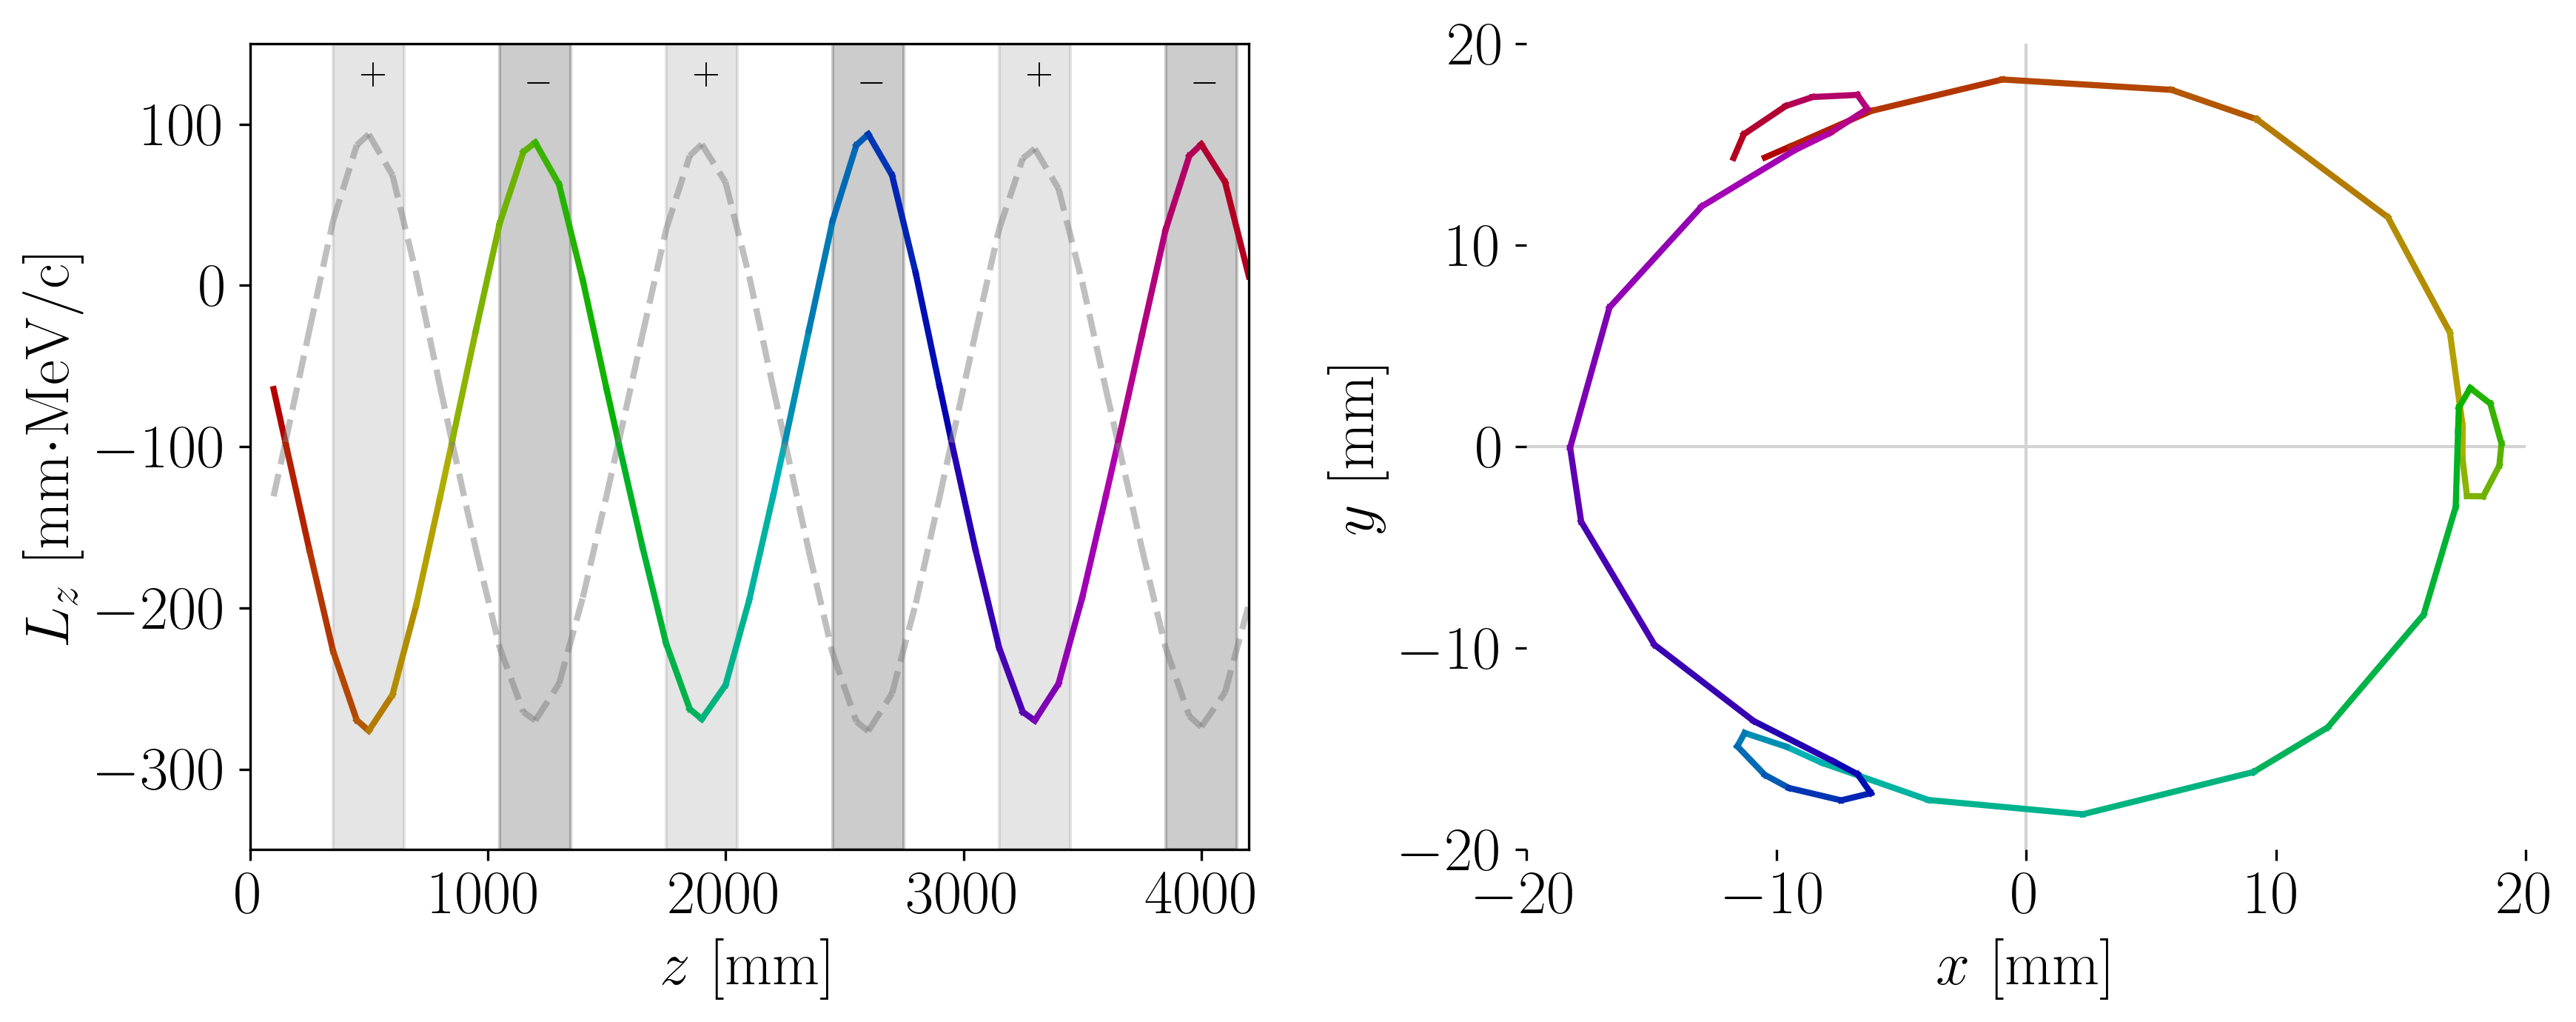

In [14]:
plt.rcParams.update({'font.size': 20})

# Subplot L_z vs. z and orbit with color indicating timing -- with mu minus:

start1, end1 = period_start_indices[0], period_start_indices[1]
start2, end2 = period_start_indices[1], period_start_indices[2]

z_slice = z_vals[start1:end1]
Lz_slice = Lz_vals[start1:end1]
x_slice = x_vals[start2:end2]
y_slice = y_vals[start2:end2]

# mu minus:
start = int( (period_start_indices[1] - period_start_indices[0]) /2 )
Lz_vals_minus = Lz_vals[start:]
Lz_slice_minus = Lz_vals_minus[start1:end1]

min_len = min(len(z_slice), len(Lz_slice), len(x_slice), len(y_slice))
z_slice = z_slice[:min_len]
Lz_slice = Lz_slice[:min_len]
x_slice = x_slice[:min_len]
y_slice = y_slice[:min_len]
Lz_slice_minus = Lz_slice_minus[:min_len]

t_vals_copy = t_vals.copy()
t_vals_copy = np.arange(min_len)
norm = Normalize(vmin=t_vals_copy.min(), vmax=t_vals_copy.max())
cmap = plt.colormaps['hsv']
base = plt.get_cmap(cmap, 256)
colors = base(np.linspace(0, 1, 256))
colors[:, :3] *= 0.7
cmap = ListedColormap(colors)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)
plot_solenoids(ax1)

for i in range(n):
    center = 500 + i*d - 35
    if np.mod(i,2) == 0: # positive polarity
        ax1.text(center, 125, s='$+$', fontsize=12)
    else: # negative polarity
        ax1.text(center, 125, s='$-$', fontsize=12)

for i in range(min_len - 1):
    color = cmap(norm(t_vals_copy[i]))
    ax1.plot(z_slice[i:i+2], Lz_slice[i:i+2], color=color, linewidth=2)
    ax1.plot(z_slice[i:i+2], Lz_slice_minus[i:i+2], color='gray', linewidth=2, linestyle='dashed', alpha=0.5)
    ax2.plot(x_slice[i:i+2], y_slice[i:i+2], color=color, linewidth=2)

ax1.set_xlim((0, 4200))
ax1.set_ylim((-350, 150))
ax1.set_xlabel('$z$ [mm]')
ax1.set_ylabel(r'$L_z$ [mm$\cdot$MeV/c]')

ax2.set_xlim((-20, 20))
ax2.set_ylim((-20, 20))
ax2.set_xlabel('$x$ [mm]')
ax2.set_ylabel('$y$ [mm]')

for spine in ['top', 'right', 'bottom', 'left']:
    plt.gca().spines[spine].set_visible(False)
ax2.axhline(0, color='lightgray', linewidth=1, zorder=-10)
ax2.axvline(0, color='lightgray', linewidth=1, zorder=-10)

plt.tight_layout()
plt.savefig(fig_dir+'reference_particle.pdf', dpi=400)

plt.show()

### Animations

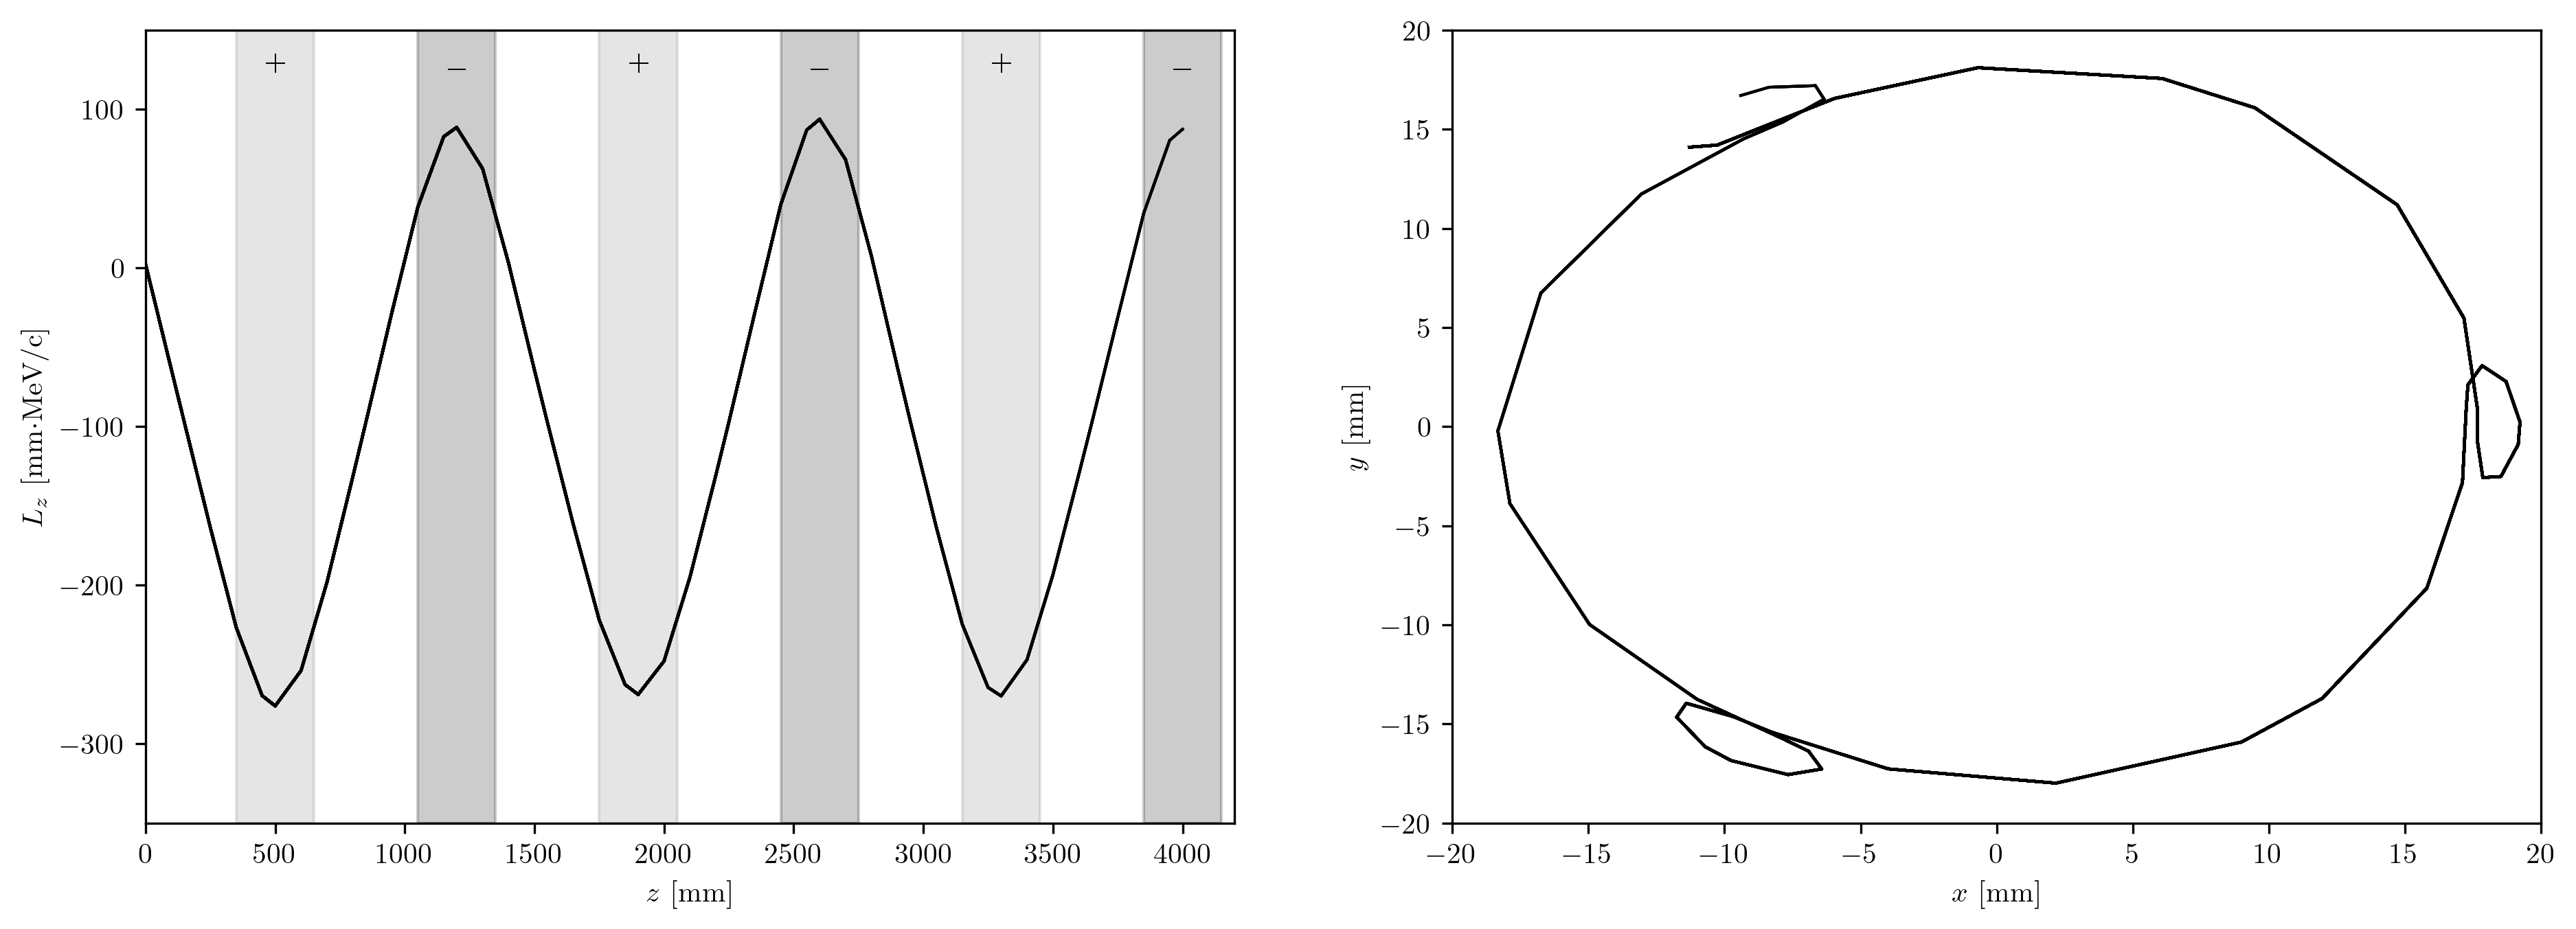

In [27]:
# Animation of orbit and L_z vs. z:

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
def animate(frame):

    for i in range(n):
        center = 500 + i*d - 35
        if np.mod(i,2) == 0: # positive polarity
            ax1.text(center, 125, s='$+$')
        else: # negative polarity
            ax1.text(center, 125, s='$-$')

    # L_z plot:
    ax1.plot(z_vals[:frame],Lz_vals[:frame],color='black',linewidth=1)
    ax1.set_xlim((0,4200))
    ax1.set_ylim((-350,150))
    ax1.set_ylabel(r'$L_z$ [mm$\cdot$MeV/c]')
    ax1.set_xlabel('$z$ [mm]')
    # ax1.legend(loc='upper left')

    # x,y plot:
    ax2.plot(x_vals[:frame],y_vals[:frame],color='black',linewidth=1)
    ax2.set_xlim((-20,20))
    ax2.set_ylim((-20,20))
    ax2.set_xlabel('$x$ [mm]')
    ax2.set_ylabel('$y$ [mm]')
    
plot_solenoids(ax1)
animation = FuncAnimation(fig, animate, frames=len(z_vals[period_start_indices[1]:period_start_indices[2]]), interval=250, repeat=True)
animation.save(fig_dir+'Lz_and_xy.gif', writer='pillow')

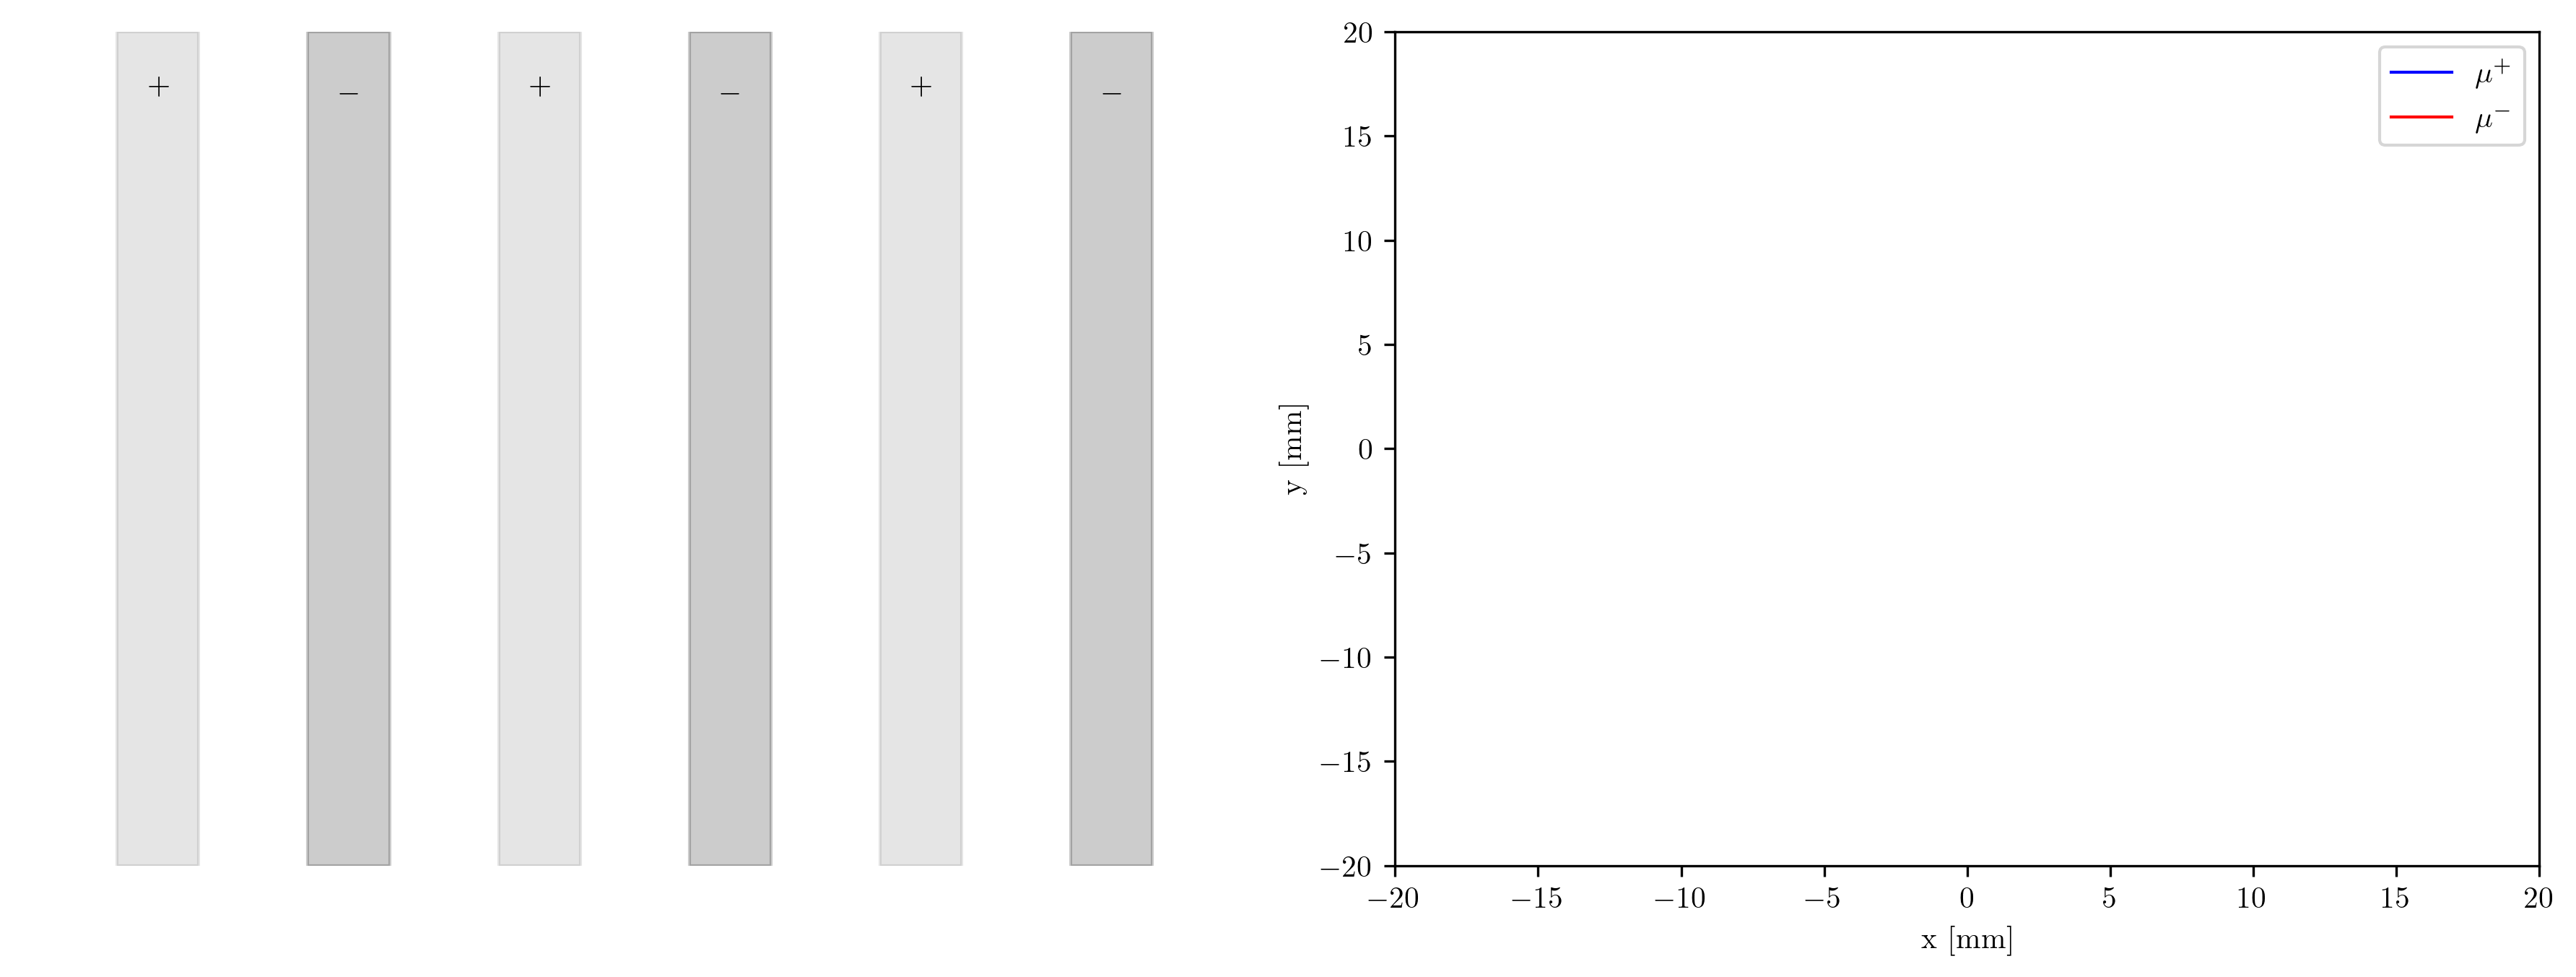

In [28]:
# Generate mu- orbit:
start = int( (period_start_indices[1] - period_start_indices[0]) /2 )
end = period_start_indices[1] + start
minus_x = x_vals[start:end]
minus_y = y_vals[start:end]

# Animation of trajectory in yz- and xy-planes for both signs:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
sol_placements = np.arange(z_vals[period_start_indices[0]],z_vals[period_start_indices[1]+2],0.7)
def animate(frame):

    ax1.cla()
    ax2.cla()

    plot_solenoids(ax1)

    for i in range(n):
        center = 500 + i*d - 35
        if np.mod(i,2) == 0: # positive polarity
            ax1.text(center, 425, s='$+$')
        else: # negative polarity
            ax1.text(center, 425, s='$-$')

    # y,z plot:
    ax1.plot(z_vals[:frame],y_vals[:frame],color='blue',linewidth=1) # mu+
    ax1.plot(z_vals[:frame],minus_y[:frame],color='red',linewidth=1) # mu-
    ax1.set_xlim((0,4200))
    ax1.set_ylim((-500,500))
    ax1.set_ylabel('y [mm]')
    ax1.set_xlabel('z [mm]')
    ax1.axis('off')
    # ax1.legend(loc='upper left')

    # x,y plot:
    ax2.plot(x_vals[:frame],y_vals[:frame],color='blue',linewidth=1, label='$\mu^+$') # mu+
    ax2.plot(minus_x[:frame],minus_y[:frame],color='red',linewidth=1, label='$\mu^-$') # mu-
    ax2.set_xlim((-20,20))
    ax2.set_ylim((-20,20))
    ax2.set_xlabel('x [mm]')
    ax2.set_ylabel('y [mm]')
    ax2.legend(loc='upper right')

plot_solenoids(ax1)
animation = FuncAnimation(fig, animate, frames=len(z_vals[period_start_indices[0]:period_start_indices[1]+2]), interval=250, repeat=True)
animation.save(fig_dir+'yz_and_xy_both_signs.gif', writer='pillow')

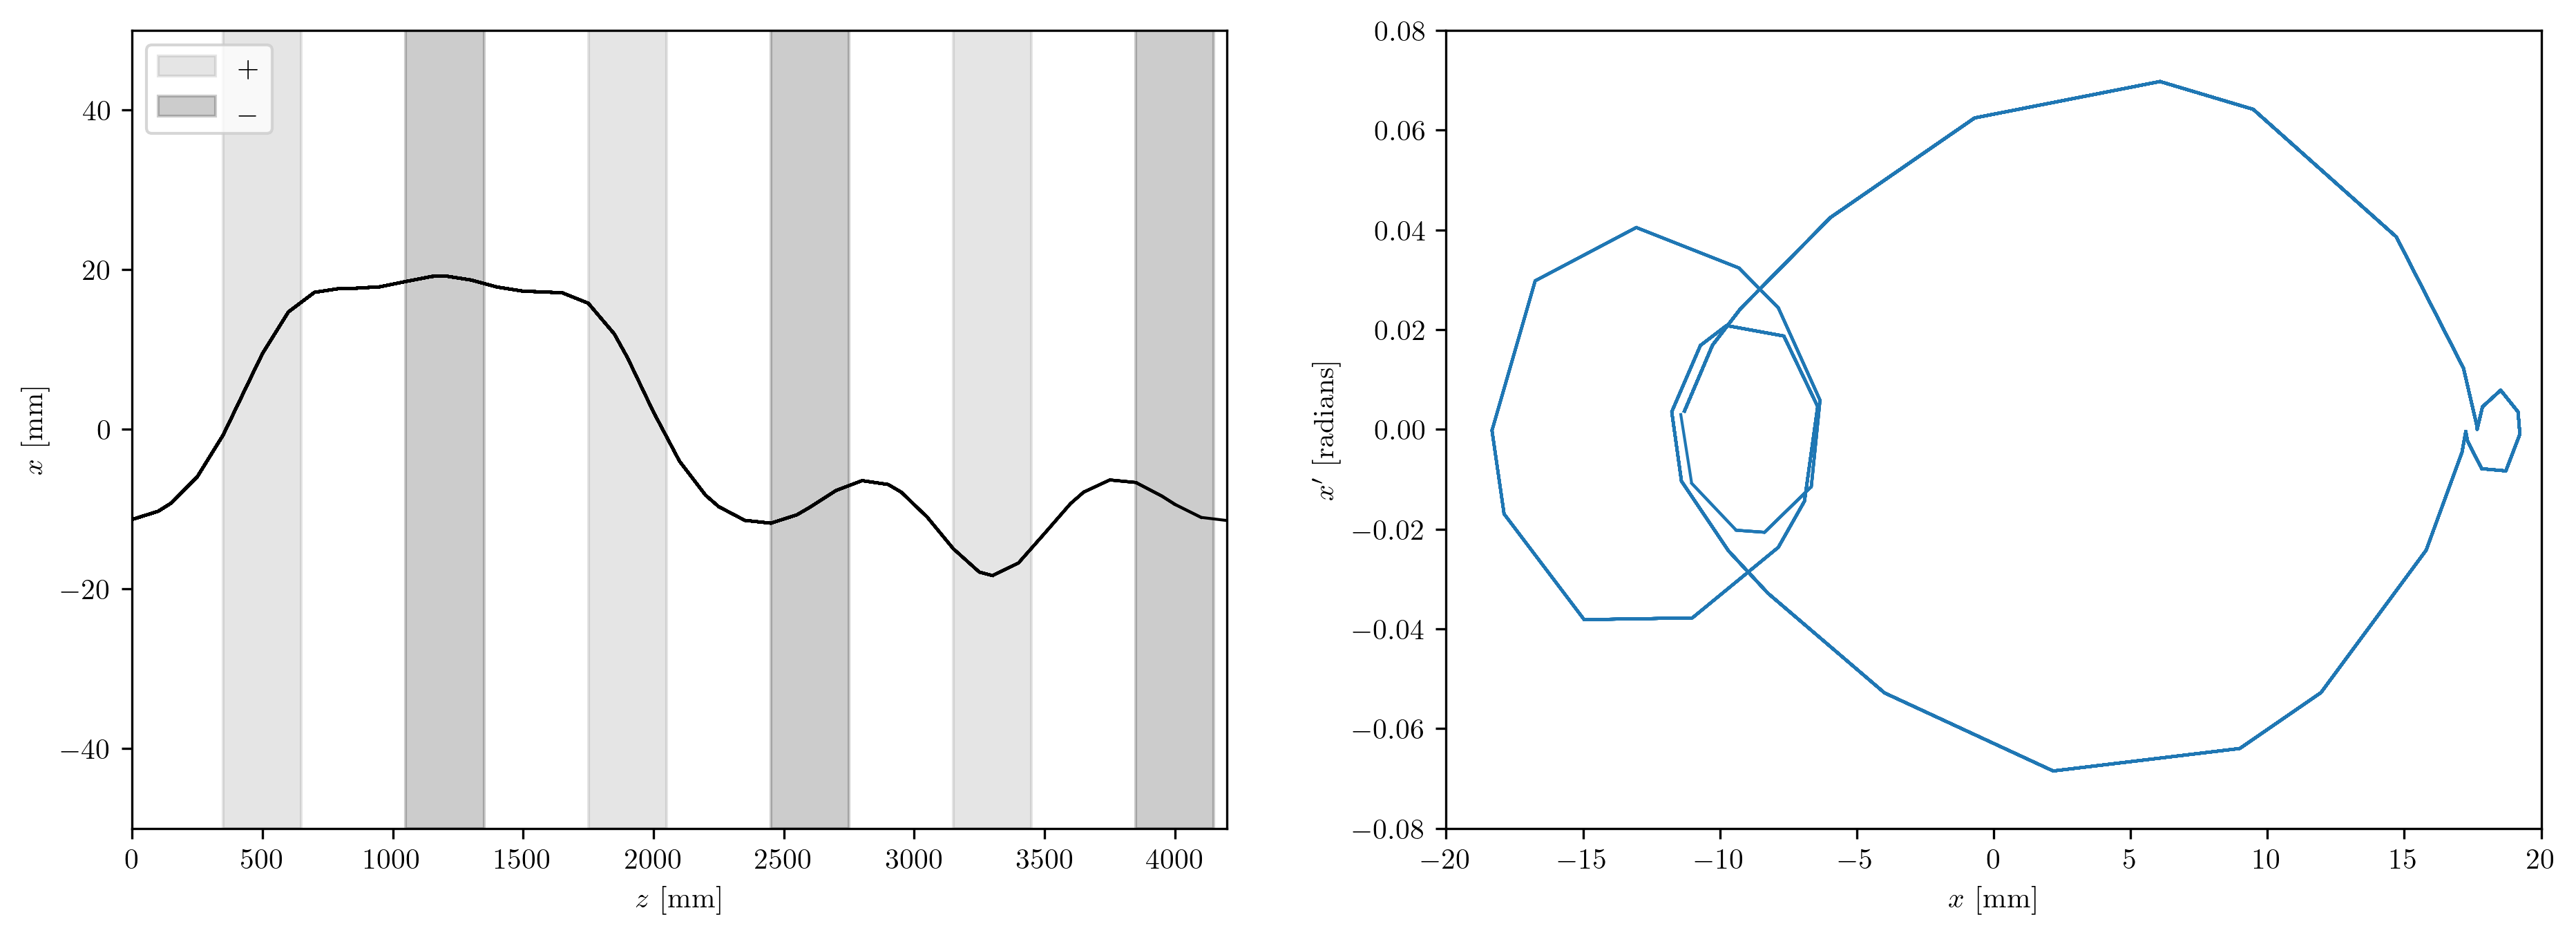

In [29]:
# Animation of trajectory in xz-plane and x-x' phase space:

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
def animate(frame):

    # x,z plot:
    ax1.plot(z_vals[:frame],x_vals[:frame],color='black',zorder=10,linewidth=1)
    ax1.set_xlim((0,4200))
    ax1.set_ylim((-50,50))
    ax1.set_ylabel('$x$ [mm]')
    ax1.set_xlabel('$z$ [mm]')
    ax1.legend(loc='upper left')

    # x,x' plot:
    ax2.plot(x_vals[:frame],xp_vals[:frame],color='tab:blue',linewidth=1)
    ax2.set_xlim((-20,20))
    ax2.set_ylim((-0.08,0.08))
    ax2.set_xlabel('$x$ [mm]')
    ax2.set_ylabel('$x^{\prime}$ [radians]')

plot_solenoids(ax1)
animation = FuncAnimation(fig, animate, frames=len(z_vals[period_start_indices[0]:period_start_indices[1]+2]), interval=250, repeat=True)
animation.save(fig_dir+'phase_space_x.gif', writer='pillow')

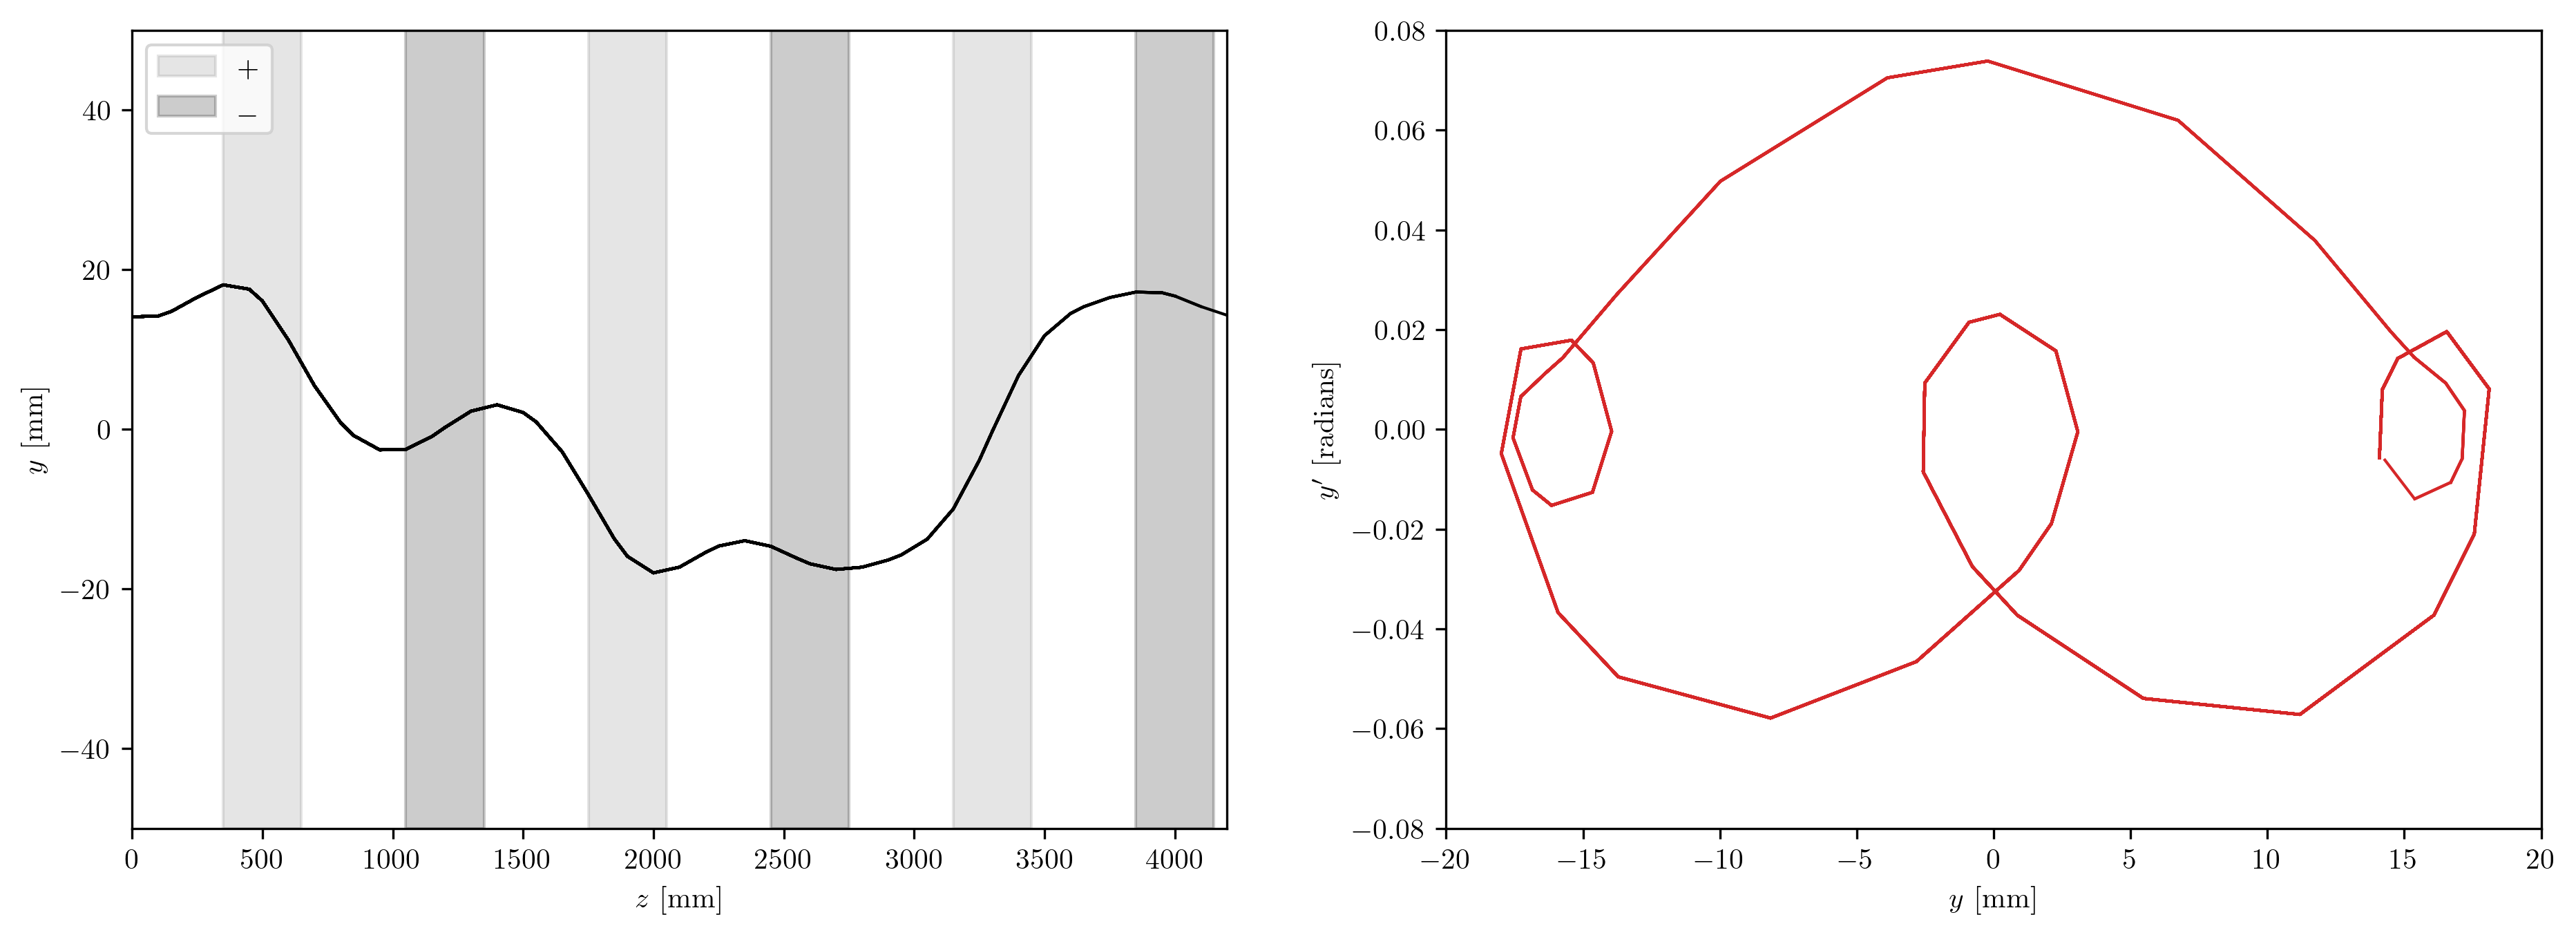

In [30]:
# Animation of trajectory in yz-plane and y-y' phase space:

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
def animate(frame):

    # x,z plot:
    ax1.plot(z_vals[:frame],y_vals[:frame],color='black',zorder=10,linewidth=1)
    ax1.set_xlim((0,4200))
    ax1.set_ylim((-50,50))
    ax1.set_ylabel('$y$ [mm]')
    ax1.set_xlabel('$z$ [mm]')
    ax1.legend(loc='upper left')

    # y,y' plot:
    ax2.plot(y_vals[:frame],yp_vals[:frame],color='tab:red',linewidth=1)
    ax2.set_xlim((-20,20))
    ax2.set_ylim((-0.08,0.08))
    ax2.set_xlabel('$y$ [mm]')
    ax2.set_ylabel('$y^{\prime}$ [radians]')

plot_solenoids(ax1)
animation = FuncAnimation(fig, animate, frames=len(z_vals[period_start_indices[0]:period_start_indices[1]+2]), interval=250, repeat=True)
animation.save(fig_dir+'phase_space_y.gif', writer='pillow')

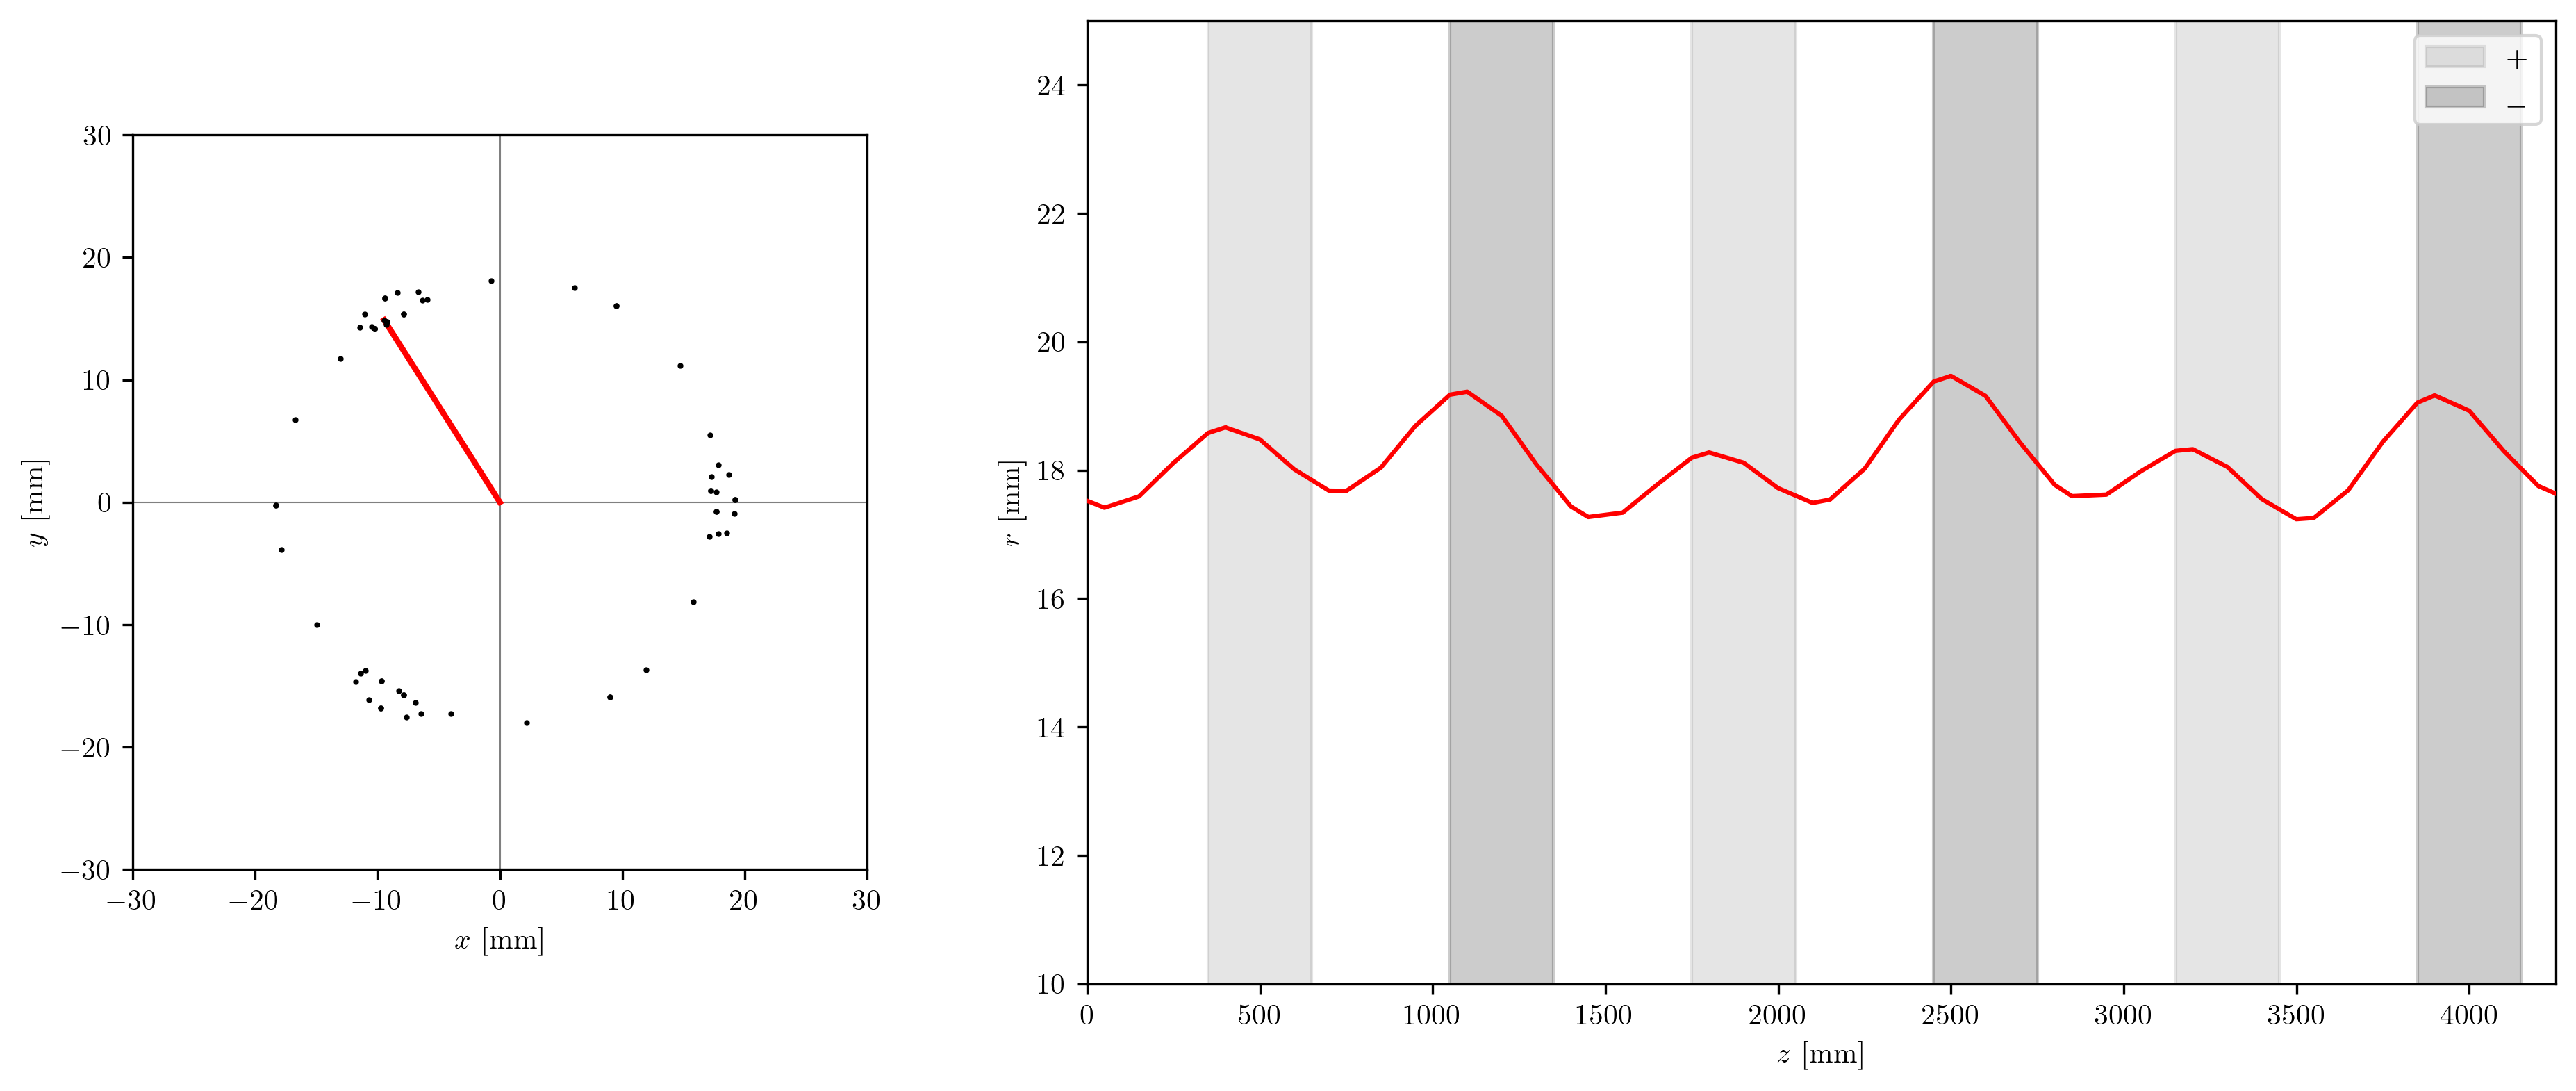

In [31]:
# Animate radial vector and r vs. z:

start_idx = period_start_indices[0]
end_idx = period_start_indices[1] + 2
frame_count = end_idx - start_idx

x_vals_anim = x_vals[start_idx:end_idx]
y_vals_anim = y_vals[start_idx:end_idx]
r_vals_anim = r_vals[start_idx:end_idx]
z_vals_anim = z_vals[start_idx:end_idx]

z_offset = z_vals_anim[0]
z_vals_anim_zeroed = z_vals_anim - z_offset

fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(15, 6),
    gridspec_kw={'width_ratios': [1, 2]}
)

ax1.set_aspect('equal')
ax1.set_xlim(-30, 30)
ax1.set_ylim(-30, 30)
ax1.axhline(0, color='gray', lw=0.5)
ax1.axvline(0, color='gray', lw=0.5)
ax1.set_xlabel('$x$ [mm]')
ax1.set_ylabel('$y$ [mm]')
line1, = ax1.plot([], [], 'r-', lw=2)
points1, = ax1.plot([], [], 'k.', markersize=2)

ax2.set_xlim(0, z_vals_anim_zeroed[-1])
ax2.set_ylim(10, 25)
ax2.set_xlabel('$z$ [mm]')
ax2.set_ylabel('$r$ [mm]')
plot_solenoids(ax2)
ax2.legend(loc='upper right')
line2, = ax2.plot([], [], color='red', zorder=10)

x_history = []
y_history = []
z_history = []
r_history = []

def animate_combined(frame):

    x = x_vals_anim[frame]
    y = y_vals_anim[frame]
    r = r_vals_anim[frame]
    z = z_vals_anim_zeroed[frame]


    line1.set_data([0, x], [0, y])
    x_history.append(x)
    y_history.append(y)
    points1.set_data(x_history, y_history)


    z_history.append(z)
    r_history.append(r)
    line2.set_data(z_history, r_history)

    return line1, points1, line2

ani = FuncAnimation(
    fig, animate_combined,
    frames=frame_count, interval=250, blit=True
)

ani.save(fig_dir + 'r_vs_z.gif', writer='pillow')

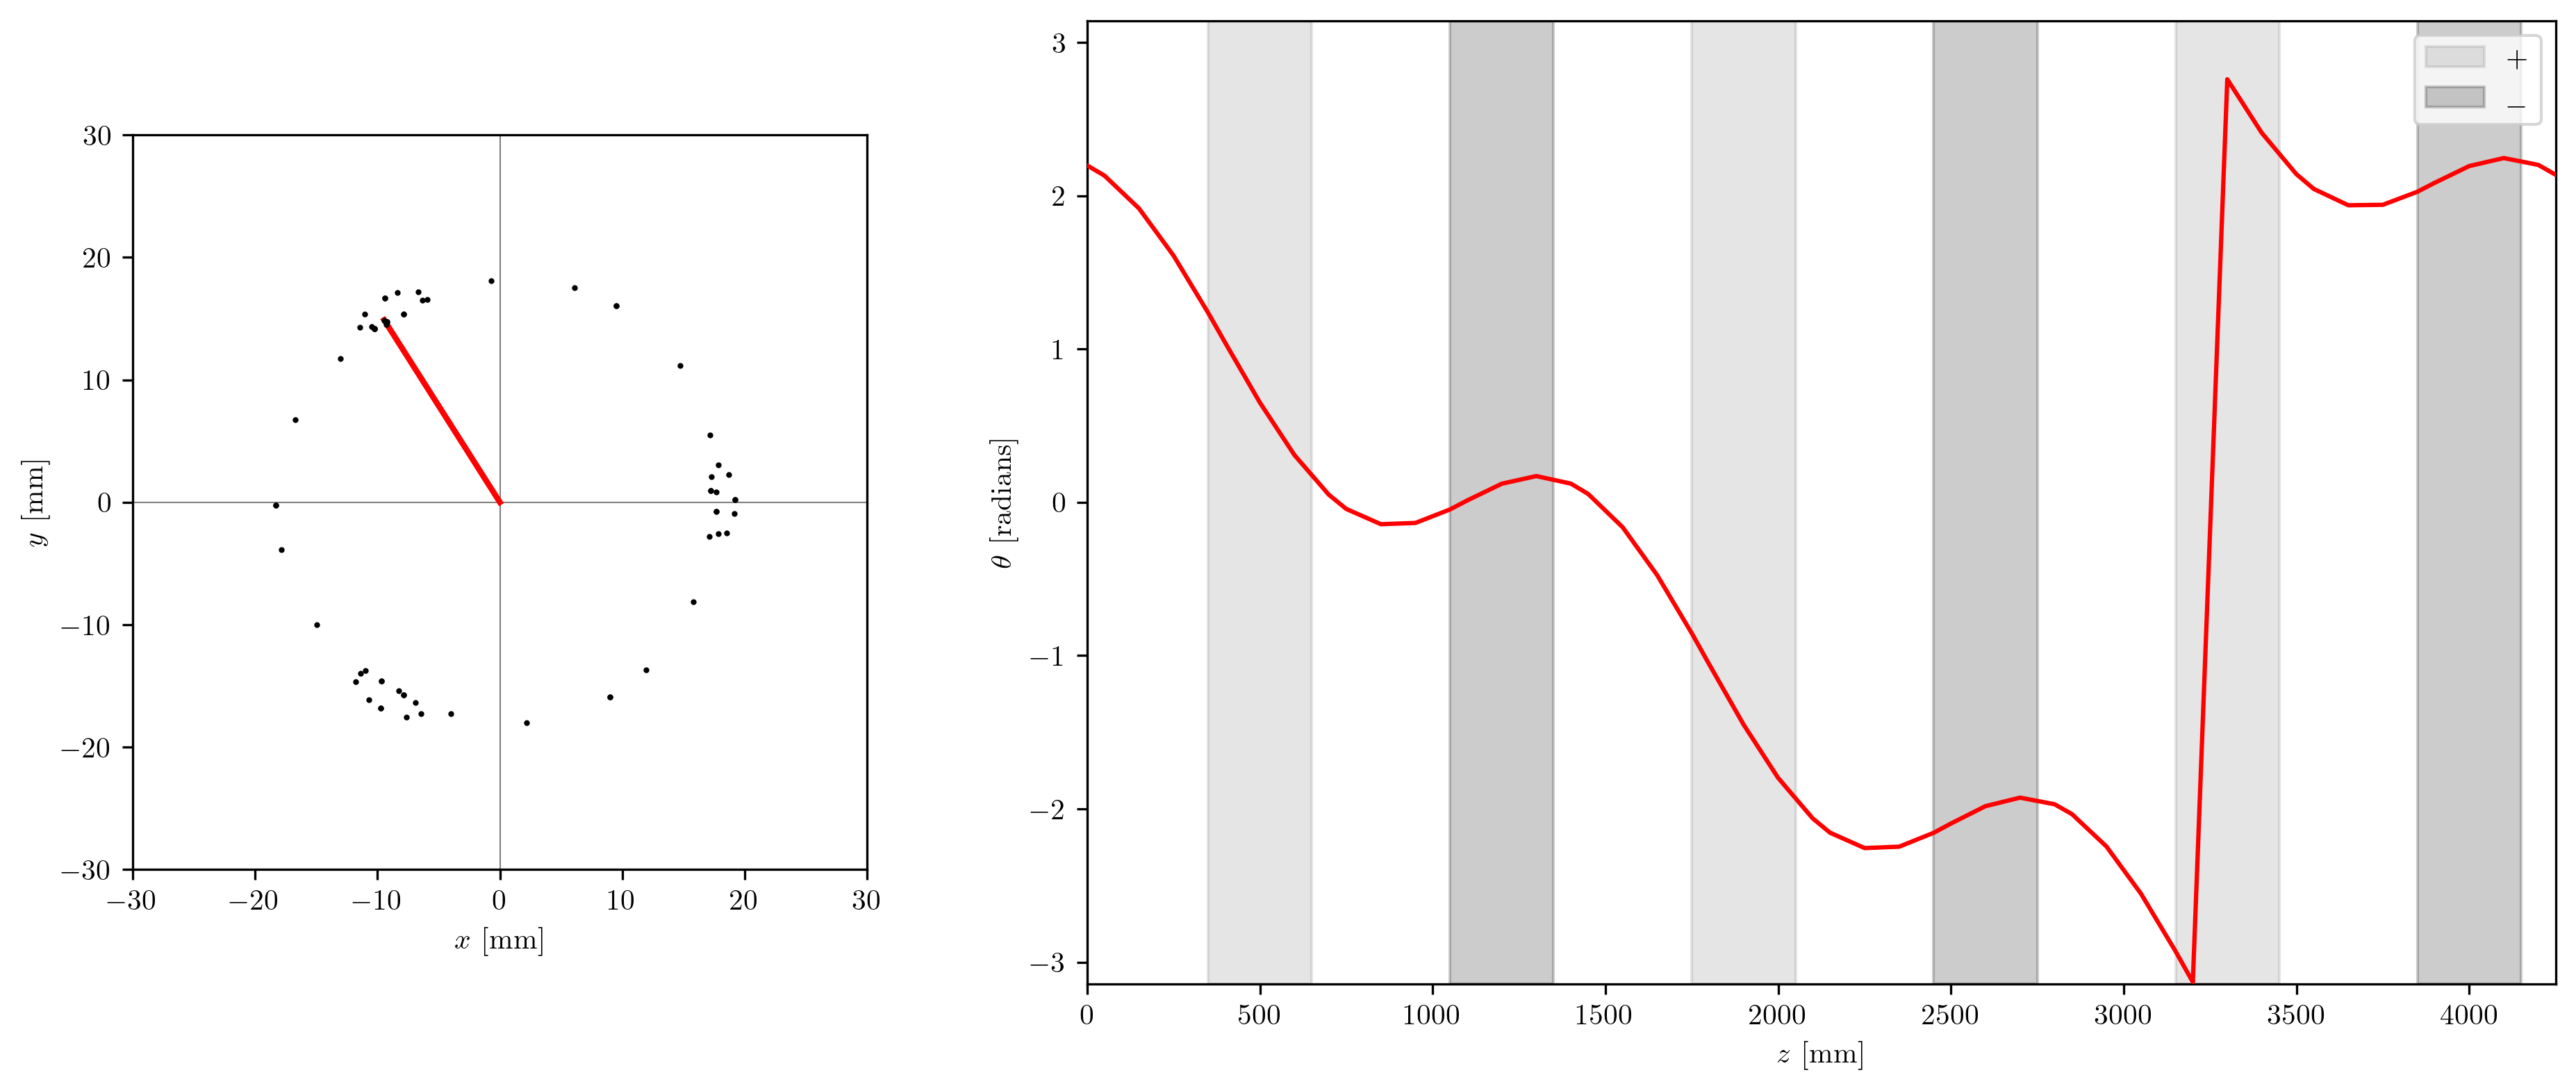

In [32]:
# Animate radial vector and theta vs. z:

start_idx = period_start_indices[0]
end_idx = period_start_indices[1] + 2
frame_count = end_idx - start_idx

x_vals_anim = x_vals[start_idx:end_idx]
y_vals_anim = y_vals[start_idx:end_idx]
r_vals_anim = r_vals[start_idx:end_idx]
z_vals_anim = z_vals[start_idx:end_idx]
theta_vals_anim = theta_vals[start_idx:end_idx]

z_offset = z_vals_anim[0]
z_vals_anim_zeroed = z_vals_anim - z_offset

fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(15, 6),
    gridspec_kw={'width_ratios': [1, 2]}
)

ax1.set_aspect('equal')
ax1.set_xlim(-30, 30)
ax1.set_ylim(-30, 30)
ax1.axhline(0, color='gray', lw=0.5)
ax1.axvline(0, color='gray', lw=0.5)
ax1.set_xlabel('$x$ [mm]')
ax1.set_ylabel('$y$ [mm]')
line1, = ax1.plot([], [], 'r-', lw=2)
points1, = ax1.plot([], [], 'k.', markersize=2)

ax2.set_xlim(0, z_vals_anim_zeroed[-1])
ax2.set_ylim(-np.pi, np.pi)
ax2.set_xlabel('$z$ [mm]')
ax2.set_ylabel(r'$\theta$ [radians]')
plot_solenoids(ax2)
ax2.legend(loc='upper right')
line2, = ax2.plot([], [], color='red', zorder=10)

x_history = []
y_history = []
z_history = []
theta_history = []

def animate_combined(frame):

    x = x_vals_anim[frame]
    y = y_vals_anim[frame]
    z = z_vals_anim_zeroed[frame]
    theta = theta_vals_anim[frame]

    line1.set_data([0, x], [0, y])
    x_history.append(x)
    y_history.append(y)
    points1.set_data(x_history, y_history)

    z_history.append(z)
    theta_history.append(theta)
    line2.set_data(z_history, theta_history)

    return line1, points1, line2

ani = FuncAnimation(
    fig, animate_combined,
    frames=frame_count, interval=250, blit=True
)

ani.save(fig_dir + 'theta_vs_z.gif', writer='pillow')

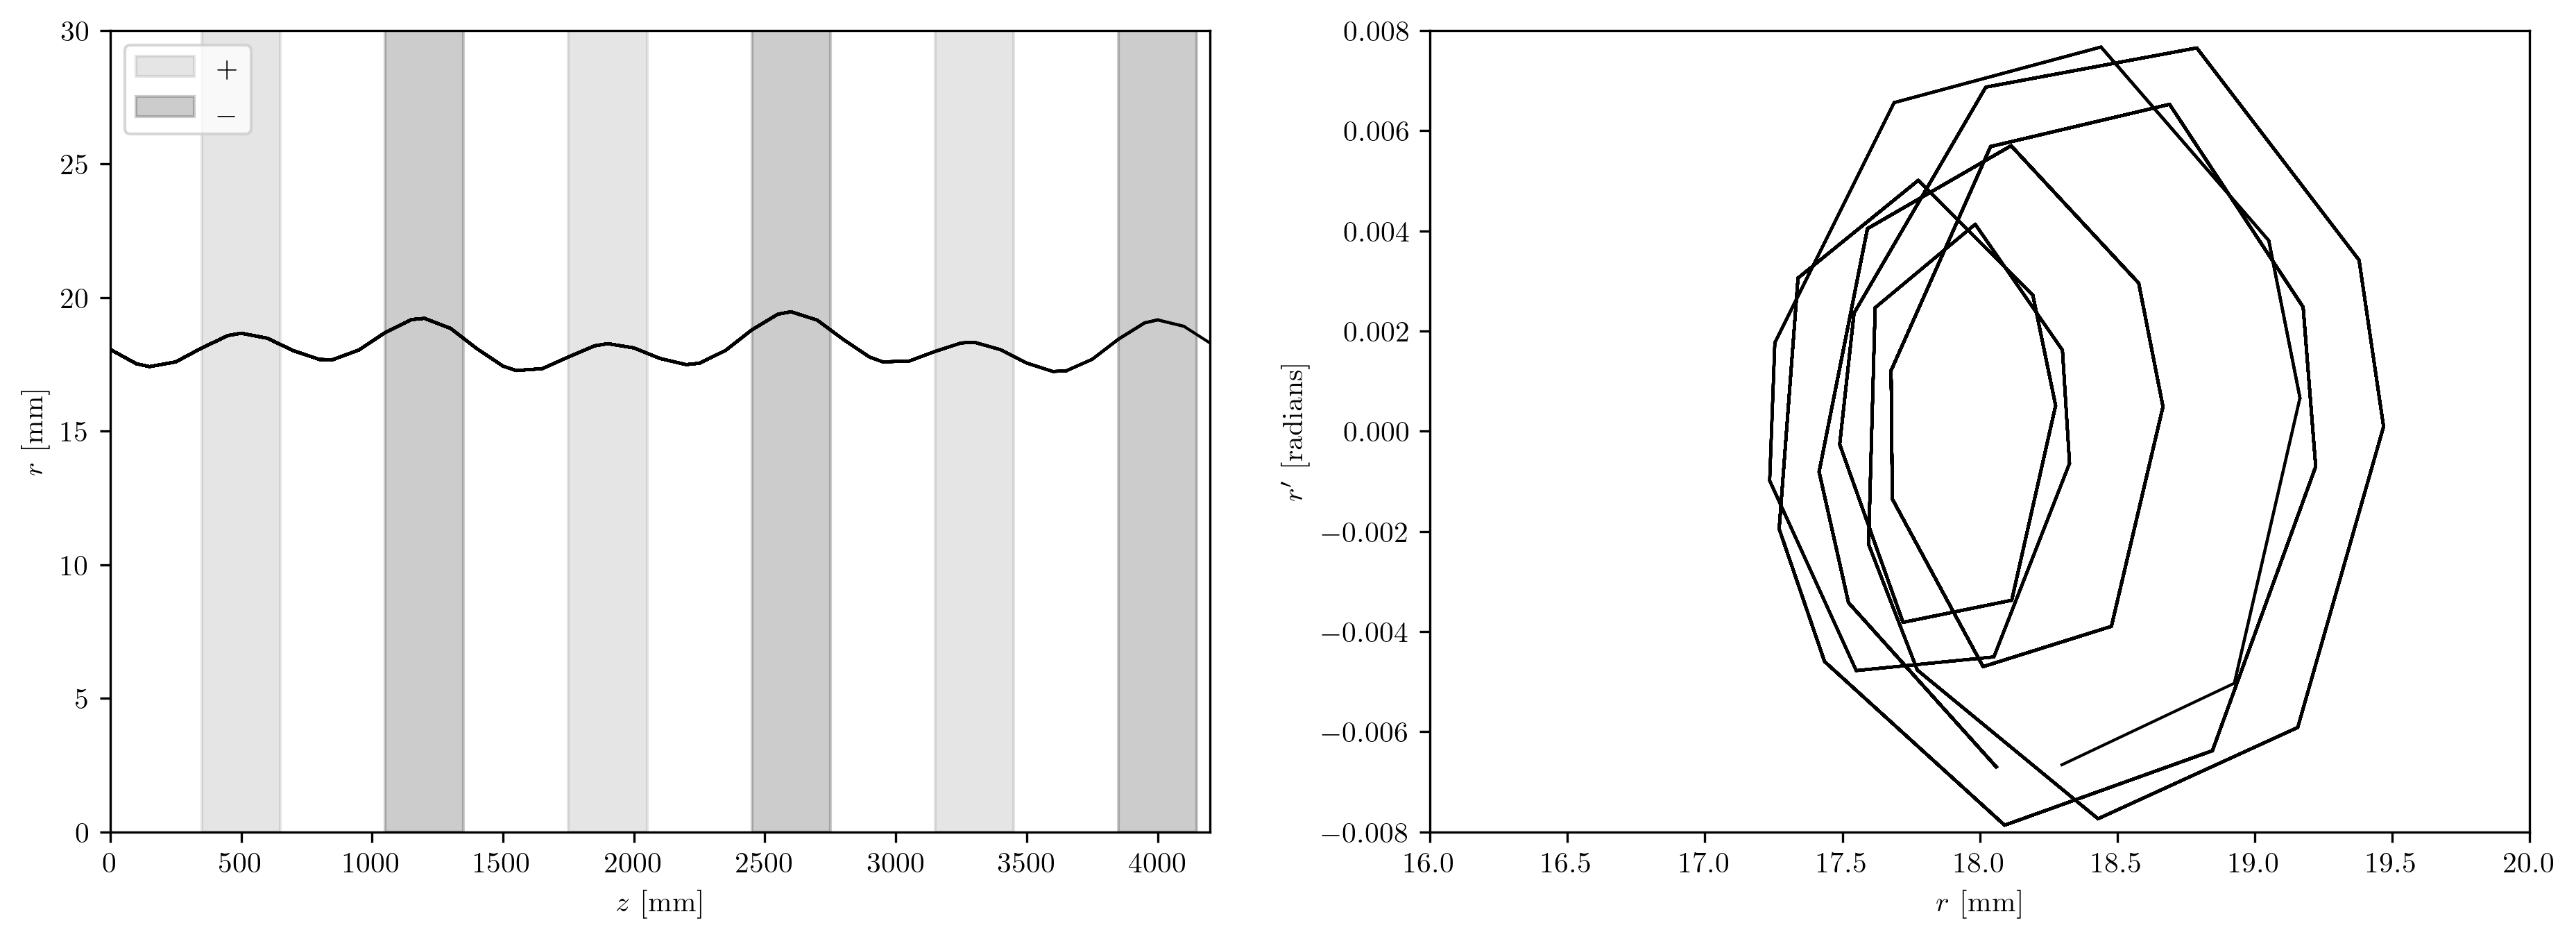

In [33]:
# Animation of r vs. z and r vs. r':

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
def animate(frame):

    # r vs. z plot:
    ax1.plot(z_vals[:frame],r_vals[:frame],color='black',zorder=10,linewidth=1)
    ax1.set_xlim((0,4200))
    ax1.set_ylim((0,30))
    ax1.set_ylabel('$r$ [mm]')
    ax1.set_xlabel('$z$ [mm]')
    ax1.legend(loc='upper left')

    # r' vs. r plot:
    ax2.plot(r_vals[:frame],rp_vals[:frame],color='black',linewidth=1)
    ax2.set_xlim((16,20))
    ax2.set_ylim((-0.008,0.008))
    ax2.set_xlabel('$r$ [mm]')
    ax2.set_ylabel('$r^{\prime}$ [radians]')

plot_solenoids(ax1)
animation = FuncAnimation(fig, animate, frames=len(z_vals[period_start_indices[0]:period_start_indices[1]+2]), interval=250, repeat=True)
animation.save(fig_dir+'phase_space_r.gif', writer='pillow')

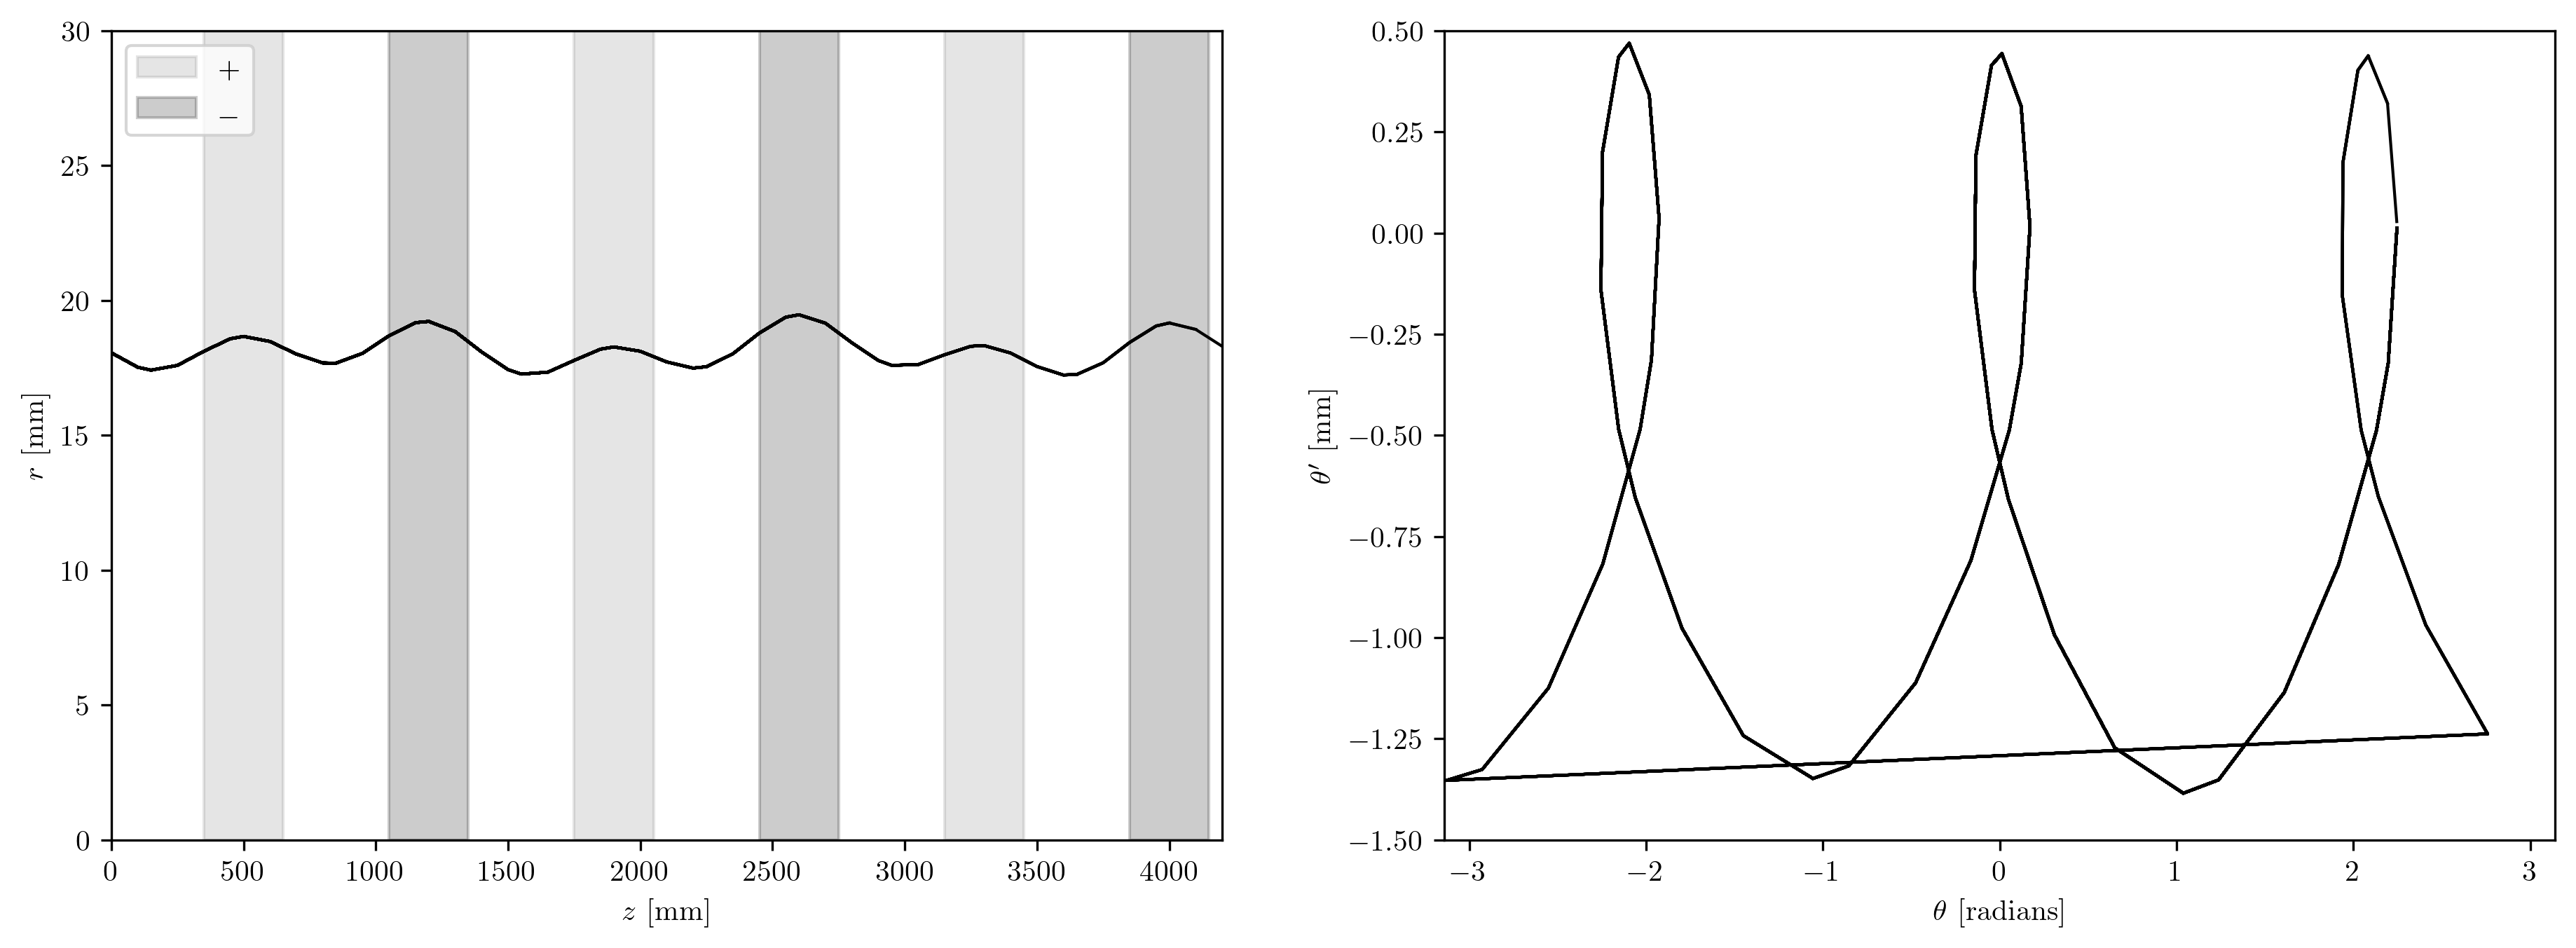

In [34]:
# Animation of r vs. z and theta vs. theta':

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
def animate(frame):

    # r vs. z plot:
    ax1.plot(z_vals[:frame],r_vals[:frame],color='black',zorder=10,linewidth=1)
    ax1.set_xlim((0,4200))
    ax1.set_ylim((0,30))
    ax1.set_ylabel('$r$ [mm]')
    ax1.set_xlabel('$z$ [mm]')
    ax1.legend(loc='upper left')

    # theta' vs. theta plot:
    ax2.plot(theta_vals[:frame],thetap_vals[:frame],color='black',linewidth=1)
    ax2.set_xlim((-np.pi,np.pi))
    ax2.set_ylim((-1.5,0.5))
    ax2.set_xlabel(r'$\theta$ [radians]')
    ax2.set_ylabel(r'$\theta^{\prime}$ [mm]')

plot_solenoids(ax1)
animation = FuncAnimation(fig, animate, frames=len(z_vals[period_start_indices[0]:period_start_indices[1]+2]), interval=250, repeat=True)
animation.save(fig_dir+'phase_space_theta.gif', writer='pillow')